# Filter Methods vs Autoencoder

### Comparison of performance of Logistic Regression with or without PCA/SVD for different sets of features

In [1]:
import math
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import RandomizedSearchCV
import methodsMLinterns

In [2]:
stocks = ['DNB', 'NRG', 'CL', 'ANTM', 'NEE', 'PAYX', 'VAR', 'NI', 'MNST', 'JNJ', 'TGNA', 'NOV', 'FIS', 'BLK', 'HBI', 'NVDA', 'DLTR', 'MRO', 'EMN', 'AMT', 'FLR', 'IBM', 'BK', 'NFX', 'AGN', 'LRCX', 'DIS', 'LH', 'C', 'MNK']

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [4]:
features_1p2_extra = ['acr', 'aeo', 'adl', 'aep', 'acy', 'aez', 'afa', 'aab', 'zkg', 'zmd', 'zla', 'zme', 'zkn', 'zmo', 'zmp', 'zhq', 'zpe']
features_1p4 = ['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho']
features_1p4_extra =['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho', 'zhq', 'zhr', 'zhs', 'zht', 'zhu', 'zhv', 'zhw', 'ziy', 'zjb', 'zjc', 'zjd', 'zje', 'zjf', 'zjg', 'zjh', 'zji', 'zjj', 'zjk', 'zjl', 'zjm', 'zjn', 'zjo', 'zjp', 'zjq', 'zjr', 'zjs', 'zjt', 'zju', 'zkg', 'zkl', 'zkm', 'zkn', 'zkx', 'zky', 'zla', 'zld', 'zle', 'zlf', 'zlg', 'zlh', 'zli', 'zlj', 'zlk', 'zll', 'zlm', 'zln', 'zlo', 'zlp', 'zlq', 'zlr', 'zls', 'zlt', 'zlu', 'zlv', 'zlw', 'zlx', 'zly', 'zlz', 'zma', 'zmb', 'zmc', 'zmd', 'zme', 'zmf', 'zmg', 'zmh', 'zmm', 'zmn', 'zmo', 'zmp', 'zmy', 'zna', 'znd', 'zne', 'znf', 'zng', 'znh', 'zni', 'znj', 'znk', 'znl', 'znm', 'znn', 'zno', 'znp', 'znq', 'znr', 'zns', 'znt', 'znu', 'znv', 'znw', 'znx', 'zny', 'znz', 'zoa', 'zob', 'zoc', 'zod', 'zoe', 'zof', 'zog', 'zoh', 'zoi', 'zoj', 'zok', 'zol', 'zom', 'zon', 'zou', 'zov', 'zow', 'zox', 'zoy', 'zoz', 'zpa', 'zpb', 'zpc', 'zpd', 'zpe']

In [5]:
random_state = 0
Cs = np.logspace(-4, 5)
cv = 5
ratio_threshold = 0.65
date_test_set = datetime.date(2016, 1, 1)

## Prepare the data and clean with all possible features

In [6]:
clf_portfolio_dic = methodsMLinterns.ClassificationPortfolio(stocks=stocks, minutes_forward=30)
clf_portfolio_dic.loadData()
clf_portfolio_dic.cleanUpData(features_1p4_extra)
clf_portfolio_dic.getTrainTestSetDate(date_test_set)

In [7]:
len(features_1p4_extra)

239

Prepare set of features with and without correlated features

(1) First 1.2extra

In [8]:
correlations_1p2_extra = clf_portfolio_dic.pltPearsonCorrelation(features=features_1p2_extra,display=None)

In [9]:
# select pairs where absolute value of correlation is above thresold
indexes = np.where(abs(correlations_1p2_extra)>0.80)
# select the pair only once (under the diagonal)
idx1 =indexes[0][np.where(indexes[0]<indexes[1])]
idx2 =indexes[1][np.where(indexes[0]<indexes[1])]
features1_vec = [features_1p2_extra[i] for i in idx1]
features2_vec = [features_1p2_extra[i] for i in idx2]
features_second_order = clf_portfolio_dic.getSecondOrderFeatures(features1_vec, features2_vec)

In [10]:
features_1p2_extra_second_order = []
for f in features_1p2_extra:
    if (f in features1_vec) or (f in features2_vec):
        continue
    features_1p2_extra_second_order.append(f)
features_1p2_extra_second_order += features_second_order

(2) Then 1.4extra

In [12]:
correlations_1p4_extra = clf_portfolio_dic.pltPearsonCorrelation(features=features_1p4_extra,display=None)

Save to pickle file or Load from it

In [20]:
with open("pickles/correlations_1p4_extra.p",'wb') as f:
    pickle.dump( correlations_1p4_extra, f, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
try: 
    with open("pickles/correlations_1p4_extra.p",'rb') as f:
        correlations_1p4_extra = pickle.load(f)
except EOFError as e:
    print(e)

Add second order features

In [12]:
# select pairs where absolute value of correlation is above thresold
indexes = np.where(abs(correlations_1p4_extra)>0.80)
# select the pair only once (under the diagonal)
idx1 =indexes[0][np.where(indexes[0]<indexes[1])]
idx2 =indexes[1][np.where(indexes[0]<indexes[1])]
features1_vec = [features_1p4_extra[i] for i in idx1]
features2_vec = [features_1p4_extra[i] for i in idx2]
features_second_order = clf_portfolio_dic.getSecondOrderFeatures(features1_vec, features2_vec)

In [13]:
features_1p4_extra_second_order = []
for f in features_1p4_extra:
    if (f in features1_vec) or (f in features2_vec):
        continue
    features_1p4_extra_second_order.append(f)
features_1p4_extra_second_order += features_second_order

## Evaluate sets of features without PCA
#### 1.2extra with correlated features 

DNB accuracy train 54.91 accuracy test 54.0
NRG accuracy train 55.77 accuracy test 53.07
CL accuracy train 54.95 accuracy test 52.98
ANTM accuracy train 53.17 accuracy test 47.2
NEE accuracy train 56.02 accuracy test 50.29
done 20%
PAYX accuracy train 54.9 accuracy test 50.24
VAR accuracy train 55.38 accuracy test 55.37
NI accuracy train 55.92 accuracy test 50.1
MNST accuracy train 55.07 accuracy test 52.85
JNJ accuracy train 54.45 accuracy test 49.92
TGNA accuracy train 54.3 accuracy test 48.12
done 40%
NOV accuracy train 55.12 accuracy test 53.96
FIS accuracy train 55.32 accuracy test 52.08
BLK accuracy train 57.45 accuracy test 54.41
HBI accuracy train 56.57 accuracy test 53.49
NVDA accuracy train 56.5 accuracy test 53.6
DLTR accuracy train 54.64 accuracy test 47.01
done 60%
MRO accuracy train 55.04 accuracy test 53.15
EMN accuracy train 55.72 accuracy test 51.79
AMT accuracy train 56.65 accuracy test 53.29
FLR accuracy train 56.35 accuracy test 52.83
IBM accuracy train 55.49 accura

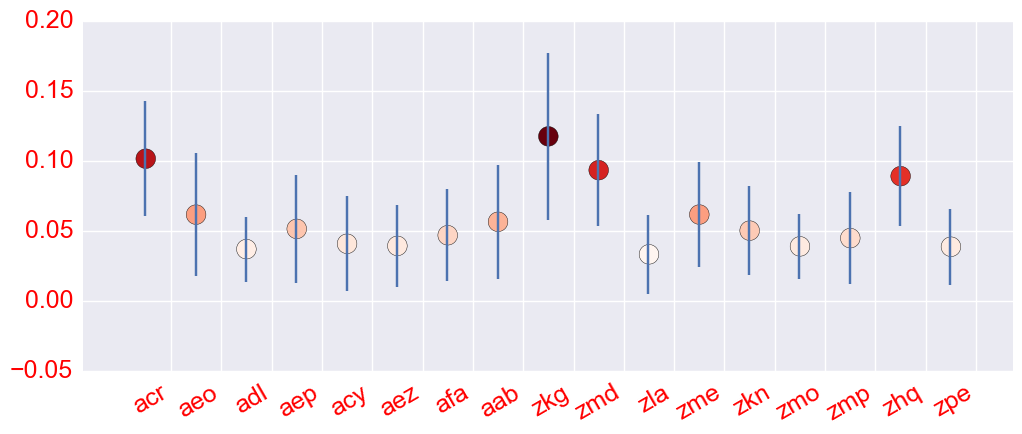

In [14]:
acc_train_vec1, acc_test_vec1, df_feature_importance1 = clf_portfolio_dic.getLogisticRegressionCV(
                                                                    features=features_1p2_extra, 
                                                                    Cs=Cs,
                                                                    cv=cv)

In [15]:
experiment1 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression without Filter - 1.2extra", 
    stocks=stocks, originalFeatures=features_1p2_extra)

In [16]:
experiment1.setTrainResults(acc_train_vec1)
experiment1.setTestResults(acc_test_vec1)
print("The test accuracy (mean - std) is:")
print(experiment1.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
49.7480893744


#### 1.2extra without correlated features (second order)

DNB accuracy train 54.91 accuracy test 54.0
NRG accuracy train 55.77 accuracy test 53.07
CL accuracy train 54.95 accuracy test 52.98
ANTM accuracy train 53.17 accuracy test 47.2
NEE accuracy train 56.02 accuracy test 50.29
done 20%
PAYX accuracy train 54.9 accuracy test 50.24
VAR accuracy train 55.38 accuracy test 55.37
NI accuracy train 55.92 accuracy test 50.1
MNST accuracy train 55.07 accuracy test 52.85
JNJ accuracy train 54.45 accuracy test 49.92
TGNA accuracy train 54.3 accuracy test 48.12
done 40%
NOV accuracy train 55.12 accuracy test 53.96
FIS accuracy train 55.32 accuracy test 52.08
BLK accuracy train 57.45 accuracy test 54.41
HBI accuracy train 56.57 accuracy test 53.49
NVDA accuracy train 56.5 accuracy test 53.6
DLTR accuracy train 54.64 accuracy test 47.01
done 60%
MRO accuracy train 55.04 accuracy test 53.15
EMN accuracy train 55.72 accuracy test 51.79
AMT accuracy train 56.65 accuracy test 53.29
FLR accuracy train 56.35 accuracy test 52.83
IBM accuracy train 55.49 accura

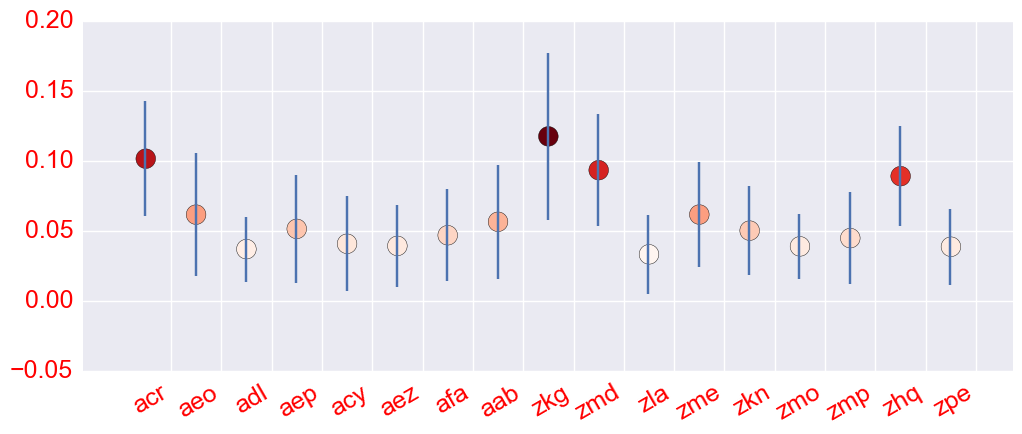

In [17]:
acc_train_vec2, acc_test_vec2, df_feature_importance2 = clf_portfolio_dic.getLogisticRegressionCV(
                                                                    features=features_1p2_extra_second_order, 
                                                                    Cs=Cs,
                                                                    cv=cv)

In [18]:
experiment2 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression without Filter - 1.2extra_second_order",
    stocks=stocks, originalFeatures=features_1p2_extra_second_order)

In [19]:
experiment2.setTrainResults(acc_train_vec2)
experiment2.setTestResults(acc_test_vec2)
print("The test accuracy (mean - std) is:")
print(experiment2.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
49.7480893744


#### 1.4extra with correlated features 

DNB accuracy train 54.98 accuracy test 53.55
NRG accuracy train 56.76 accuracy test 54.63
CL accuracy train 56.27 accuracy test 53.07
ANTM accuracy train 58.28 accuracy test 49.33
NEE accuracy train 57.36 accuracy test 50.67
done 20%
PAYX accuracy train 55.83 accuracy test 49.52
VAR accuracy train 56.95 accuracy test 54.15
NI accuracy train 57.7 accuracy test 50.0
MNST accuracy train 56.17 accuracy test 50.26
JNJ accuracy train 55.07 accuracy test 49.69
TGNA accuracy train 54.3 accuracy test 48.04
done 40%
NOV accuracy train 56.74 accuracy test 50.49
FIS accuracy train 58.89 accuracy test 51.71
BLK accuracy train 58.61 accuracy test 54.5
HBI accuracy train 58.96 accuracy test 51.28
NVDA accuracy train 57.19 accuracy test 52.39
DLTR accuracy train 55.5 accuracy test 48.97
done 60%
MRO accuracy train 56.05 accuracy test 50.91
EMN accuracy train 54.69 accuracy test 51.7
AMT accuracy train 59.92 accuracy test 52.87
FLR accuracy train 55.59 accuracy test 49.69
IBM accuracy train 56.18 accur

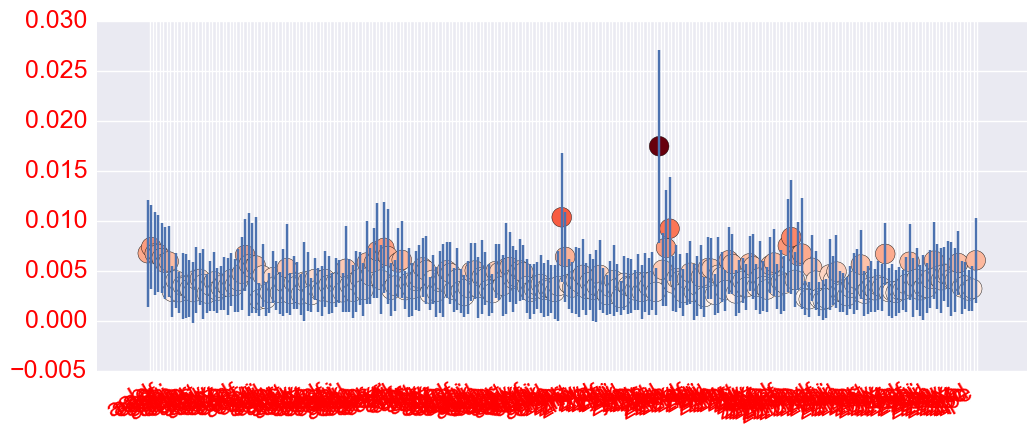

In [20]:
acc_train_vec3, acc_test_vec3, df_feature_importance3 = clf_portfolio_dic.getLogisticRegressionCV(
                                                                    features=features_1p4_extra, 
                                                                    Cs=Cs,
                                                                    cv=cv)

In [21]:
experiment3 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression without Filter - 1.4extra",
    stocks=stocks, originalFeatures=features_1p4_extra)

In [22]:
experiment3.setTrainResults(acc_train_vec3)
experiment3.setTestResults(acc_test_vec3)
print("The test accuracy (mean - std) is:")
print(experiment3.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
49.8987252822


#### 1.4extra without correlated features (second order)

DNB accuracy train 60.87 accuracy test 50.22
NRG accuracy train 56.57 accuracy test 54.04
CL accuracy train 65.83 accuracy test 52.26
ANTM accuracy train 81.87 accuracy test 49.8
NEE accuracy train 58.71 accuracy test 50.0
done 20%
PAYX accuracy train 57.78 accuracy test 48.47
VAR accuracy train 60.76 accuracy test 55.16
NI accuracy train 59.47 accuracy test 50.2
MNST accuracy train 54.71 accuracy test 50.04
JNJ accuracy train 62.1 accuracy test 50.16
TGNA accuracy train 83.4 accuracy test 51.65
done 40%
NOV accuracy train 62.24 accuracy test 52.59
FIS accuracy train 59.23 accuracy test 52.22
BLK accuracy train 60.25 accuracy test 52.01
HBI accuracy train 58.79 accuracy test 49.41
NVDA accuracy train 64.54 accuracy test 48.89
DLTR accuracy train 65.14 accuracy test 49.14
done 60%
MRO accuracy train 66.23 accuracy test 50.51
EMN accuracy train 66.17 accuracy test 48.4
AMT accuracy train 65.65 accuracy test 50.79
FLR accuracy train 59.39 accuracy test 50.77
IBM accuracy train 59.3 accura

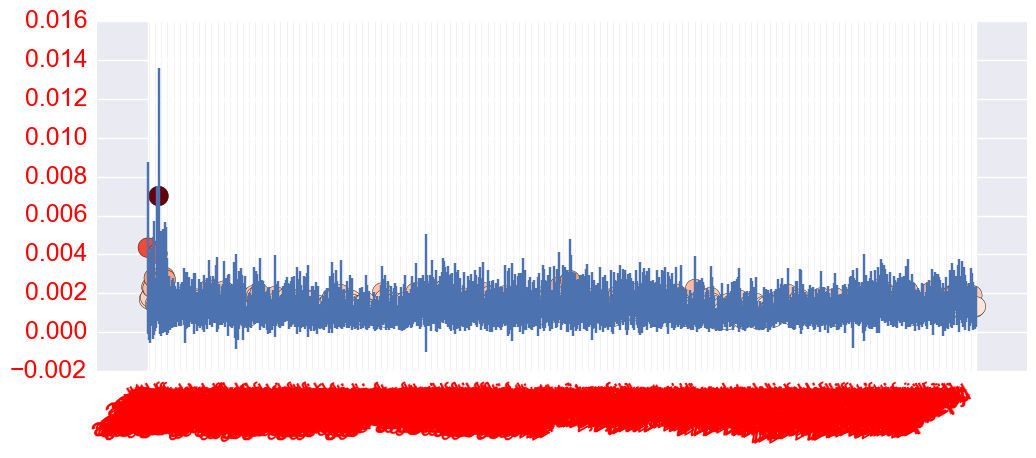

In [23]:
acc_train_vec4, acc_test_vec4, df_feature_importance4 = clf_portfolio_dic.getLogisticRegressionCV(
                                                                    features=features_1p4_extra_second_order, 
                                                                    Cs=Cs,
                                                                    cv=cv)

In [24]:
experiment4 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression without Filter - 1.4extra_second_order",
    stocks=stocks, originalFeatures=features_1p4_extra_second_order)

In [25]:
experiment4.setTrainResults(acc_train_vec4)
experiment4.setTestResults(acc_test_vec4)
print("The test accuracy (mean - std) is:")
print(experiment4.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
49.0866498843


#### Save to Pickle

In [26]:
with open("pickles/acc_without_pca.p",'wb') as f:
    pickle.dump( [experiment1, experiment2, experiment3, experiment4], f, protocol=pickle.HIGHEST_PROTOCOL)

## Use PCA

1.2extra and 1.2extra_second_order (are the same with thresold 0.8)

DNB n_components 3 accuracy train 51.37 accuracy test 53.9
DNB n_components 5 accuracy train 52.71 accuracy test 49.73
DNB n_components 7 accuracy train 53.47 accuracy test 51.71
DNB n_components 9 accuracy train 55.24 accuracy test 53.65
DNB n_components 11 accuracy train 54.67 accuracy test 53.35
DNB n_components 13 accuracy train 54.69 accuracy test 52.36
DNB n_components 15 accuracy train 54.71 accuracy test 54.55
DNB n_components 17 accuracy train 54.91 accuracy test 54.0


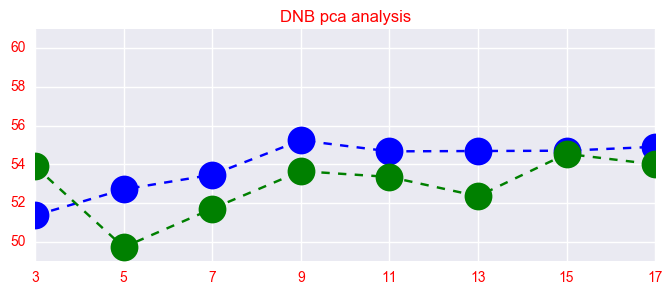

NRG n_components 3 accuracy train 53.34 accuracy test 54.33
NRG n_components 5 accuracy train 53.25 accuracy test 54.33
NRG n_components 7 accuracy train 53.29 accuracy test 54.33
NRG n_components 9 accuracy train 53.36 accuracy test 54.43
NRG n_components 11 accuracy train 54.93 accuracy test 54.43
NRG n_components 13 accuracy train 55.19 accuracy test 53.85
NRG n_components 15 accuracy train 55.63 accuracy test 52.97
NRG n_components 17 accuracy train 55.77 accuracy test 53.07


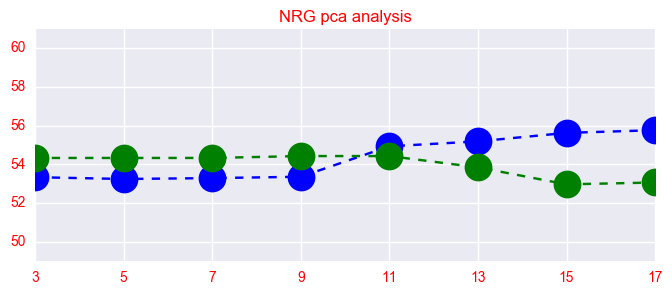

CL n_components 3 accuracy train 53.21 accuracy test 50.45
CL n_components 5 accuracy train 52.7 accuracy test 51.27
CL n_components 7 accuracy train 53.46 accuracy test 51.72
CL n_components 9 accuracy train 55.05 accuracy test 51.72
CL n_components 11 accuracy train 54.95 accuracy test 52.26
CL n_components 13 accuracy train 55.17 accuracy test 54.07
CL n_components 15 accuracy train 54.98 accuracy test 52.98
CL n_components 17 accuracy train 54.95 accuracy test 52.98


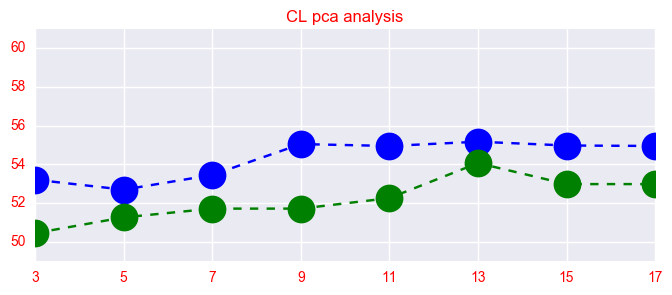

ANTM n_components 3 accuracy train 52.65 accuracy test 46.88
ANTM n_components 5 accuracy train 52.65 accuracy test 46.88
ANTM n_components 7 accuracy train 52.65 accuracy test 46.88
ANTM n_components 9 accuracy train 54.38 accuracy test 50.75
ANTM n_components 11 accuracy train 55.42 accuracy test 49.8
ANTM n_components 13 accuracy train 53.17 accuracy test 47.2
ANTM n_components 15 accuracy train 53.17 accuracy test 47.28
ANTM n_components 17 accuracy train 53.17 accuracy test 47.2


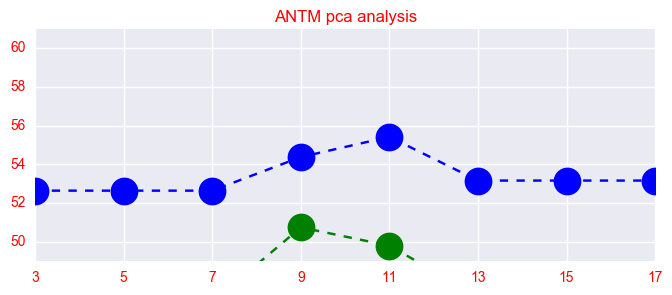

NEE n_components 3 accuracy train 54.67 accuracy test 48.57
NEE n_components 5 accuracy train 54.37 accuracy test 49.43
NEE n_components 7 accuracy train 55.75 accuracy test 50.48
NEE n_components 9 accuracy train 55.69 accuracy test 51.14
NEE n_components 11 accuracy train 55.77 accuracy test 50.86
NEE n_components 13 accuracy train 55.85 accuracy test 51.24
NEE n_components 15 accuracy train 55.99 accuracy test 50.38
NEE n_components 17 accuracy train 55.34 accuracy test 50.48


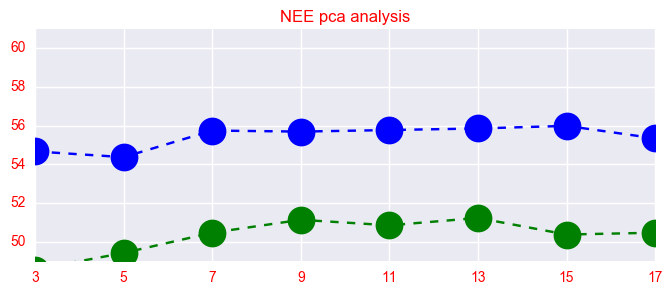

done 20%
PAYX n_components 3 accuracy train 51.06 accuracy test 50.08
PAYX n_components 5 accuracy train 51.59 accuracy test 50.65
PAYX n_components 7 accuracy train 54.13 accuracy test 49.35
PAYX n_components 9 accuracy train 54.04 accuracy test 49.6
PAYX n_components 11 accuracy train 54.64 accuracy test 49.43
PAYX n_components 13 accuracy train 53.69 accuracy test 49.19
PAYX n_components 15 accuracy train 54.29 accuracy test 49.6
PAYX n_components 17 accuracy train 54.9 accuracy test 50.24


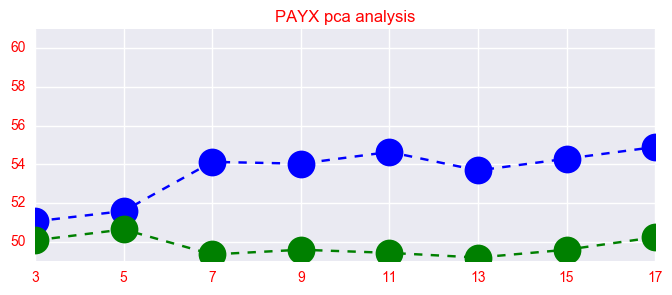

VAR n_components 3 accuracy train 53.14 accuracy test 52.36
VAR n_components 5 accuracy train 52.88 accuracy test 52.15
VAR n_components 7 accuracy train 54.27 accuracy test 53.72
VAR n_components 9 accuracy train 55.47 accuracy test 53.87
VAR n_components 11 accuracy train 55.41 accuracy test 55.87
VAR n_components 13 accuracy train 55.56 accuracy test 56.38
VAR n_components 15 accuracy train 55.28 accuracy test 55.37
VAR n_components 17 accuracy train 55.38 accuracy test 55.37


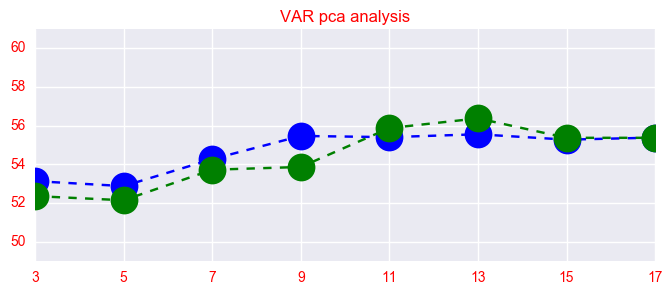

NI n_components 3 accuracy train 52.57 accuracy test 48.16
NI n_components 5 accuracy train 52.57 accuracy test 48.16
NI n_components 7 accuracy train 55.17 accuracy test 51.74
NI n_components 9 accuracy train 54.92 accuracy test 51.02
NI n_components 11 accuracy train 55.87 accuracy test 48.67
NI n_components 13 accuracy train 55.35 accuracy test 49.9
NI n_components 15 accuracy train 55.9 accuracy test 49.28
NI n_components 17 accuracy train 55.95 accuracy test 50.2


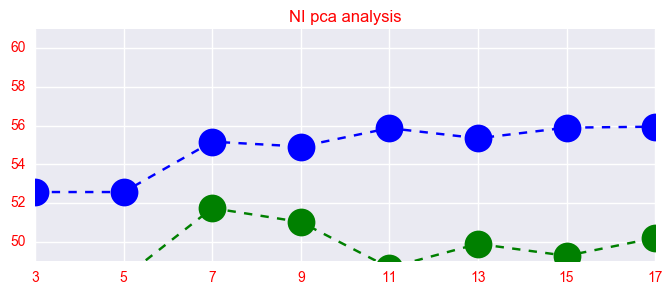

MNST n_components 3 accuracy train 52.35 accuracy test 51.88
MNST n_components 5 accuracy train 53.35 accuracy test 50.18
MNST n_components 7 accuracy train 54.21 accuracy test 52.25
MNST n_components 9 accuracy train 55.05 accuracy test 52.03
MNST n_components 11 accuracy train 54.81 accuracy test 51.81
MNST n_components 13 accuracy train 55.3 accuracy test 52.33
MNST n_components 15 accuracy train 55.38 accuracy test 52.25
MNST n_components 17 accuracy train 55.07 accuracy test 52.85


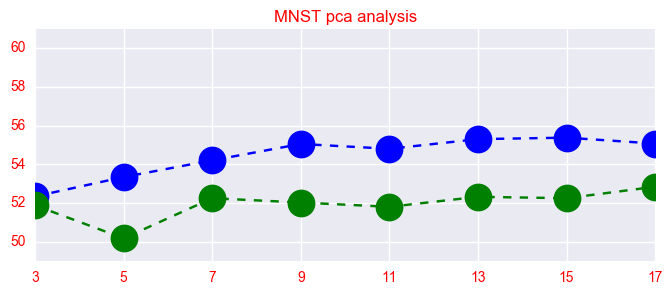

JNJ n_components 3 accuracy train 51.72 accuracy test 49.84
JNJ n_components 5 accuracy train 52.34 accuracy test 49.3
JNJ n_components 7 accuracy train 53.52 accuracy test 50.0
JNJ n_components 9 accuracy train 51.74 accuracy test 49.92
JNJ n_components 11 accuracy train 53.45 accuracy test 49.14
JNJ n_components 13 accuracy train 54.03 accuracy test 49.45
JNJ n_components 15 accuracy train 54.31 accuracy test 50.16
JNJ n_components 17 accuracy train 54.45 accuracy test 49.92


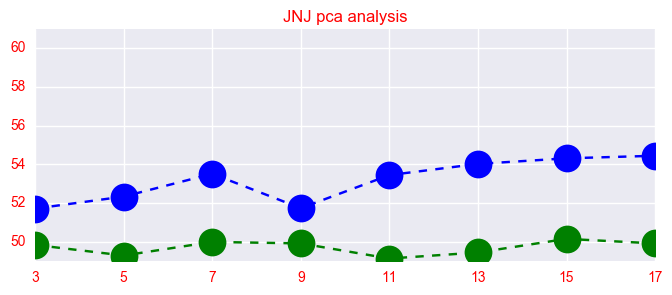

TGNA n_components 3 accuracy train 54.3 accuracy test 48.12
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 54.3 accuracy test 48.12
TGNA n_components 13 accuracy train 54.3 accuracy test 48.12
TGNA n_components 15 accuracy train 54.3 accuracy test 48.12
TGNA n_components 17 accuracy train 54.3 accuracy test 48.12


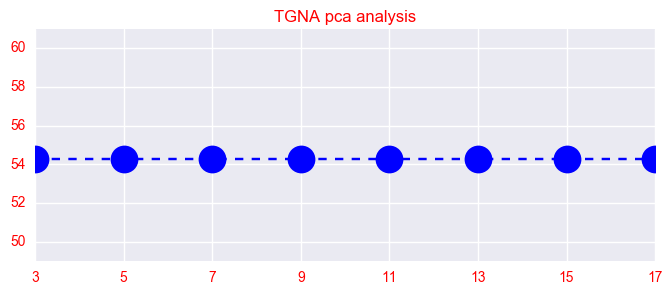

done 40%
NOV n_components 3 accuracy train 51.61 accuracy test 52.51
NOV n_components 5 accuracy train 53.44 accuracy test 52.27
NOV n_components 7 accuracy train 53.99 accuracy test 51.62
NOV n_components 9 accuracy train 53.68 accuracy test 52.59
NOV n_components 11 accuracy train 53.44 accuracy test 52.59
NOV n_components 13 accuracy train 54.73 accuracy test 52.43
NOV n_components 15 accuracy train 54.94 accuracy test 54.29
NOV n_components 17 accuracy train 55.15 accuracy test 53.96


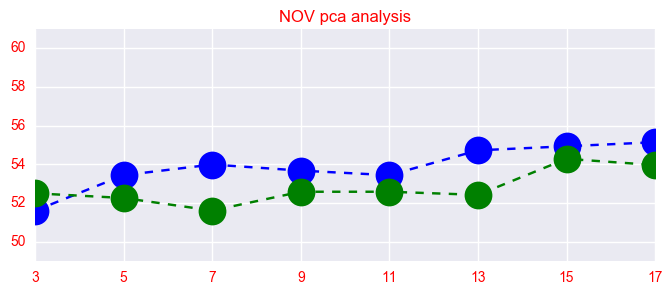

FIS n_components 3 accuracy train 51.5 accuracy test 55.28
FIS n_components 5 accuracy train 52.67 accuracy test 54.84
FIS n_components 7 accuracy train 54.56 accuracy test 51.71
FIS n_components 9 accuracy train 54.26 accuracy test 51.35
FIS n_components 11 accuracy train 54.77 accuracy test 52.66
FIS n_components 13 accuracy train 55.26 accuracy test 51.13
FIS n_components 15 accuracy train 55.15 accuracy test 52.15
FIS n_components 17 accuracy train 55.32 accuracy test 52.08


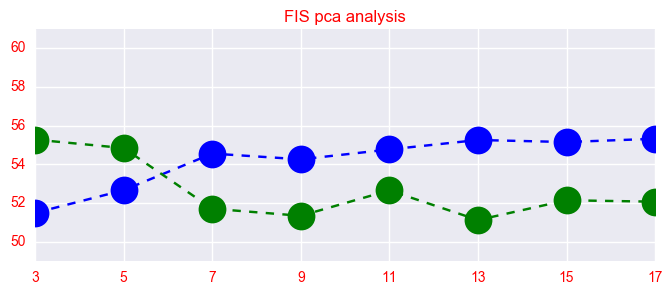

BLK n_components 3 accuracy train 52.08 accuracy test 53.21
BLK n_components 5 accuracy train 55.71 accuracy test 53.47
BLK n_components 7 accuracy train 57.09 accuracy test 52.27
BLK n_components 9 accuracy train 57.3 accuracy test 53.13
BLK n_components 11 accuracy train 57.2 accuracy test 53.38
BLK n_components 13 accuracy train 57.77 accuracy test 53.98
BLK n_components 15 accuracy train 57.45 accuracy test 54.16
BLK n_components 17 accuracy train 57.45 accuracy test 54.41


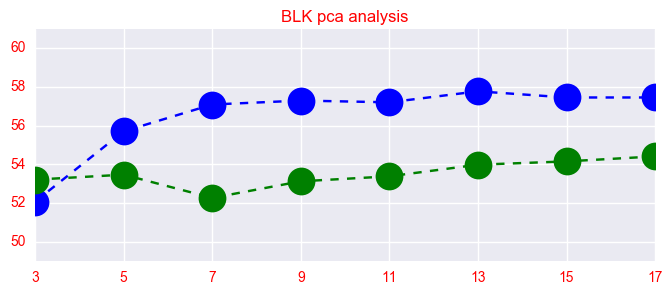

HBI n_components 3 accuracy train 51.83 accuracy test 51.41
HBI n_components 5 accuracy train 54.77 accuracy test 52.38
HBI n_components 7 accuracy train 55.13 accuracy test 52.17
HBI n_components 9 accuracy train 55.17 accuracy test 53.62
HBI n_components 11 accuracy train 56.08 accuracy test 54.11
HBI n_components 13 accuracy train 56.25 accuracy test 54.31
HBI n_components 15 accuracy train 56.51 accuracy test 53.97
HBI n_components 17 accuracy train 56.57 accuracy test 53.49


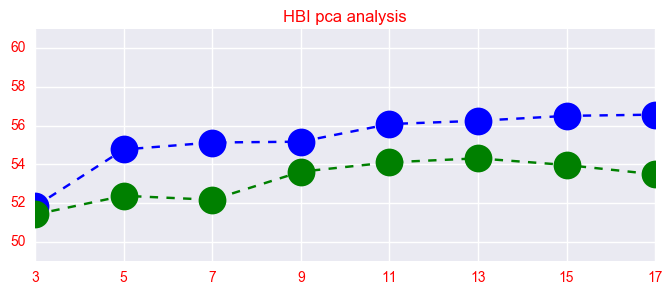

NVDA n_components 3 accuracy train 52.42 accuracy test 50.68
NVDA n_components 5 accuracy train 54.69 accuracy test 53.32
NVDA n_components 7 accuracy train 55.75 accuracy test 52.46
NVDA n_components 9 accuracy train 55.91 accuracy test 53.1
NVDA n_components 11 accuracy train 56.03 accuracy test 51.18
NVDA n_components 13 accuracy train 56.19 accuracy test 52.89
NVDA n_components 15 accuracy train 56.06 accuracy test 54.1
NVDA n_components 17 accuracy train 56.5 accuracy test 53.6


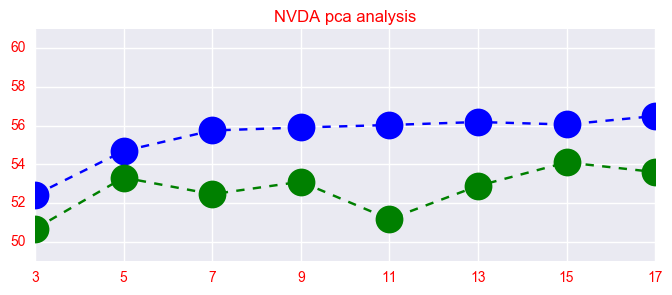

DLTR n_components 3 accuracy train 51.97 accuracy test 47.25
DLTR n_components 5 accuracy train 52.14 accuracy test 47.42
DLTR n_components 7 accuracy train 54.4 accuracy test 50.37
DLTR n_components 9 accuracy train 54.34 accuracy test 48.73
DLTR n_components 11 accuracy train 54.91 accuracy test 48.15
DLTR n_components 13 accuracy train 54.55 accuracy test 47.66
DLTR n_components 15 accuracy train 54.59 accuracy test 47.25
DLTR n_components 17 accuracy train 54.64 accuracy test 47.01


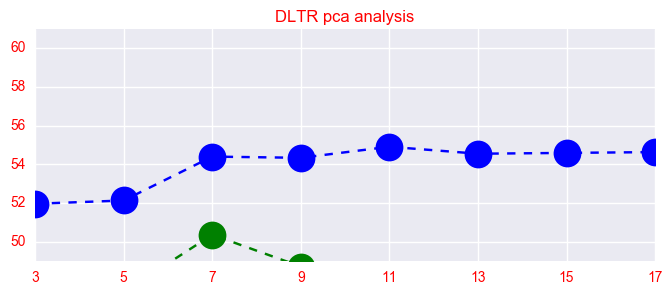

done 60%
MRO n_components 3 accuracy train 51.02 accuracy test 48.48
MRO n_components 5 accuracy train 54.33 accuracy test 51.12
MRO n_components 7 accuracy train 54.59 accuracy test 51.42
MRO n_components 9 accuracy train 54.25 accuracy test 51.73
MRO n_components 11 accuracy train 54.59 accuracy test 51.42
MRO n_components 13 accuracy train 54.94 accuracy test 52.54
MRO n_components 15 accuracy train 54.83 accuracy test 52.85
MRO n_components 17 accuracy train 55.04 accuracy test 53.15


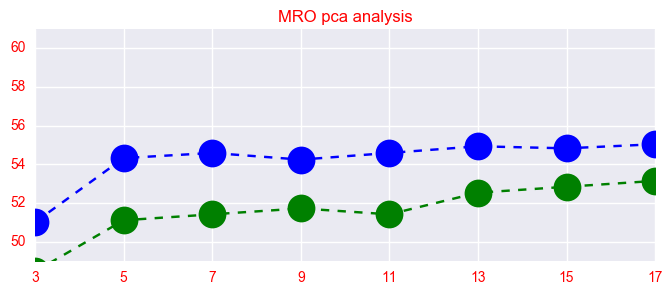

EMN n_components 3 accuracy train 52.49 accuracy test 50.96
EMN n_components 5 accuracy train 52.99 accuracy test 52.8
EMN n_components 7 accuracy train 53.78 accuracy test 54.9
EMN n_components 9 accuracy train 53.88 accuracy test 53.16
EMN n_components 11 accuracy train 54.52 accuracy test 52.61
EMN n_components 13 accuracy train 55.48 accuracy test 52.15
EMN n_components 15 accuracy train 56.03 accuracy test 52.61
EMN n_components 17 accuracy train 55.65 accuracy test 51.79


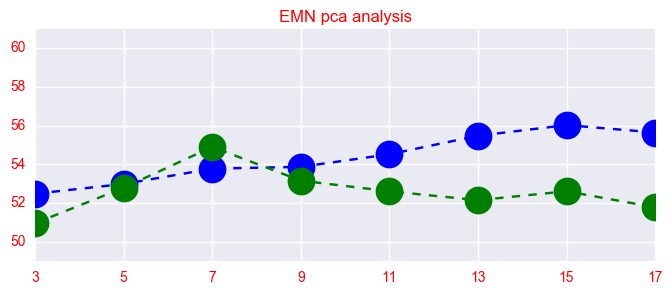

AMT n_components 3 accuracy train 51.66 accuracy test 50.21
AMT n_components 5 accuracy train 53.66 accuracy test 49.71
AMT n_components 7 accuracy train 56.03 accuracy test 52.79
AMT n_components 9 accuracy train 56.08 accuracy test 52.79
AMT n_components 11 accuracy train 56.5 accuracy test 51.79
AMT n_components 13 accuracy train 56.87 accuracy test 53.29
AMT n_components 15 accuracy train 56.55 accuracy test 54.2
AMT n_components 17 accuracy train 56.65 accuracy test 53.29


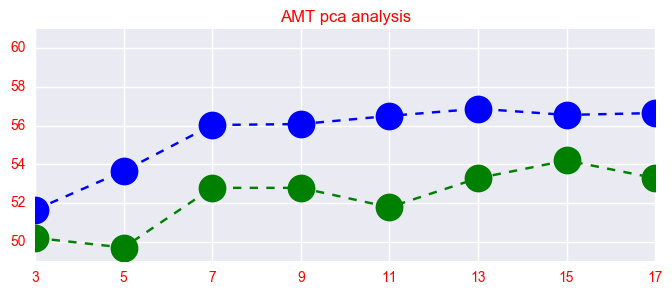

FLR n_components 3 accuracy train 51.19 accuracy test 52.37
FLR n_components 5 accuracy train 51.83 accuracy test 52.22
FLR n_components 7 accuracy train 54.85 accuracy test 50.77
FLR n_components 9 accuracy train 54.47 accuracy test 50.92
FLR n_components 11 accuracy train 55.92 accuracy test 53.06
FLR n_components 13 accuracy train 55.37 accuracy test 52.14
FLR n_components 15 accuracy train 55.78 accuracy test 53.22
FLR n_components 17 accuracy train 56.35 accuracy test 52.83


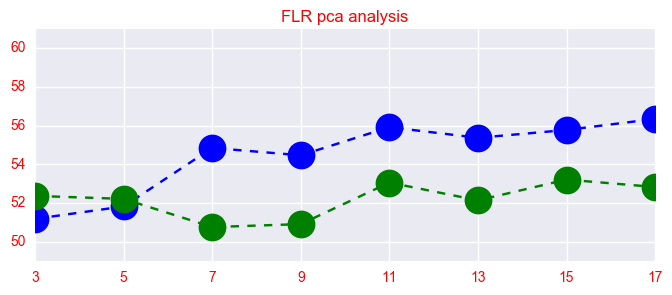

IBM n_components 3 accuracy train 53.14 accuracy test 51.36
IBM n_components 5 accuracy train 52.34 accuracy test 48.31
IBM n_components 7 accuracy train 54.11 accuracy test 50.56
IBM n_components 9 accuracy train 54.25 accuracy test 50.72
IBM n_components 11 accuracy train 54.67 accuracy test 49.68
IBM n_components 13 accuracy train 54.74 accuracy test 49.76
IBM n_components 15 accuracy train 55.72 accuracy test 49.04
IBM n_components 17 accuracy train 55.49 accuracy test 48.8


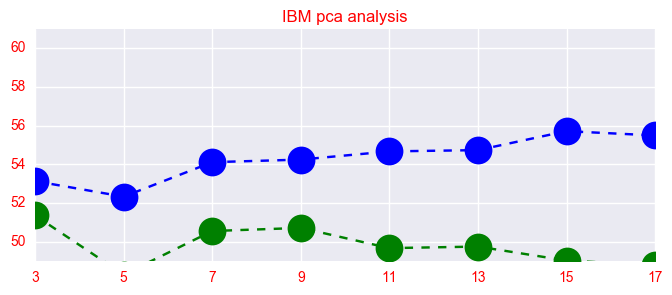

BK n_components 3 accuracy train 53.33 accuracy test 49.95
BK n_components 5 accuracy train 53.66 accuracy test 47.79
BK n_components 7 accuracy train 54.18 accuracy test 50.8
BK n_components 9 accuracy train 54.49 accuracy test 50.23
BK n_components 11 accuracy train 54.81 accuracy test 49.86
BK n_components 13 accuracy train 56.21 accuracy test 52.68
BK n_components 15 accuracy train 55.56 accuracy test 52.02
BK n_components 17 accuracy train 55.69 accuracy test 52.02


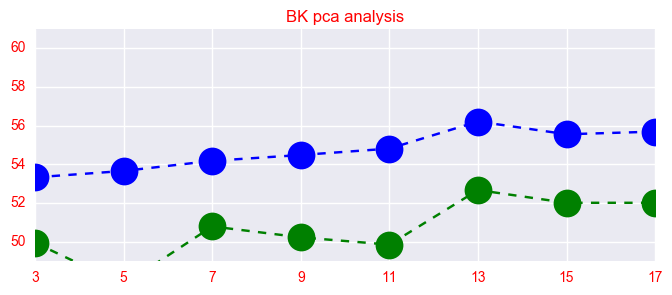

done 80%
NFX n_components 3 accuracy train 51.3 accuracy test 51.87
NFX n_components 5 accuracy train 53.48 accuracy test 53.16
NFX n_components 7 accuracy train 54.04 accuracy test 52.76
NFX n_components 9 accuracy train 54.49 accuracy test 52.86
NFX n_components 11 accuracy train 54.49 accuracy test 52.47
NFX n_components 13 accuracy train 55.35 accuracy test 53.94
NFX n_components 15 accuracy train 54.56 accuracy test 55.03
NFX n_components 17 accuracy train 55.03 accuracy test 54.24


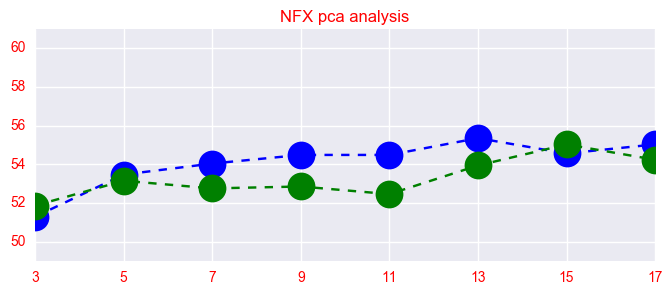

AGN n_components 3 accuracy train 54.26 accuracy test 52.03
AGN n_components 5 accuracy train 54.84 accuracy test 51.39
AGN n_components 7 accuracy train 55.94 accuracy test 51.03
AGN n_components 9 accuracy train 56.37 accuracy test 50.96
AGN n_components 11 accuracy train 55.69 accuracy test 50.39
AGN n_components 13 accuracy train 56.14 accuracy test 50.82
AGN n_components 15 accuracy train 56.62 accuracy test 50.82
AGN n_components 17 accuracy train 55.87 accuracy test 51.03


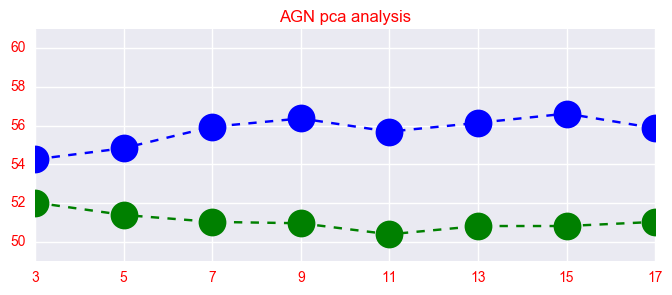

LRCX n_components 3 accuracy train 53.65 accuracy test 49.36
LRCX n_components 5 accuracy train 52.95 accuracy test 51.68
LRCX n_components 7 accuracy train 55.66 accuracy test 49.52
LRCX n_components 9 accuracy train 55.5 accuracy test 50.16
LRCX n_components 11 accuracy train 56.08 accuracy test 50.8
LRCX n_components 13 accuracy train 55.83 accuracy test 50.88
LRCX n_components 15 accuracy train 55.83 accuracy test 50.96
LRCX n_components 17 accuracy train 56.13 accuracy test 51.12


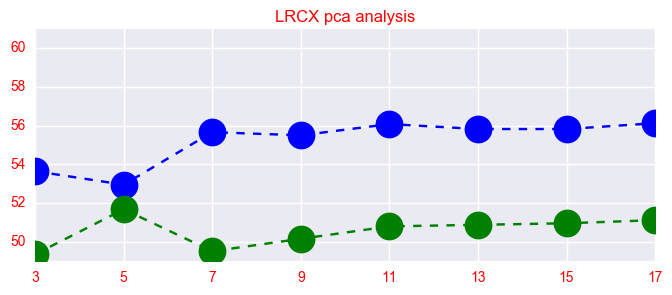

DIS n_components 3 accuracy train 52.42 accuracy test 53.57
DIS n_components 5 accuracy train 52.47 accuracy test 52.6
DIS n_components 7 accuracy train 54.09 accuracy test 52.6
DIS n_components 9 accuracy train 54.8 accuracy test 50.22
DIS n_components 11 accuracy train 55.07 accuracy test 50.66
DIS n_components 13 accuracy train 54.45 accuracy test 51.37
DIS n_components 15 accuracy train 54.61 accuracy test 52.07
DIS n_components 17 accuracy train 54.89 accuracy test 51.37


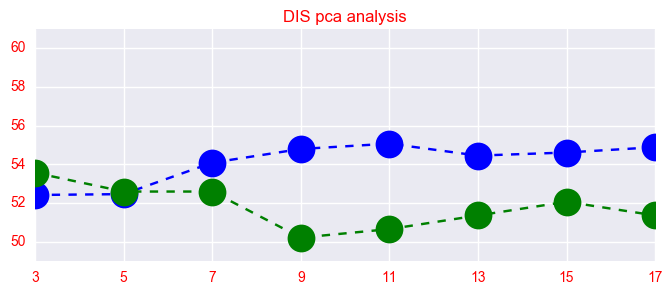

LH n_components 3 accuracy train 52.92 accuracy test 53.64
LH n_components 5 accuracy train 53.51 accuracy test 50.86
LH n_components 7 accuracy train 54.54 accuracy test 52.82
LH n_components 9 accuracy train 55.11 accuracy test 54.05
LH n_components 11 accuracy train 55.75 accuracy test 54.78
LH n_components 13 accuracy train 55.83 accuracy test 54.37
LH n_components 15 accuracy train 56.38 accuracy test 53.39
LH n_components 17 accuracy train 56.82 accuracy test 54.29


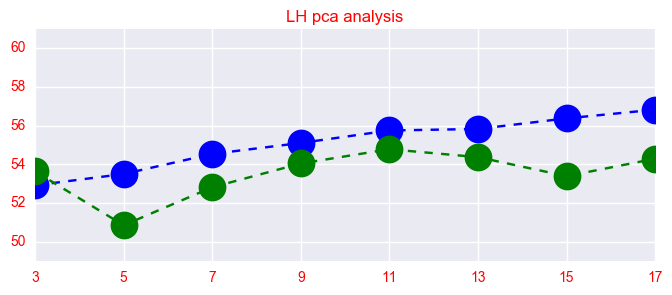

C n_components 3 accuracy train 51.91 accuracy test 52.12
C n_components 5 accuracy train 52.14 accuracy test 52.29
C n_components 7 accuracy train 52.63 accuracy test 50.62
C n_components 9 accuracy train 53.4 accuracy test 50.71
C n_components 11 accuracy train 53.96 accuracy test 51.94
C n_components 13 accuracy train 53.94 accuracy test 52.38
C n_components 15 accuracy train 54.03 accuracy test 51.85
C n_components 17 accuracy train 53.98 accuracy test 51.06


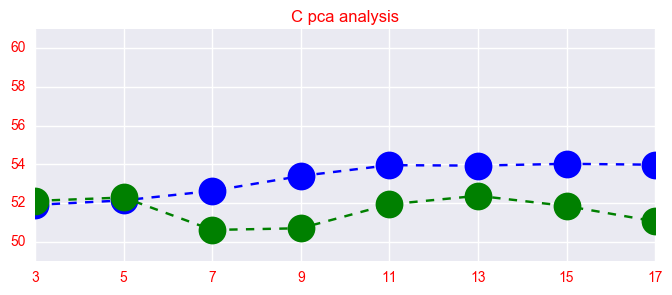

done 100%
MNK n_components 3 accuracy train 51.82 accuracy test 52.62
MNK n_components 5 accuracy train 54.77 accuracy test 52.49
MNK n_components 7 accuracy train 54.42 accuracy test 53.62
MNK n_components 9 accuracy train 54.77 accuracy test 54.28
MNK n_components 11 accuracy train 54.77 accuracy test 54.28
MNK n_components 13 accuracy train 54.97 accuracy test 54.08
MNK n_components 15 accuracy train 55.32 accuracy test 54.81
MNK n_components 17 accuracy train 55.15 accuracy test 54.88


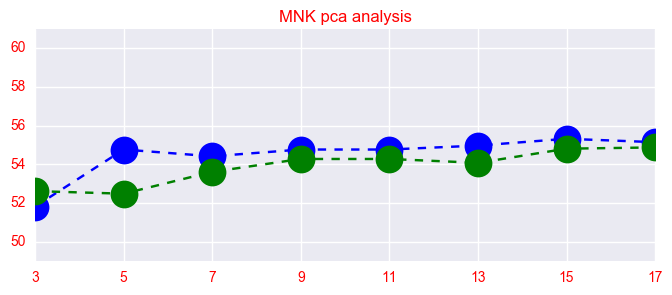

In [27]:
n_components_vec_1p2_extra = np.arange(3, len(features_1p2_extra)+1, 2)
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_pca1, acc_test_pca1 = clf_portfolio_dic.getModelPCA(clf, features_1p2_extra, n_components_vec_1p2_extra)

In [28]:
experiment5 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with PCA - 1.2extra",
    stocks=stocks, originalFeatures=features_1p2_extra)

In [29]:
experiment5.setTrainResults(acc_train_pca1)
experiment5.setTestResults(acc_test_pca1)
print("The test accuracy (mean - std) is:")
print(experiment5.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 48.99171589  48.91353867  49.80334505  50.06272698  49.65449867
  49.74751046  49.78596872  49.76896987]


DNB n_components 3 accuracy train 51.37 accuracy test 53.9
DNB n_components 5 accuracy train 52.71 accuracy test 49.73
DNB n_components 7 accuracy train 53.47 accuracy test 51.71
DNB n_components 9 accuracy train 55.24 accuracy test 53.65
DNB n_components 11 accuracy train 54.67 accuracy test 53.35
DNB n_components 13 accuracy train 54.69 accuracy test 52.36
DNB n_components 15 accuracy train 54.71 accuracy test 54.55
DNB n_components 17 accuracy train 54.91 accuracy test 54.0


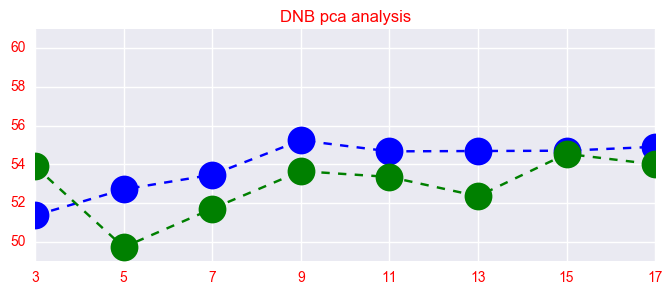

NRG n_components 3 accuracy train 53.34 accuracy test 54.33
NRG n_components 5 accuracy train 53.25 accuracy test 54.33
NRG n_components 7 accuracy train 53.29 accuracy test 54.33
NRG n_components 9 accuracy train 53.36 accuracy test 54.43
NRG n_components 11 accuracy train 54.93 accuracy test 54.43
NRG n_components 13 accuracy train 55.19 accuracy test 53.85
NRG n_components 15 accuracy train 55.63 accuracy test 52.97
NRG n_components 17 accuracy train 55.77 accuracy test 53.07


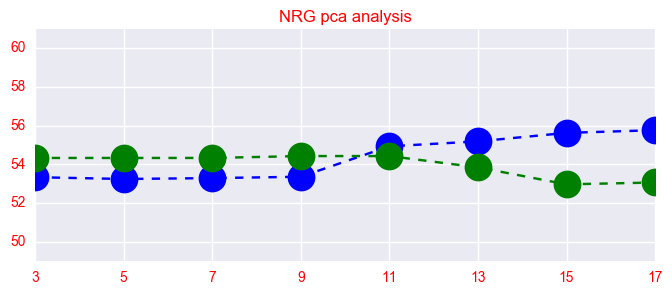

CL n_components 3 accuracy train 53.21 accuracy test 50.45
CL n_components 5 accuracy train 52.7 accuracy test 51.27
CL n_components 7 accuracy train 53.46 accuracy test 51.72
CL n_components 9 accuracy train 55.05 accuracy test 51.72
CL n_components 11 accuracy train 54.95 accuracy test 52.26
CL n_components 13 accuracy train 55.17 accuracy test 54.07
CL n_components 15 accuracy train 54.98 accuracy test 52.98
CL n_components 17 accuracy train 54.95 accuracy test 52.98


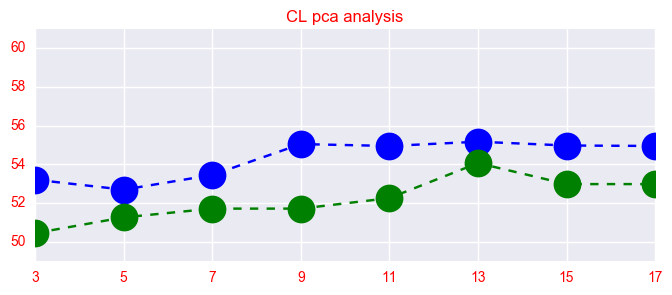

ANTM n_components 3 accuracy train 52.65 accuracy test 46.88
ANTM n_components 5 accuracy train 52.65 accuracy test 46.88
ANTM n_components 7 accuracy train 52.65 accuracy test 46.88
ANTM n_components 9 accuracy train 54.38 accuracy test 50.75
ANTM n_components 11 accuracy train 55.42 accuracy test 49.8
ANTM n_components 13 accuracy train 53.17 accuracy test 47.2
ANTM n_components 15 accuracy train 53.17 accuracy test 47.28
ANTM n_components 17 accuracy train 53.17 accuracy test 47.2


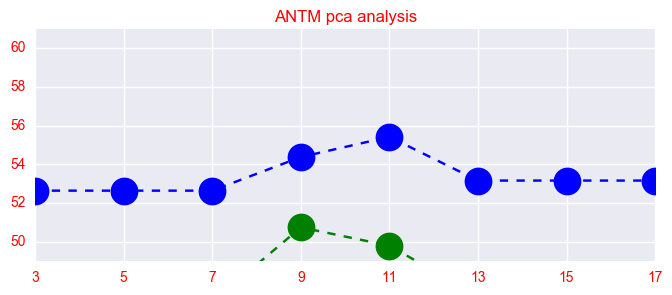

NEE n_components 3 accuracy train 54.67 accuracy test 48.57
NEE n_components 5 accuracy train 54.37 accuracy test 49.43
NEE n_components 7 accuracy train 55.75 accuracy test 50.48
NEE n_components 9 accuracy train 55.69 accuracy test 51.14
NEE n_components 11 accuracy train 55.77 accuracy test 50.86
NEE n_components 13 accuracy train 55.85 accuracy test 51.24
NEE n_components 15 accuracy train 55.99 accuracy test 50.38
NEE n_components 17 accuracy train 55.34 accuracy test 50.48


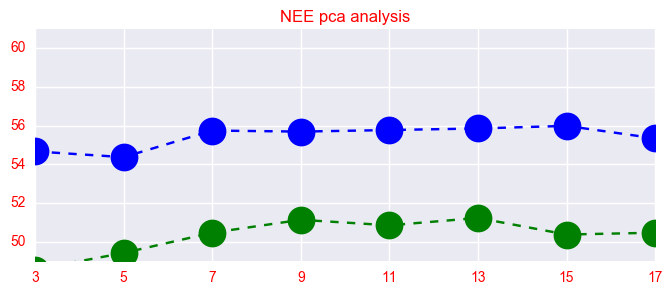

done 20%
PAYX n_components 3 accuracy train 51.06 accuracy test 50.08
PAYX n_components 5 accuracy train 51.59 accuracy test 50.65
PAYX n_components 7 accuracy train 54.13 accuracy test 49.35
PAYX n_components 9 accuracy train 54.04 accuracy test 49.6
PAYX n_components 11 accuracy train 54.64 accuracy test 49.43
PAYX n_components 13 accuracy train 53.69 accuracy test 49.19
PAYX n_components 15 accuracy train 54.29 accuracy test 49.6
PAYX n_components 17 accuracy train 54.9 accuracy test 50.24


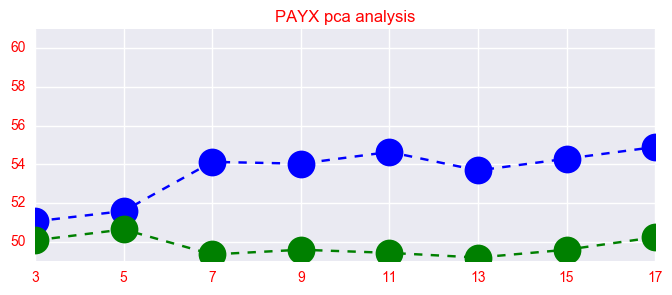

VAR n_components 3 accuracy train 53.14 accuracy test 52.36
VAR n_components 5 accuracy train 52.88 accuracy test 52.15
VAR n_components 7 accuracy train 54.27 accuracy test 53.72
VAR n_components 9 accuracy train 55.47 accuracy test 53.87
VAR n_components 11 accuracy train 55.41 accuracy test 55.87
VAR n_components 13 accuracy train 55.56 accuracy test 56.38
VAR n_components 15 accuracy train 55.28 accuracy test 55.37
VAR n_components 17 accuracy train 55.38 accuracy test 55.37


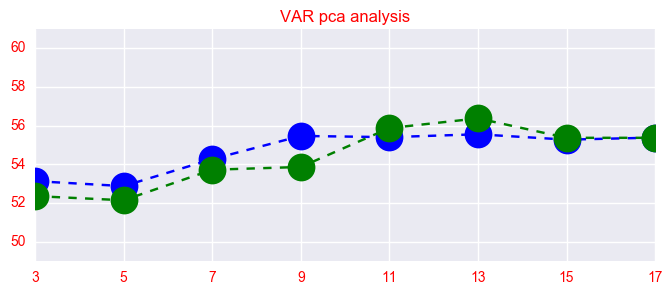

NI n_components 3 accuracy train 52.57 accuracy test 48.16
NI n_components 5 accuracy train 52.57 accuracy test 48.16
NI n_components 7 accuracy train 55.17 accuracy test 51.74
NI n_components 9 accuracy train 54.92 accuracy test 51.02
NI n_components 11 accuracy train 55.87 accuracy test 48.67
NI n_components 13 accuracy train 55.35 accuracy test 49.9
NI n_components 15 accuracy train 55.9 accuracy test 49.28
NI n_components 17 accuracy train 55.95 accuracy test 50.2


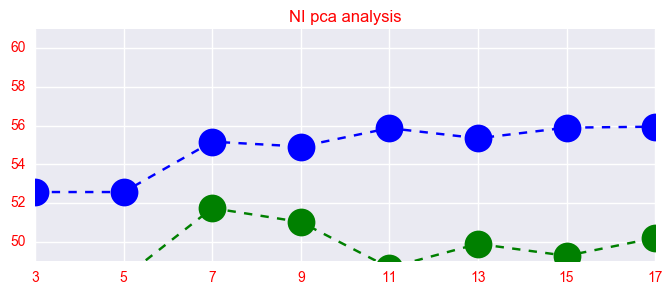

MNST n_components 3 accuracy train 52.35 accuracy test 51.88
MNST n_components 5 accuracy train 53.35 accuracy test 50.18
MNST n_components 7 accuracy train 54.21 accuracy test 52.25
MNST n_components 9 accuracy train 55.05 accuracy test 52.03
MNST n_components 11 accuracy train 54.81 accuracy test 51.81
MNST n_components 13 accuracy train 55.3 accuracy test 52.33
MNST n_components 15 accuracy train 55.38 accuracy test 52.25
MNST n_components 17 accuracy train 55.07 accuracy test 52.85


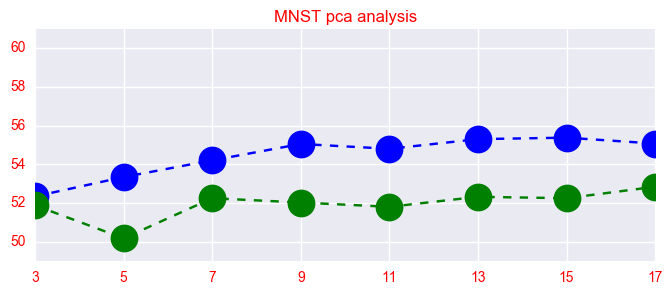

JNJ n_components 3 accuracy train 51.72 accuracy test 49.84
JNJ n_components 5 accuracy train 52.34 accuracy test 49.3
JNJ n_components 7 accuracy train 53.52 accuracy test 50.0
JNJ n_components 9 accuracy train 51.74 accuracy test 49.92
JNJ n_components 11 accuracy train 53.45 accuracy test 49.14
JNJ n_components 13 accuracy train 54.03 accuracy test 49.45
JNJ n_components 15 accuracy train 54.31 accuracy test 50.16
JNJ n_components 17 accuracy train 54.45 accuracy test 49.92


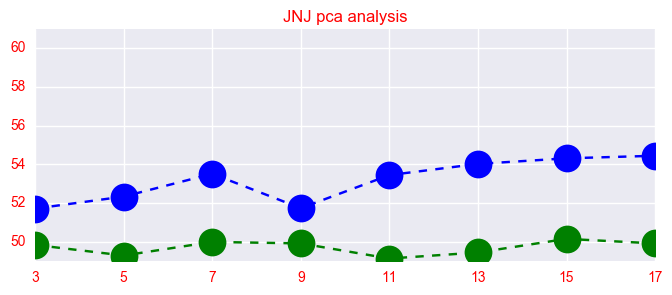

TGNA n_components 3 accuracy train 54.3 accuracy test 48.12
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 54.3 accuracy test 48.12
TGNA n_components 13 accuracy train 54.3 accuracy test 48.12
TGNA n_components 15 accuracy train 54.3 accuracy test 48.12
TGNA n_components 17 accuracy train 54.3 accuracy test 48.12


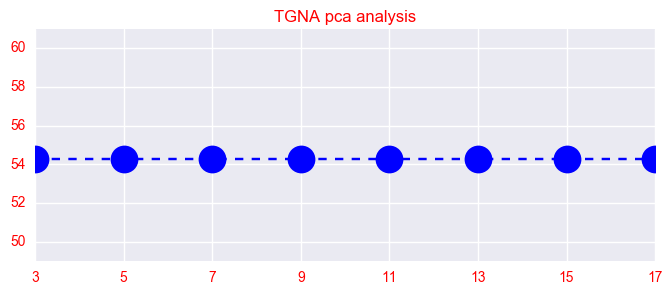

done 40%
NOV n_components 3 accuracy train 51.61 accuracy test 52.51
NOV n_components 5 accuracy train 53.44 accuracy test 52.27
NOV n_components 7 accuracy train 53.99 accuracy test 51.62
NOV n_components 9 accuracy train 53.68 accuracy test 52.59
NOV n_components 11 accuracy train 53.44 accuracy test 52.59
NOV n_components 13 accuracy train 54.73 accuracy test 52.43
NOV n_components 15 accuracy train 54.94 accuracy test 54.29
NOV n_components 17 accuracy train 55.15 accuracy test 53.96


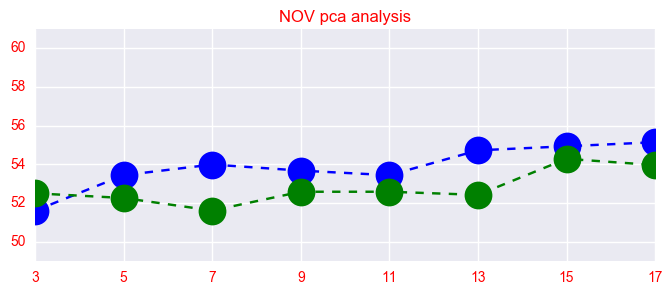

FIS n_components 3 accuracy train 51.5 accuracy test 55.28
FIS n_components 5 accuracy train 52.67 accuracy test 54.84
FIS n_components 7 accuracy train 54.56 accuracy test 51.71
FIS n_components 9 accuracy train 54.26 accuracy test 51.35
FIS n_components 11 accuracy train 54.77 accuracy test 52.66
FIS n_components 13 accuracy train 55.26 accuracy test 51.13
FIS n_components 15 accuracy train 55.15 accuracy test 52.15
FIS n_components 17 accuracy train 55.32 accuracy test 52.08


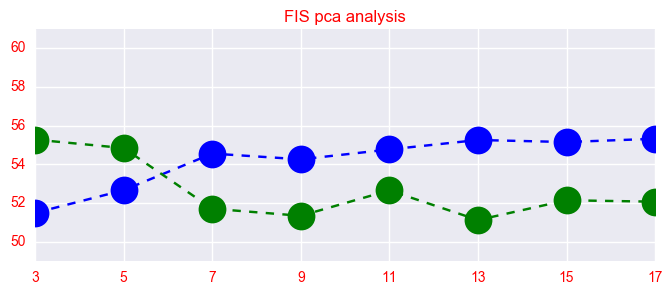

BLK n_components 3 accuracy train 52.08 accuracy test 53.21
BLK n_components 5 accuracy train 55.71 accuracy test 53.47
BLK n_components 7 accuracy train 57.09 accuracy test 52.27
BLK n_components 9 accuracy train 57.3 accuracy test 53.13
BLK n_components 11 accuracy train 57.2 accuracy test 53.38
BLK n_components 13 accuracy train 57.77 accuracy test 53.98
BLK n_components 15 accuracy train 57.45 accuracy test 54.16
BLK n_components 17 accuracy train 57.45 accuracy test 54.41


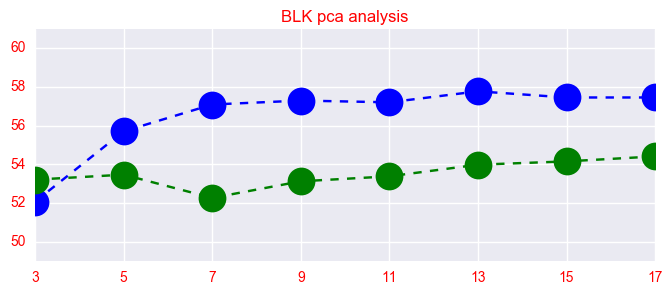

HBI n_components 3 accuracy train 51.83 accuracy test 51.41
HBI n_components 5 accuracy train 54.77 accuracy test 52.38
HBI n_components 7 accuracy train 55.13 accuracy test 52.17
HBI n_components 9 accuracy train 55.17 accuracy test 53.62
HBI n_components 11 accuracy train 56.08 accuracy test 54.11
HBI n_components 13 accuracy train 56.25 accuracy test 54.31
HBI n_components 15 accuracy train 56.51 accuracy test 53.97
HBI n_components 17 accuracy train 56.57 accuracy test 53.49


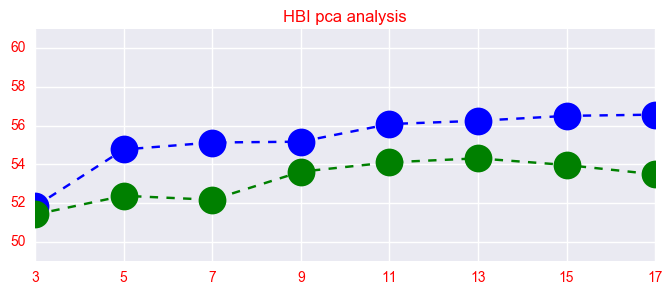

NVDA n_components 3 accuracy train 52.42 accuracy test 50.68
NVDA n_components 5 accuracy train 54.69 accuracy test 53.32
NVDA n_components 7 accuracy train 55.75 accuracy test 52.46
NVDA n_components 9 accuracy train 55.91 accuracy test 53.1
NVDA n_components 11 accuracy train 56.03 accuracy test 51.18
NVDA n_components 13 accuracy train 56.19 accuracy test 52.89
NVDA n_components 15 accuracy train 56.06 accuracy test 54.1
NVDA n_components 17 accuracy train 56.5 accuracy test 53.6


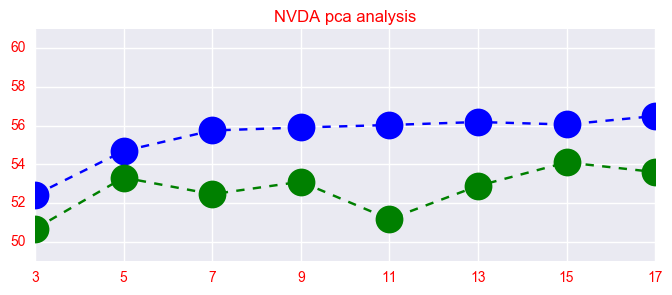

DLTR n_components 3 accuracy train 51.97 accuracy test 47.25
DLTR n_components 5 accuracy train 52.14 accuracy test 47.42
DLTR n_components 7 accuracy train 54.4 accuracy test 50.37
DLTR n_components 9 accuracy train 54.34 accuracy test 48.73
DLTR n_components 11 accuracy train 54.91 accuracy test 48.15
DLTR n_components 13 accuracy train 54.55 accuracy test 47.66
DLTR n_components 15 accuracy train 54.59 accuracy test 47.25
DLTR n_components 17 accuracy train 54.64 accuracy test 47.01


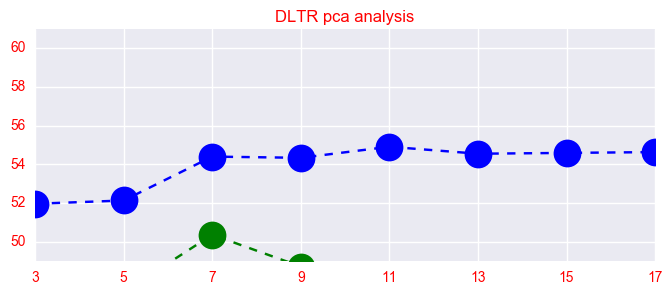

done 60%
MRO n_components 3 accuracy train 51.02 accuracy test 48.48
MRO n_components 5 accuracy train 54.33 accuracy test 51.12
MRO n_components 7 accuracy train 54.59 accuracy test 51.42
MRO n_components 9 accuracy train 54.25 accuracy test 51.73
MRO n_components 11 accuracy train 54.59 accuracy test 51.42
MRO n_components 13 accuracy train 54.94 accuracy test 52.54
MRO n_components 15 accuracy train 54.83 accuracy test 52.85
MRO n_components 17 accuracy train 55.04 accuracy test 53.15


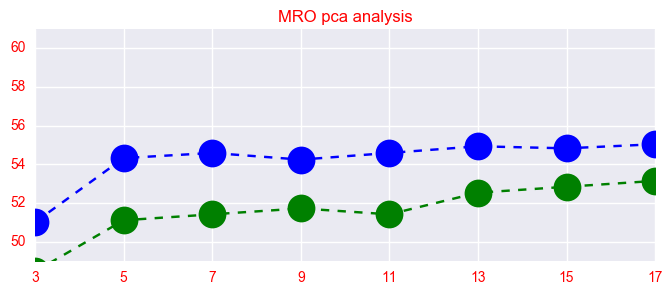

EMN n_components 3 accuracy train 52.49 accuracy test 50.96
EMN n_components 5 accuracy train 52.99 accuracy test 52.8
EMN n_components 7 accuracy train 53.78 accuracy test 54.9
EMN n_components 9 accuracy train 53.88 accuracy test 53.16
EMN n_components 11 accuracy train 54.52 accuracy test 52.61
EMN n_components 13 accuracy train 55.48 accuracy test 52.15
EMN n_components 15 accuracy train 56.03 accuracy test 52.61
EMN n_components 17 accuracy train 55.65 accuracy test 51.79


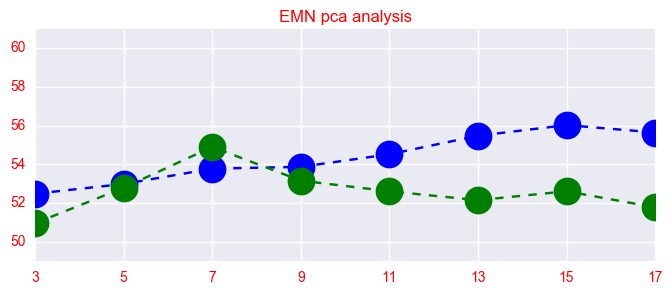

AMT n_components 3 accuracy train 51.66 accuracy test 50.21
AMT n_components 5 accuracy train 53.66 accuracy test 49.71
AMT n_components 7 accuracy train 56.03 accuracy test 52.79
AMT n_components 9 accuracy train 56.08 accuracy test 52.79
AMT n_components 11 accuracy train 56.5 accuracy test 51.79
AMT n_components 13 accuracy train 56.87 accuracy test 53.29
AMT n_components 15 accuracy train 56.55 accuracy test 54.2
AMT n_components 17 accuracy train 56.65 accuracy test 53.29


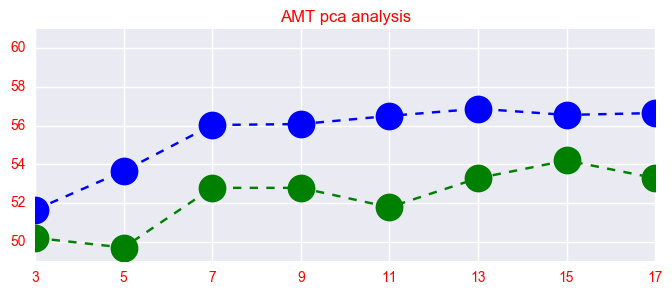

FLR n_components 3 accuracy train 51.19 accuracy test 52.37
FLR n_components 5 accuracy train 51.83 accuracy test 52.22
FLR n_components 7 accuracy train 54.85 accuracy test 50.77
FLR n_components 9 accuracy train 54.47 accuracy test 50.92
FLR n_components 11 accuracy train 55.92 accuracy test 53.06
FLR n_components 13 accuracy train 55.37 accuracy test 52.14
FLR n_components 15 accuracy train 55.78 accuracy test 53.22
FLR n_components 17 accuracy train 56.35 accuracy test 52.83


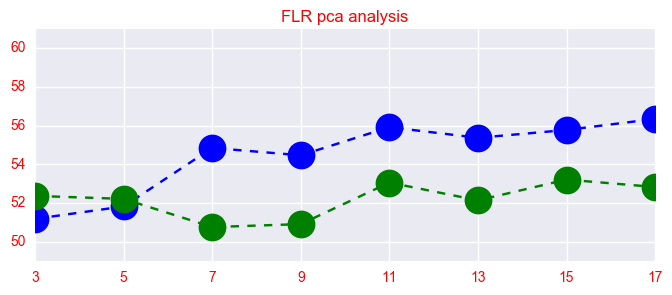

IBM n_components 3 accuracy train 53.14 accuracy test 51.36
IBM n_components 5 accuracy train 52.34 accuracy test 48.31
IBM n_components 7 accuracy train 54.11 accuracy test 50.56
IBM n_components 9 accuracy train 54.25 accuracy test 50.72
IBM n_components 11 accuracy train 54.67 accuracy test 49.68
IBM n_components 13 accuracy train 54.74 accuracy test 49.76
IBM n_components 15 accuracy train 55.72 accuracy test 49.04
IBM n_components 17 accuracy train 55.49 accuracy test 48.8


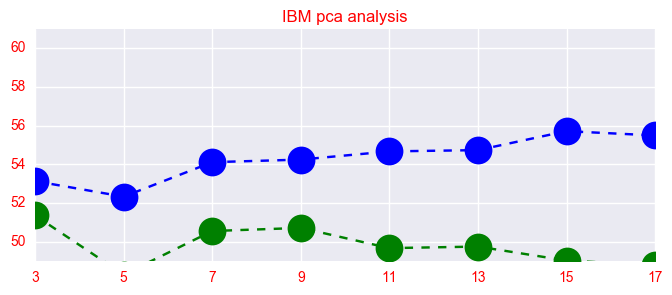

BK n_components 3 accuracy train 53.33 accuracy test 49.95
BK n_components 5 accuracy train 53.66 accuracy test 47.79
BK n_components 7 accuracy train 54.18 accuracy test 50.8
BK n_components 9 accuracy train 54.49 accuracy test 50.23
BK n_components 11 accuracy train 54.81 accuracy test 49.86
BK n_components 13 accuracy train 56.21 accuracy test 52.68
BK n_components 15 accuracy train 55.56 accuracy test 52.02
BK n_components 17 accuracy train 55.69 accuracy test 52.02


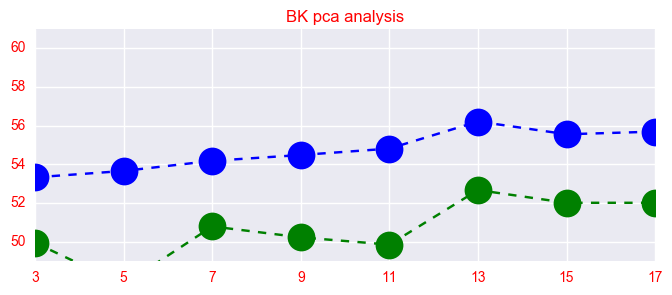

done 80%
NFX n_components 3 accuracy train 51.3 accuracy test 51.87
NFX n_components 5 accuracy train 53.48 accuracy test 53.16
NFX n_components 7 accuracy train 54.04 accuracy test 52.76
NFX n_components 9 accuracy train 54.49 accuracy test 52.86
NFX n_components 11 accuracy train 54.49 accuracy test 52.47
NFX n_components 13 accuracy train 55.35 accuracy test 53.94
NFX n_components 15 accuracy train 54.56 accuracy test 55.03
NFX n_components 17 accuracy train 55.03 accuracy test 54.24


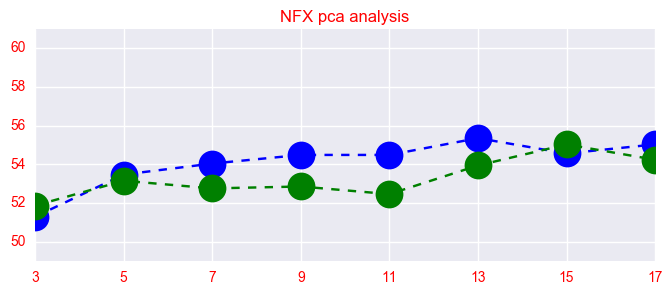

AGN n_components 3 accuracy train 54.26 accuracy test 52.03
AGN n_components 5 accuracy train 54.84 accuracy test 51.39
AGN n_components 7 accuracy train 55.94 accuracy test 51.03
AGN n_components 9 accuracy train 56.37 accuracy test 50.96
AGN n_components 11 accuracy train 55.69 accuracy test 50.39
AGN n_components 13 accuracy train 56.14 accuracy test 50.82
AGN n_components 15 accuracy train 56.62 accuracy test 50.82
AGN n_components 17 accuracy train 55.87 accuracy test 51.03


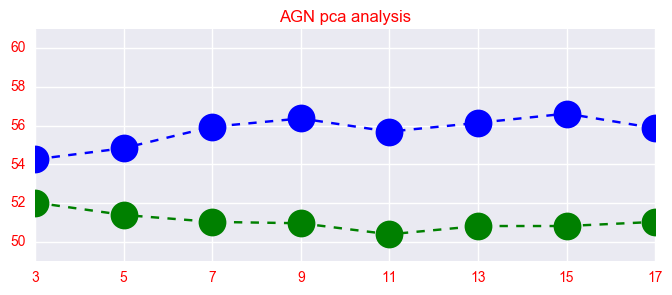

LRCX n_components 3 accuracy train 53.65 accuracy test 49.36
LRCX n_components 5 accuracy train 52.95 accuracy test 51.68
LRCX n_components 7 accuracy train 55.66 accuracy test 49.52
LRCX n_components 9 accuracy train 55.5 accuracy test 50.16
LRCX n_components 11 accuracy train 56.08 accuracy test 50.8
LRCX n_components 13 accuracy train 55.83 accuracy test 50.88
LRCX n_components 15 accuracy train 55.83 accuracy test 50.96
LRCX n_components 17 accuracy train 56.13 accuracy test 51.12


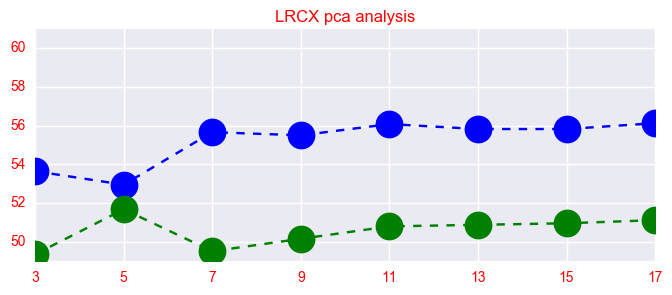

DIS n_components 3 accuracy train 52.42 accuracy test 53.57
DIS n_components 5 accuracy train 52.47 accuracy test 52.6
DIS n_components 7 accuracy train 54.09 accuracy test 52.6
DIS n_components 9 accuracy train 54.8 accuracy test 50.22
DIS n_components 11 accuracy train 55.07 accuracy test 50.66
DIS n_components 13 accuracy train 54.45 accuracy test 51.37
DIS n_components 15 accuracy train 54.61 accuracy test 52.07
DIS n_components 17 accuracy train 54.89 accuracy test 51.37


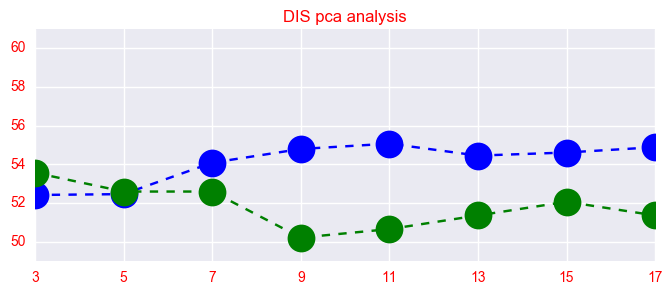

LH n_components 3 accuracy train 52.92 accuracy test 53.64
LH n_components 5 accuracy train 53.51 accuracy test 50.86
LH n_components 7 accuracy train 54.54 accuracy test 52.82
LH n_components 9 accuracy train 55.11 accuracy test 54.05
LH n_components 11 accuracy train 55.75 accuracy test 54.78
LH n_components 13 accuracy train 55.83 accuracy test 54.37
LH n_components 15 accuracy train 56.38 accuracy test 53.39
LH n_components 17 accuracy train 56.82 accuracy test 54.29


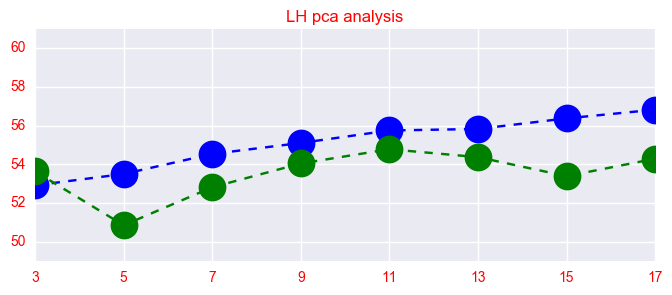

C n_components 3 accuracy train 51.91 accuracy test 52.12
C n_components 5 accuracy train 52.14 accuracy test 52.29
C n_components 7 accuracy train 52.63 accuracy test 50.62
C n_components 9 accuracy train 53.4 accuracy test 50.71
C n_components 11 accuracy train 53.96 accuracy test 51.94
C n_components 13 accuracy train 53.94 accuracy test 52.38
C n_components 15 accuracy train 54.03 accuracy test 51.85
C n_components 17 accuracy train 53.98 accuracy test 51.06


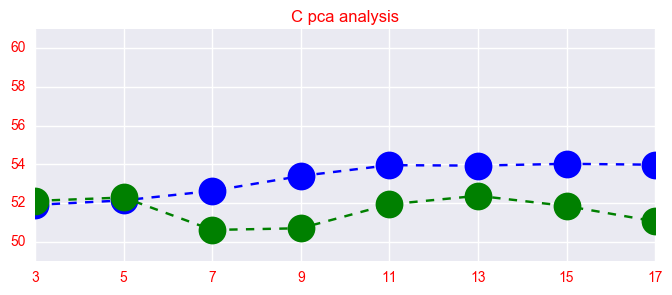

done 100%
MNK n_components 3 accuracy train 51.82 accuracy test 52.62
MNK n_components 5 accuracy train 54.77 accuracy test 52.49
MNK n_components 7 accuracy train 54.42 accuracy test 53.62
MNK n_components 9 accuracy train 54.77 accuracy test 54.28
MNK n_components 11 accuracy train 54.77 accuracy test 54.28
MNK n_components 13 accuracy train 54.97 accuracy test 54.08
MNK n_components 15 accuracy train 55.32 accuracy test 54.81
MNK n_components 17 accuracy train 55.15 accuracy test 54.88


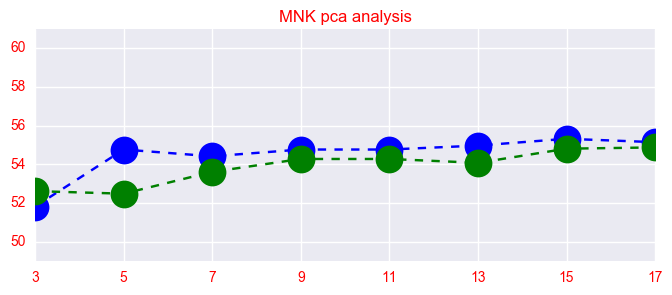

In [30]:
n_components_vec_1p2_extra_second_order = np.arange(3, len(features_1p2_extra_second_order)+1, 2)
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_pca2, acc_test_pca2 = clf_portfolio_dic.getModelPCA(clf, features_1p2_extra_second_order, n_components_vec_1p2_extra_second_order)

In [31]:
experiment6 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with PCA - 1.2extra_second_order",
    stocks=stocks, originalFeatures=features_1p2_extra_second_order)

In [32]:
experiment6.setTrainResults(acc_train_pca2)
experiment6.setTestResults(acc_test_pca2)
print("The test accuracy (mean - std) is:")
print(experiment6.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 48.99171589  48.91353867  49.80334505  50.06272698  49.65449867
  49.74751046  49.78596872  49.76896987]


1.4extra and 1.4extra_second_order

In [33]:
a1 = np.arange(3, len(features_1p4_extra)+1, 2)
a2 = np.logspace(1, math.log(len(features_1p4_extra),2), num=40, base=2).astype('int32')
n_components_vec_1p4_extra = np.concatenate((a1[:10],a2[20:]),axis=0)

DNB n_components 3 accuracy train 52.12 accuracy test 51.76
DNB n_components 5 accuracy train 52.24 accuracy test 53.1
DNB n_components 7 accuracy train 52.36 accuracy test 52.81
DNB n_components 9 accuracy train 53.33 accuracy test 53.25
DNB n_components 11 accuracy train 53.05 accuracy test 53.15
DNB n_components 13 accuracy train 53.26 accuracy test 53.4
DNB n_components 15 accuracy train 53.53 accuracy test 52.81
DNB n_components 17 accuracy train 54.34 accuracy test 53.85
DNB n_components 19 accuracy train 54.02 accuracy test 53.5
DNB n_components 21 accuracy train 54.52 accuracy test 53.65
DNB n_components 23 accuracy train 54.57 accuracy test 53.65
DNB n_components 26 accuracy train 54.82 accuracy test 53.65
DNB n_components 29 accuracy train 54.81 accuracy test 53.25
DNB n_components 33 accuracy train 54.93 accuracy test 52.36
DNB n_components 37 accuracy train 55.01 accuracy test 53.5
DNB n_components 42 accuracy train 55.01 accuracy test 53.3
DNB n_components 48 accuracy trai

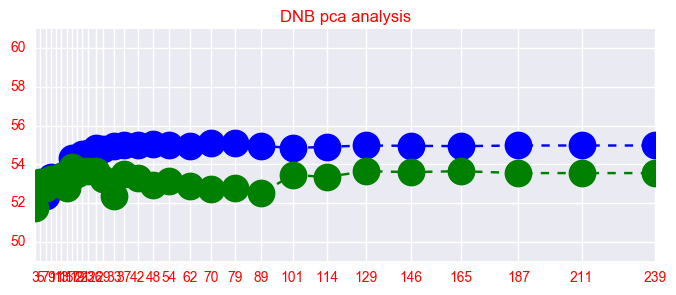

NRG n_components 3 accuracy train 54.45 accuracy test 54.14
NRG n_components 5 accuracy train 54.31 accuracy test 54.24
NRG n_components 7 accuracy train 54.43 accuracy test 54.24
NRG n_components 9 accuracy train 54.24 accuracy test 54.43
NRG n_components 11 accuracy train 54.33 accuracy test 53.46
NRG n_components 13 accuracy train 54.61 accuracy test 53.65
NRG n_components 15 accuracy train 54.63 accuracy test 54.43
NRG n_components 17 accuracy train 54.63 accuracy test 54.43
NRG n_components 19 accuracy train 54.52 accuracy test 55.01
NRG n_components 21 accuracy train 54.7 accuracy test 54.63
NRG n_components 23 accuracy train 54.82 accuracy test 54.33
NRG n_components 26 accuracy train 55.6 accuracy test 53.55
NRG n_components 29 accuracy train 56.48 accuracy test 53.65
NRG n_components 33 accuracy train 56.74 accuracy test 54.04
NRG n_components 37 accuracy train 56.71 accuracy test 53.65
NRG n_components 42 accuracy train 56.78 accuracy test 54.24
NRG n_components 48 accuracy t

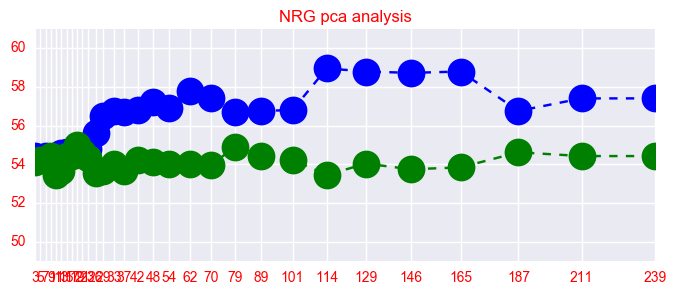

CL n_components 3 accuracy train 52.08 accuracy test 50.54
CL n_components 5 accuracy train 53.38 accuracy test 52.35
CL n_components 7 accuracy train 54.44 accuracy test 50.72
CL n_components 9 accuracy train 54.09 accuracy test 51.72
CL n_components 11 accuracy train 54.09 accuracy test 51.99
CL n_components 13 accuracy train 54.83 accuracy test 51.81
CL n_components 15 accuracy train 54.98 accuracy test 51.99
CL n_components 17 accuracy train 54.95 accuracy test 52.17
CL n_components 19 accuracy train 55.32 accuracy test 49.82
CL n_components 21 accuracy train 54.98 accuracy test 50.72
CL n_components 23 accuracy train 54.56 accuracy test 51.08
CL n_components 26 accuracy train 55.1 accuracy test 51.36
CL n_components 29 accuracy train 55.39 accuracy test 51.08
CL n_components 33 accuracy train 55.88 accuracy test 50.18
CL n_components 37 accuracy train 55.47 accuracy test 51.63
CL n_components 42 accuracy train 56.23 accuracy test 51.72
CL n_components 48 accuracy train 56.1 accura

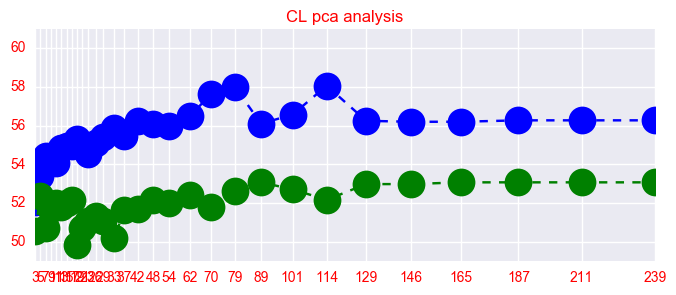

ANTM n_components 3 accuracy train 52.65 accuracy test 46.8
ANTM n_components 5 accuracy train 52.47 accuracy test 47.28
ANTM n_components 7 accuracy train 54.21 accuracy test 49.41
ANTM n_components 9 accuracy train 54.21 accuracy test 46.96
ANTM n_components 11 accuracy train 55.25 accuracy test 49.09
ANTM n_components 13 accuracy train 54.21 accuracy test 48.7
ANTM n_components 15 accuracy train 56.2 accuracy test 48.78
ANTM n_components 17 accuracy train 57.5 accuracy test 49.64
ANTM n_components 19 accuracy train 56.81 accuracy test 48.54
ANTM n_components 21 accuracy train 56.55 accuracy test 49.17
ANTM n_components 23 accuracy train 57.33 accuracy test 49.64
ANTM n_components 26 accuracy train 57.24 accuracy test 49.17
ANTM n_components 29 accuracy train 56.98 accuracy test 48.38
ANTM n_components 33 accuracy train 56.81 accuracy test 48.46
ANTM n_components 37 accuracy train 57.33 accuracy test 47.99
ANTM n_components 42 accuracy train 57.07 accuracy test 48.46
ANTM n_component

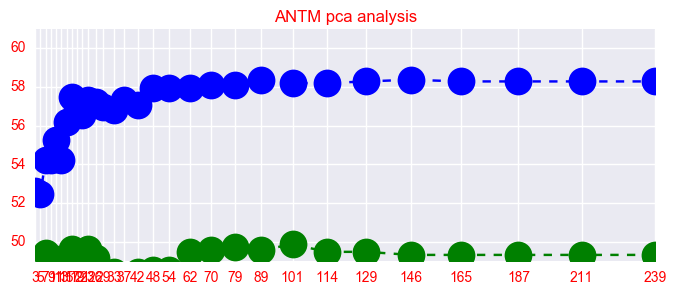

NEE n_components 3 accuracy train 54.56 accuracy test 49.52
NEE n_components 5 accuracy train 54.4 accuracy test 48.1
NEE n_components 7 accuracy train 56.2 accuracy test 49.62
NEE n_components 9 accuracy train 56.02 accuracy test 49.71
NEE n_components 11 accuracy train 56.23 accuracy test 49.81
NEE n_components 13 accuracy train 56.04 accuracy test 49.71
NEE n_components 15 accuracy train 56.34 accuracy test 50.29
NEE n_components 17 accuracy train 55.99 accuracy test 50.29
NEE n_components 19 accuracy train 56.77 accuracy test 51.52
NEE n_components 21 accuracy train 56.34 accuracy test 50.19
NEE n_components 23 accuracy train 56.37 accuracy test 50.38
NEE n_components 26 accuracy train 57.28 accuracy test 50.38
NEE n_components 29 accuracy train 57.31 accuracy test 50.86
NEE n_components 33 accuracy train 57.15 accuracy test 50.29
NEE n_components 37 accuracy train 56.74 accuracy test 50.38
NEE n_components 42 accuracy train 57.23 accuracy test 50.76
NEE n_components 48 accuracy tr

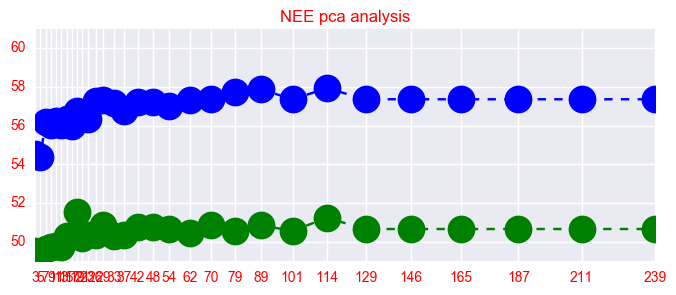

done 20%
PAYX n_components 3 accuracy train 51.31 accuracy test 51.37
PAYX n_components 5 accuracy train 51.8 accuracy test 49.84
PAYX n_components 7 accuracy train 51.69 accuracy test 50.16
PAYX n_components 9 accuracy train 52.92 accuracy test 49.35
PAYX n_components 11 accuracy train 52.9 accuracy test 48.95
PAYX n_components 13 accuracy train 52.69 accuracy test 50.24
PAYX n_components 15 accuracy train 53.69 accuracy test 50.81
PAYX n_components 17 accuracy train 53.48 accuracy test 50.89
PAYX n_components 19 accuracy train 54.18 accuracy test 49.03
PAYX n_components 21 accuracy train 53.8 accuracy test 50.24
PAYX n_components 23 accuracy train 54.15 accuracy test 49.68
PAYX n_components 26 accuracy train 54.18 accuracy test 51.13
PAYX n_components 29 accuracy train 54.18 accuracy test 50.4
PAYX n_components 33 accuracy train 54.78 accuracy test 49.76
PAYX n_components 37 accuracy train 54.15 accuracy test 50.57
PAYX n_components 42 accuracy train 55.22 accuracy test 49.11
PAYX n_

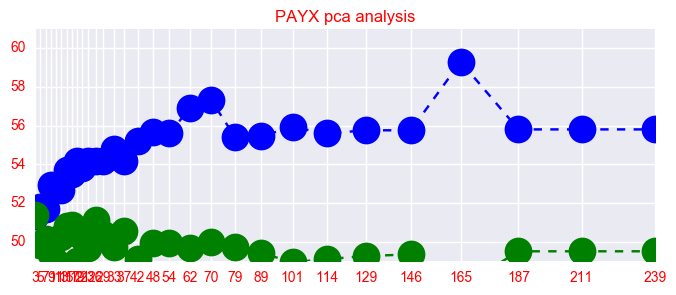

VAR n_components 3 accuracy train 51.68 accuracy test 52.29
VAR n_components 5 accuracy train 52.9 accuracy test 51.93
VAR n_components 7 accuracy train 52.64 accuracy test 51.29
VAR n_components 9 accuracy train 53.48 accuracy test 53.44
VAR n_components 11 accuracy train 54.01 accuracy test 52.29
VAR n_components 13 accuracy train 54.38 accuracy test 54.44
VAR n_components 15 accuracy train 54.14 accuracy test 54.51
VAR n_components 17 accuracy train 54.42 accuracy test 55.16
VAR n_components 19 accuracy train 55.13 accuracy test 54.94
VAR n_components 21 accuracy train 55.26 accuracy test 54.3
VAR n_components 23 accuracy train 55.88 accuracy test 53.65
VAR n_components 26 accuracy train 56.18 accuracy test 54.08
VAR n_components 29 accuracy train 56.24 accuracy test 53.87
VAR n_components 33 accuracy train 56.24 accuracy test 53.87
VAR n_components 37 accuracy train 56.63 accuracy test 52.36
VAR n_components 42 accuracy train 57.12 accuracy test 52.22
VAR n_components 48 accuracy t

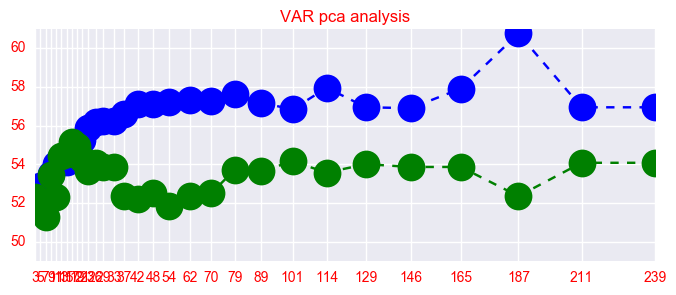

NI n_components 3 accuracy train 52.9 accuracy test 49.39
NI n_components 5 accuracy train 52.82 accuracy test 49.59
NI n_components 7 accuracy train 53.12 accuracy test 50.1
NI n_components 9 accuracy train 53.35 accuracy test 48.87
NI n_components 11 accuracy train 53.25 accuracy test 49.8
NI n_components 13 accuracy train 53.87 accuracy test 48.05
NI n_components 15 accuracy train 53.3 accuracy test 49.69
NI n_components 17 accuracy train 54.55 accuracy test 48.26
NI n_components 19 accuracy train 55.0 accuracy test 48.26
NI n_components 21 accuracy train 55.05 accuracy test 50.31
NI n_components 23 accuracy train 54.9 accuracy test 51.33
NI n_components 26 accuracy train 55.85 accuracy test 51.33
NI n_components 29 accuracy train 56.22 accuracy test 50.41
NI n_components 33 accuracy train 56.8 accuracy test 51.13
NI n_components 37 accuracy train 56.85 accuracy test 51.33
NI n_components 42 accuracy train 56.9 accuracy test 52.77
NI n_components 48 accuracy train 56.85 accuracy tes

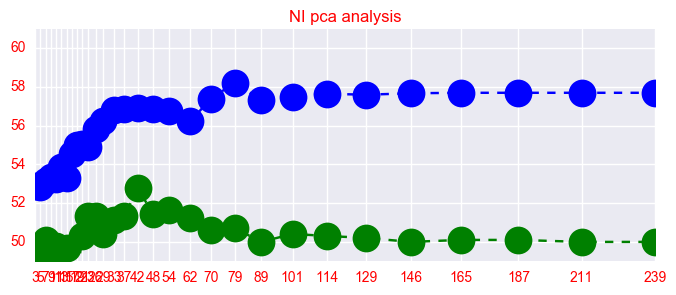

MNST n_components 3 accuracy train 52.79 accuracy test 49.59
MNST n_components 5 accuracy train 52.66 accuracy test 49.82
MNST n_components 7 accuracy train 52.5 accuracy test 50.33
MNST n_components 9 accuracy train 53.37 accuracy test 51.37
MNST n_components 11 accuracy train 53.4 accuracy test 51.15
MNST n_components 13 accuracy train 53.46 accuracy test 51.07
MNST n_components 15 accuracy train 54.38 accuracy test 51.15
MNST n_components 17 accuracy train 54.15 accuracy test 51.37
MNST n_components 19 accuracy train 54.48 accuracy test 50.63
MNST n_components 21 accuracy train 54.29 accuracy test 50.63
MNST n_components 23 accuracy train 54.79 accuracy test 50.18
MNST n_components 26 accuracy train 55.0 accuracy test 50.63
MNST n_components 29 accuracy train 54.94 accuracy test 50.41
MNST n_components 33 accuracy train 54.88 accuracy test 50.92
MNST n_components 37 accuracy train 54.92 accuracy test 50.7
MNST n_components 42 accuracy train 55.21 accuracy test 51.0
MNST n_components

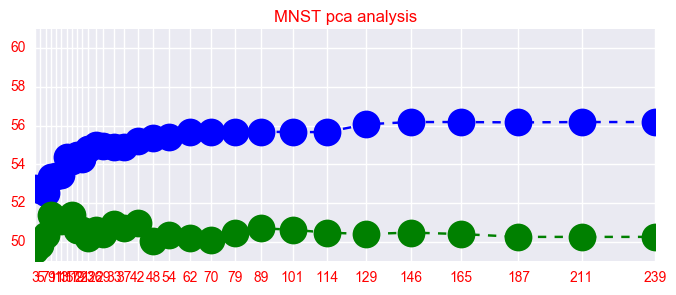

JNJ n_components 3 accuracy train 52.81 accuracy test 49.92
JNJ n_components 5 accuracy train 52.72 accuracy test 50.39
JNJ n_components 7 accuracy train 52.89 accuracy test 50.78
JNJ n_components 9 accuracy train 53.23 accuracy test 49.45
JNJ n_components 11 accuracy train 53.6 accuracy test 49.06
JNJ n_components 13 accuracy train 53.78 accuracy test 48.21
JNJ n_components 15 accuracy train 54.07 accuracy test 48.21
JNJ n_components 17 accuracy train 55.29 accuracy test 49.14
JNJ n_components 19 accuracy train 54.62 accuracy test 48.75
JNJ n_components 21 accuracy train 55.31 accuracy test 48.83
JNJ n_components 23 accuracy train 54.62 accuracy test 50.7
JNJ n_components 26 accuracy train 55.16 accuracy test 49.84
JNJ n_components 29 accuracy train 54.85 accuracy test 50.0
JNJ n_components 33 accuracy train 55.07 accuracy test 48.99
JNJ n_components 37 accuracy train 54.96 accuracy test 49.84
JNJ n_components 42 accuracy train 55.05 accuracy test 49.92
JNJ n_components 48 accuracy tr

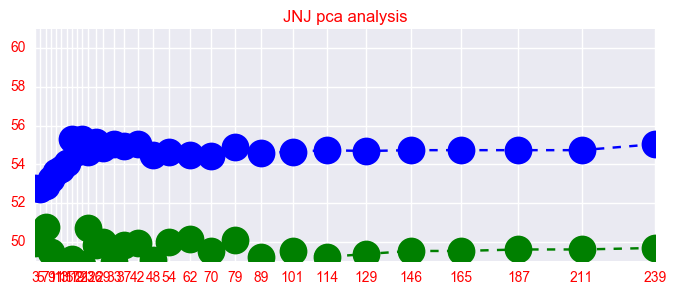

TGNA n_components 3 accuracy train 54.1 accuracy test 48.51
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 57.42 accuracy test 50.08
TGNA n_components 13 accuracy train 57.42 accuracy test 49.45
TGNA n_components 15 accuracy train 59.38 accuracy test 50.86
TGNA n_components 17 accuracy train 60.35 accuracy test 50.47
TGNA n_components 19 accuracy train 61.52 accuracy test 50.39
TGNA n_components 21 accuracy train 61.13 accuracy test 49.37
TGNA n_components 23 accuracy train 54.49 accuracy test 48.04
TGNA n_components 26 accuracy train 60.74 accuracy test 49.84
TGNA n_components 29 accuracy train 54.3 accuracy test 48.04
TGNA n_components 33 accuracy train 54.3 accuracy test 48.04
TGNA n_components 37 accuracy train 54.3 accuracy test 48.04
TGNA n_components 42 accuracy train 54.3 accuracy test 48.04
TGNA n_components 48

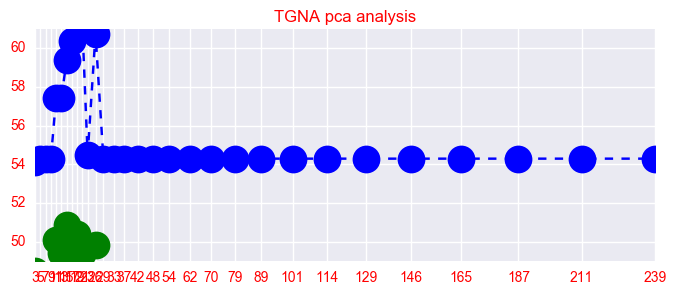

done 40%
NOV n_components 3 accuracy train 51.24 accuracy test 50.73
NOV n_components 5 accuracy train 52.29 accuracy test 52.51
NOV n_components 7 accuracy train 52.24 accuracy test 51.78
NOV n_components 9 accuracy train 53.5 accuracy test 49.6
NOV n_components 11 accuracy train 53.55 accuracy test 49.68
NOV n_components 13 accuracy train 53.86 accuracy test 49.84
NOV n_components 15 accuracy train 54.96 accuracy test 51.62
NOV n_components 17 accuracy train 55.25 accuracy test 51.46
NOV n_components 19 accuracy train 55.49 accuracy test 51.05
NOV n_components 21 accuracy train 55.9 accuracy test 49.92
NOV n_components 23 accuracy train 56.04 accuracy test 49.92
NOV n_components 26 accuracy train 55.88 accuracy test 51.05
NOV n_components 29 accuracy train 55.93 accuracy test 51.94
NOV n_components 33 accuracy train 56.45 accuracy test 51.78
NOV n_components 37 accuracy train 56.61 accuracy test 51.7
NOV n_components 42 accuracy train 56.79 accuracy test 52.1
NOV n_components 48 accu

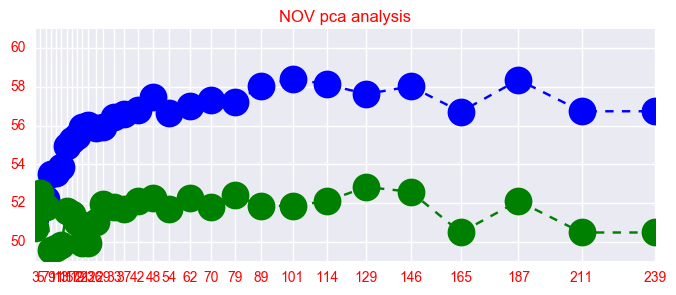

FIS n_components 3 accuracy train 51.03 accuracy test 51.57
FIS n_components 5 accuracy train 51.56 accuracy test 52.08
FIS n_components 7 accuracy train 51.71 accuracy test 51.13
FIS n_components 9 accuracy train 51.18 accuracy test 53.46
FIS n_components 11 accuracy train 51.69 accuracy test 52.08
FIS n_components 13 accuracy train 53.05 accuracy test 52.15
FIS n_components 15 accuracy train 52.92 accuracy test 52.59
FIS n_components 17 accuracy train 53.54 accuracy test 50.04
FIS n_components 19 accuracy train 53.73 accuracy test 49.96
FIS n_components 21 accuracy train 54.24 accuracy test 51.71
FIS n_components 23 accuracy train 54.22 accuracy test 51.2
FIS n_components 26 accuracy train 55.56 accuracy test 50.62
FIS n_components 29 accuracy train 56.22 accuracy test 51.57
FIS n_components 33 accuracy train 56.26 accuracy test 51.57
FIS n_components 37 accuracy train 55.83 accuracy test 51.06
FIS n_components 42 accuracy train 56.24 accuracy test 52.29
FIS n_components 48 accuracy 

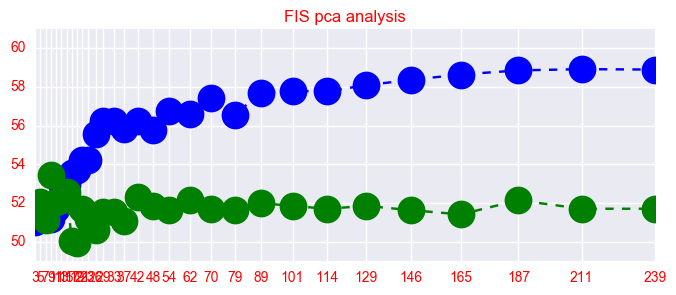

BLK n_components 3 accuracy train 52.37 accuracy test 51.76
BLK n_components 5 accuracy train 54.37 accuracy test 50.39
BLK n_components 7 accuracy train 54.59 accuracy test 51.07
BLK n_components 9 accuracy train 55.5 accuracy test 52.53
BLK n_components 11 accuracy train 56.64 accuracy test 53.73
BLK n_components 13 accuracy train 56.66 accuracy test 53.98
BLK n_components 15 accuracy train 57.02 accuracy test 53.3
BLK n_components 17 accuracy train 57.14 accuracy test 54.76
BLK n_components 19 accuracy train 57.07 accuracy test 53.9
BLK n_components 21 accuracy train 56.95 accuracy test 53.98
BLK n_components 23 accuracy train 57.75 accuracy test 54.07
BLK n_components 26 accuracy train 58.07 accuracy test 53.81
BLK n_components 29 accuracy train 57.75 accuracy test 54.76
BLK n_components 33 accuracy train 57.89 accuracy test 54.33
BLK n_components 37 accuracy train 58.7 accuracy test 55.18
BLK n_components 42 accuracy train 58.82 accuracy test 54.84
BLK n_components 48 accuracy tra

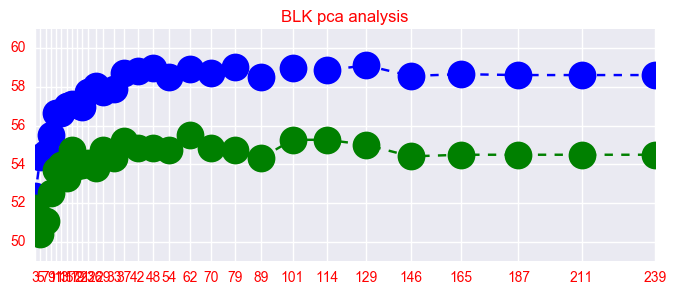

HBI n_components 3 accuracy train 53.73 accuracy test 52.31
HBI n_components 5 accuracy train 53.86 accuracy test 52.17
HBI n_components 7 accuracy train 53.84 accuracy test 51.83
HBI n_components 9 accuracy train 55.79 accuracy test 51.76
HBI n_components 11 accuracy train 55.47 accuracy test 51.9
HBI n_components 13 accuracy train 55.28 accuracy test 52.45
HBI n_components 15 accuracy train 56.19 accuracy test 52.38
HBI n_components 17 accuracy train 55.76 accuracy test 51.55
HBI n_components 19 accuracy train 56.0 accuracy test 51.21
HBI n_components 21 accuracy train 56.53 accuracy test 51.28
HBI n_components 23 accuracy train 56.31 accuracy test 51.48
HBI n_components 26 accuracy train 57.22 accuracy test 51.76
HBI n_components 29 accuracy train 56.93 accuracy test 51.76
HBI n_components 33 accuracy train 56.95 accuracy test 51.62
HBI n_components 37 accuracy train 57.14 accuracy test 51.21
HBI n_components 42 accuracy train 57.16 accuracy test 51.35
HBI n_components 48 accuracy t

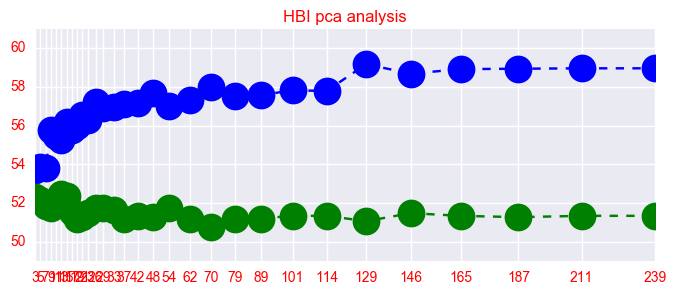

NVDA n_components 3 accuracy train 52.06 accuracy test 53.03
NVDA n_components 5 accuracy train 52.17 accuracy test 53.03
NVDA n_components 7 accuracy train 52.11 accuracy test 52.75
NVDA n_components 9 accuracy train 55.0 accuracy test 51.75
NVDA n_components 11 accuracy train 55.23 accuracy test 51.96
NVDA n_components 13 accuracy train 55.57 accuracy test 52.46
NVDA n_components 15 accuracy train 55.23 accuracy test 52.68
NVDA n_components 17 accuracy train 55.11 accuracy test 53.1
NVDA n_components 19 accuracy train 56.4 accuracy test 52.32
NVDA n_components 21 accuracy train 55.88 accuracy test 50.11
NVDA n_components 23 accuracy train 56.24 accuracy test 50.68
NVDA n_components 26 accuracy train 56.6 accuracy test 51.68
NVDA n_components 29 accuracy train 56.7 accuracy test 51.03
NVDA n_components 33 accuracy train 56.7 accuracy test 52.61
NVDA n_components 37 accuracy train 56.7 accuracy test 52.61
NVDA n_components 42 accuracy train 56.78 accuracy test 52.11
NVDA n_components 4

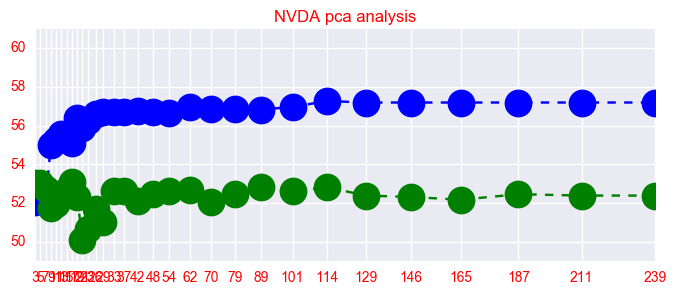

DLTR n_components 3 accuracy train 50.72 accuracy test 52.26
DLTR n_components 5 accuracy train 51.99 accuracy test 49.71
DLTR n_components 7 accuracy train 52.24 accuracy test 51.27
DLTR n_components 9 accuracy train 52.5 accuracy test 50.62
DLTR n_components 11 accuracy train 52.98 accuracy test 50.7
DLTR n_components 13 accuracy train 53.09 accuracy test 50.62
DLTR n_components 15 accuracy train 52.9 accuracy test 50.37
DLTR n_components 17 accuracy train 53.03 accuracy test 49.96
DLTR n_components 19 accuracy train 53.83 accuracy test 51.19
DLTR n_components 21 accuracy train 54.17 accuracy test 50.04
DLTR n_components 23 accuracy train 54.28 accuracy test 50.62
DLTR n_components 26 accuracy train 54.72 accuracy test 49.55
DLTR n_components 29 accuracy train 53.75 accuracy test 49.63
DLTR n_components 33 accuracy train 54.74 accuracy test 49.22
DLTR n_components 37 accuracy train 55.48 accuracy test 49.47
DLTR n_components 42 accuracy train 55.5 accuracy test 48.73
DLTR n_component

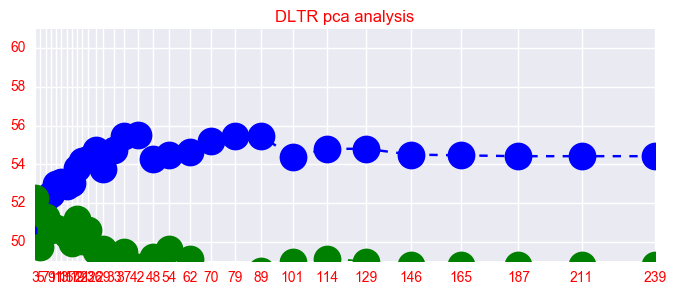

done 60%
MRO n_components 3 accuracy train 50.73 accuracy test 49.7
MRO n_components 5 accuracy train 50.75 accuracy test 47.97
MRO n_components 7 accuracy train 52.18 accuracy test 50.81
MRO n_components 9 accuracy train 52.16 accuracy test 50.0
MRO n_components 11 accuracy train 52.69 accuracy test 51.22
MRO n_components 13 accuracy train 53.22 accuracy test 50.2
MRO n_components 15 accuracy train 53.8 accuracy test 50.71
MRO n_components 17 accuracy train 54.3 accuracy test 51.12
MRO n_components 19 accuracy train 54.51 accuracy test 50.81
MRO n_components 21 accuracy train 54.46 accuracy test 50.81
MRO n_components 23 accuracy train 54.96 accuracy test 50.91
MRO n_components 26 accuracy train 54.56 accuracy test 51.02
MRO n_components 29 accuracy train 54.27 accuracy test 51.52
MRO n_components 33 accuracy train 54.91 accuracy test 51.22
MRO n_components 37 accuracy train 55.36 accuracy test 50.71
MRO n_components 42 accuracy train 55.09 accuracy test 52.03
MRO n_components 48 accu

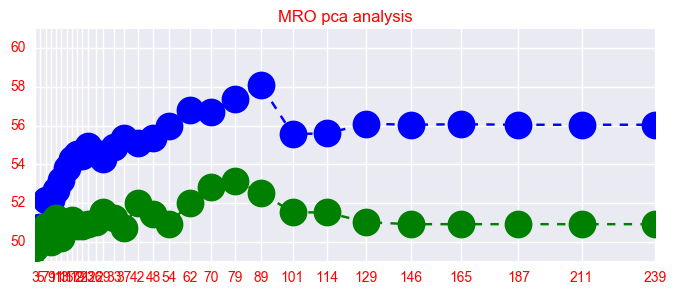

EMN n_components 3 accuracy train 52.63 accuracy test 51.42
EMN n_components 5 accuracy train 53.06 accuracy test 50.23
EMN n_components 7 accuracy train 53.83 accuracy test 49.5
EMN n_components 9 accuracy train 54.04 accuracy test 51.97
EMN n_components 11 accuracy train 53.73 accuracy test 51.79
EMN n_components 13 accuracy train 54.09 accuracy test 51.97
EMN n_components 15 accuracy train 54.09 accuracy test 52.25
EMN n_components 17 accuracy train 54.35 accuracy test 51.97
EMN n_components 19 accuracy train 54.16 accuracy test 52.15
EMN n_components 21 accuracy train 54.45 accuracy test 52.06
EMN n_components 23 accuracy train 54.28 accuracy test 51.42
EMN n_components 26 accuracy train 54.5 accuracy test 51.79
EMN n_components 29 accuracy train 54.98 accuracy test 51.33
EMN n_components 33 accuracy train 54.78 accuracy test 51.24
EMN n_components 37 accuracy train 54.74 accuracy test 51.79
EMN n_components 42 accuracy train 54.62 accuracy test 51.15
EMN n_components 48 accuracy t

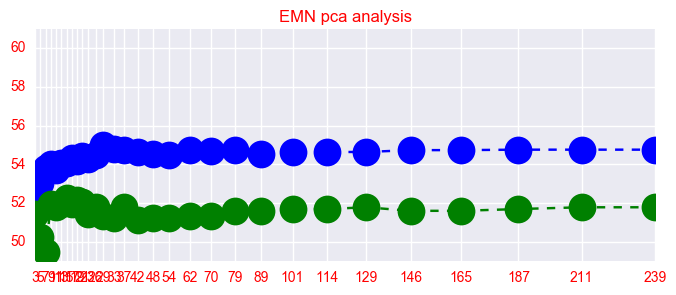

AMT n_components 3 accuracy train 52.62 accuracy test 50.04
AMT n_components 5 accuracy train 52.5 accuracy test 50.37
AMT n_components 7 accuracy train 52.08 accuracy test 49.13
AMT n_components 9 accuracy train 54.01 accuracy test 51.96
AMT n_components 11 accuracy train 54.67 accuracy test 52.29
AMT n_components 13 accuracy train 54.82 accuracy test 52.62
AMT n_components 15 accuracy train 55.27 accuracy test 52.62
AMT n_components 17 accuracy train 55.76 accuracy test 52.37
AMT n_components 19 accuracy train 56.13 accuracy test 53.21
AMT n_components 21 accuracy train 56.06 accuracy test 53.87
AMT n_components 23 accuracy train 55.84 accuracy test 53.21
AMT n_components 26 accuracy train 56.45 accuracy test 53.96
AMT n_components 29 accuracy train 56.16 accuracy test 53.04
AMT n_components 33 accuracy train 56.28 accuracy test 52.37
AMT n_components 37 accuracy train 56.63 accuracy test 52.79
AMT n_components 42 accuracy train 57.44 accuracy test 54.2
AMT n_components 48 accuracy t

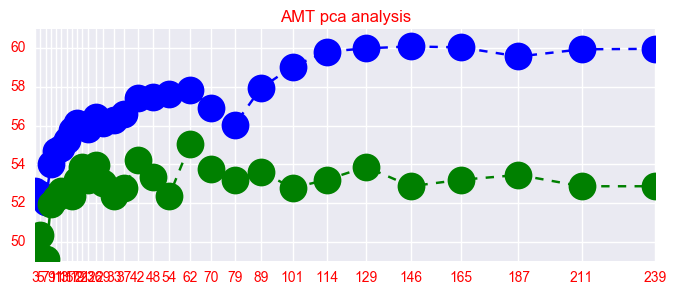

FLR n_components 3 accuracy train 52.12 accuracy test 49.0
FLR n_components 5 accuracy train 51.55 accuracy test 49.08
FLR n_components 7 accuracy train 53.35 accuracy test 51.07
FLR n_components 9 accuracy train 54.16 accuracy test 52.76
FLR n_components 11 accuracy train 54.33 accuracy test 51.68
FLR n_components 13 accuracy train 54.16 accuracy test 51.15
FLR n_components 15 accuracy train 53.95 accuracy test 51.61
FLR n_components 17 accuracy train 54.92 accuracy test 50.54
FLR n_components 19 accuracy train 55.59 accuracy test 50.61
FLR n_components 21 accuracy train 55.73 accuracy test 50.69
FLR n_components 23 accuracy train 55.85 accuracy test 49.77
FLR n_components 26 accuracy train 56.16 accuracy test 50.0
FLR n_components 29 accuracy train 55.94 accuracy test 51.3
FLR n_components 33 accuracy train 55.87 accuracy test 50.08
FLR n_components 37 accuracy train 56.56 accuracy test 50.84
FLR n_components 42 accuracy train 56.09 accuracy test 51.84
FLR n_components 48 accuracy tr

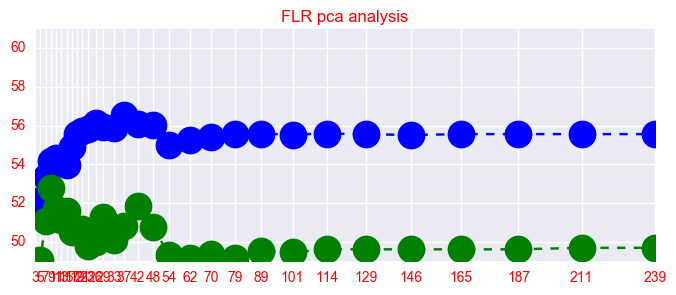

IBM n_components 3 accuracy train 50.67 accuracy test 53.37
IBM n_components 5 accuracy train 53.76 accuracy test 52.65
IBM n_components 7 accuracy train 53.91 accuracy test 52.17
IBM n_components 9 accuracy train 54.65 accuracy test 52.33
IBM n_components 11 accuracy train 54.67 accuracy test 52.01
IBM n_components 13 accuracy train 53.89 accuracy test 51.44
IBM n_components 15 accuracy train 53.98 accuracy test 51.61
IBM n_components 17 accuracy train 54.56 accuracy test 52.49
IBM n_components 19 accuracy train 55.45 accuracy test 51.28
IBM n_components 21 accuracy train 55.38 accuracy test 51.44
IBM n_components 23 accuracy train 55.49 accuracy test 51.69
IBM n_components 26 accuracy train 55.52 accuracy test 51.85
IBM n_components 29 accuracy train 55.69 accuracy test 50.4
IBM n_components 33 accuracy train 55.65 accuracy test 50.8
IBM n_components 37 accuracy train 55.6 accuracy test 49.68
IBM n_components 42 accuracy train 55.81 accuracy test 49.76
IBM n_components 48 accuracy tr

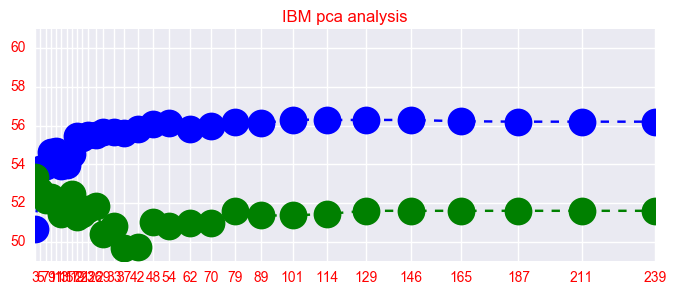

BK n_components 3 accuracy train 51.99 accuracy test 48.45
BK n_components 5 accuracy train 52.87 accuracy test 46.95
BK n_components 7 accuracy train 53.47 accuracy test 48.36
BK n_components 9 accuracy train 54.43 accuracy test 53.52
BK n_components 11 accuracy train 54.54 accuracy test 52.96
BK n_components 13 accuracy train 55.23 accuracy test 52.11
BK n_components 15 accuracy train 55.34 accuracy test 52.77
BK n_components 17 accuracy train 55.34 accuracy test 52.68
BK n_components 19 accuracy train 55.94 accuracy test 52.3
BK n_components 21 accuracy train 56.19 accuracy test 53.99
BK n_components 23 accuracy train 55.94 accuracy test 52.49
BK n_components 26 accuracy train 56.46 accuracy test 53.05
BK n_components 29 accuracy train 56.38 accuracy test 52.77
BK n_components 33 accuracy train 56.52 accuracy test 52.02
BK n_components 37 accuracy train 56.65 accuracy test 51.64
BK n_components 42 accuracy train 56.84 accuracy test 51.74
BK n_components 48 accuracy train 56.82 accur

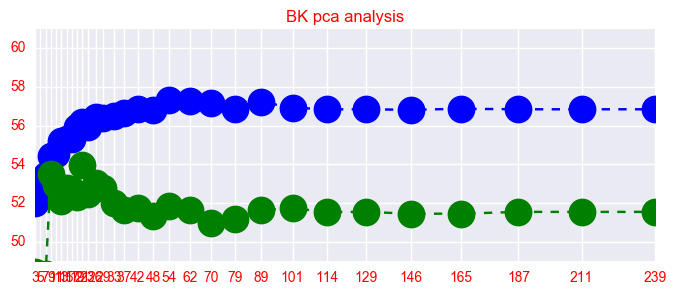

done 80%
NFX n_components 3 accuracy train 51.27 accuracy test 53.16
NFX n_components 5 accuracy train 51.97 accuracy test 52.86
NFX n_components 7 accuracy train 51.67 accuracy test 52.37
NFX n_components 9 accuracy train 52.63 accuracy test 51.08
NFX n_components 11 accuracy train 52.98 accuracy test 50.79
NFX n_components 13 accuracy train 52.78 accuracy test 50.49
NFX n_components 15 accuracy train 53.97 accuracy test 53.45
NFX n_components 17 accuracy train 53.87 accuracy test 52.37
NFX n_components 19 accuracy train 53.95 accuracy test 53.16
NFX n_components 21 accuracy train 55.01 accuracy test 52.56
NFX n_components 23 accuracy train 54.88 accuracy test 53.06
NFX n_components 26 accuracy train 55.03 accuracy test 53.45
NFX n_components 29 accuracy train 55.13 accuracy test 52.66
NFX n_components 33 accuracy train 55.5 accuracy test 52.86
NFX n_components 37 accuracy train 56.37 accuracy test 51.68
NFX n_components 42 accuracy train 56.57 accuracy test 52.76
NFX n_components 48 

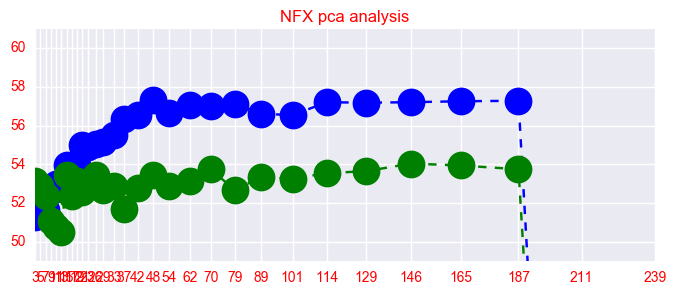

AGN n_components 3 accuracy train 53.36 accuracy test 51.03
AGN n_components 5 accuracy train 55.32 accuracy test 52.46
AGN n_components 7 accuracy train 55.39 accuracy test 53.1
AGN n_components 9 accuracy train 56.04 accuracy test 52.67
AGN n_components 11 accuracy train 56.12 accuracy test 52.25
AGN n_components 13 accuracy train 56.2 accuracy test 53.1
AGN n_components 15 accuracy train 55.42 accuracy test 52.89
AGN n_components 17 accuracy train 56.17 accuracy test 53.03
AGN n_components 19 accuracy train 56.22 accuracy test 52.6
AGN n_components 21 accuracy train 56.42 accuracy test 51.6
AGN n_components 23 accuracy train 57.18 accuracy test 51.39
AGN n_components 26 accuracy train 57.02 accuracy test 52.32
AGN n_components 29 accuracy train 56.42 accuracy test 52.6
AGN n_components 33 accuracy train 56.57 accuracy test 52.74
AGN n_components 37 accuracy train 56.9 accuracy test 52.32
AGN n_components 42 accuracy train 56.97 accuracy test 52.32
AGN n_components 48 accuracy train 

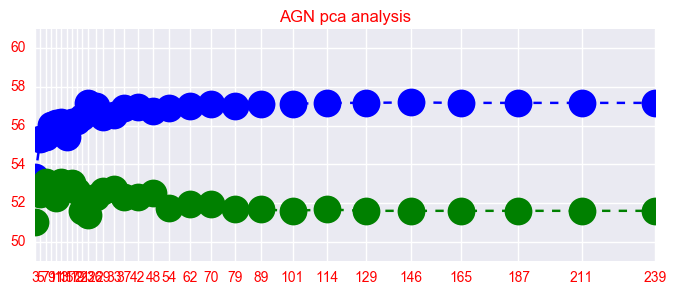

LRCX n_components 3 accuracy train 51.75 accuracy test 52.72
LRCX n_components 5 accuracy train 52.4 accuracy test 51.12
LRCX n_components 7 accuracy train 53.28 accuracy test 51.44
LRCX n_components 9 accuracy train 52.91 accuracy test 51.04
LRCX n_components 11 accuracy train 53.56 accuracy test 49.12
LRCX n_components 13 accuracy train 53.51 accuracy test 51.04
LRCX n_components 15 accuracy train 53.93 accuracy test 50.8
LRCX n_components 17 accuracy train 54.76 accuracy test 50.24
LRCX n_components 19 accuracy train 54.67 accuracy test 50.0
LRCX n_components 21 accuracy train 55.34 accuracy test 50.72
LRCX n_components 23 accuracy train 55.29 accuracy test 51.6
LRCX n_components 26 accuracy train 55.8 accuracy test 51.28
LRCX n_components 29 accuracy train 55.73 accuracy test 50.64
LRCX n_components 33 accuracy train 56.01 accuracy test 52.88
LRCX n_components 37 accuracy train 56.4 accuracy test 52.08
LRCX n_components 42 accuracy train 55.66 accuracy test 51.36
LRCX n_components 

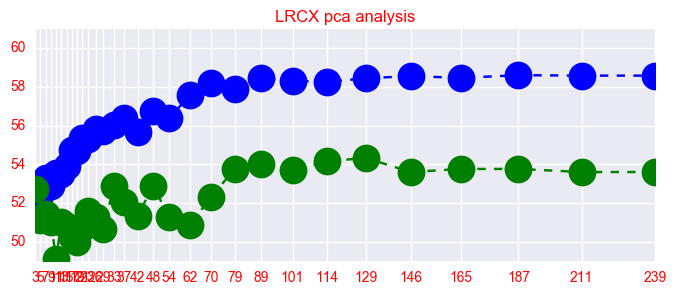

DIS n_components 3 accuracy train 52.95 accuracy test 53.22
DIS n_components 5 accuracy train 52.6 accuracy test 52.25
DIS n_components 7 accuracy train 52.51 accuracy test 51.01
DIS n_components 9 accuracy train 52.65 accuracy test 51.98
DIS n_components 11 accuracy train 52.24 accuracy test 50.66
DIS n_components 13 accuracy train 53.79 accuracy test 51.37
DIS n_components 15 accuracy train 55.09 accuracy test 51.45
DIS n_components 17 accuracy train 55.46 accuracy test 51.28
DIS n_components 19 accuracy train 55.28 accuracy test 50.66
DIS n_components 21 accuracy train 55.0 accuracy test 49.96
DIS n_components 23 accuracy train 55.19 accuracy test 50.31
DIS n_components 26 accuracy train 54.82 accuracy test 51.37
DIS n_components 29 accuracy train 55.44 accuracy test 50.84
DIS n_components 33 accuracy train 55.66 accuracy test 51.37
DIS n_components 37 accuracy train 55.92 accuracy test 50.93
DIS n_components 42 accuracy train 55.73 accuracy test 51.19
DIS n_components 48 accuracy t

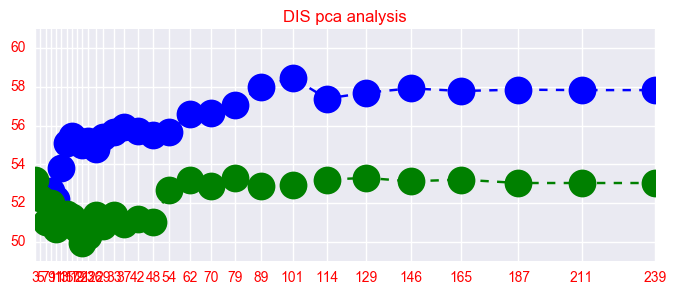

LH n_components 3 accuracy train 52.16 accuracy test 51.68
LH n_components 5 accuracy train 52.86 accuracy test 53.15
LH n_components 7 accuracy train 53.21 accuracy test 53.56
LH n_components 9 accuracy train 54.03 accuracy test 52.58
LH n_components 11 accuracy train 53.97 accuracy test 53.39
LH n_components 13 accuracy train 54.21 accuracy test 53.07
LH n_components 15 accuracy train 55.26 accuracy test 53.56
LH n_components 17 accuracy train 55.01 accuracy test 53.56
LH n_components 19 accuracy train 55.3 accuracy test 53.56
LH n_components 21 accuracy train 55.48 accuracy test 53.72
LH n_components 23 accuracy train 55.99 accuracy test 54.37
LH n_components 26 accuracy train 56.34 accuracy test 54.46
LH n_components 29 accuracy train 55.75 accuracy test 55.44
LH n_components 33 accuracy train 55.99 accuracy test 53.8
LH n_components 37 accuracy train 56.3 accuracy test 55.03
LH n_components 42 accuracy train 56.88 accuracy test 54.7
LH n_components 48 accuracy train 57.08 accuracy

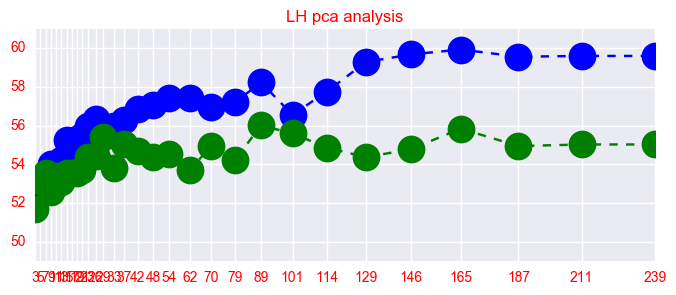

C n_components 3 accuracy train 52.66 accuracy test 49.29
C n_components 5 accuracy train 53.42 accuracy test 50.26
C n_components 7 accuracy train 52.68 accuracy test 51.06
C n_components 9 accuracy train 52.96 accuracy test 50.53
C n_components 11 accuracy train 52.8 accuracy test 51.94
C n_components 13 accuracy train 53.05 accuracy test 52.2
C n_components 15 accuracy train 52.8 accuracy test 51.59
C n_components 17 accuracy train 52.89 accuracy test 52.38
C n_components 19 accuracy train 52.87 accuracy test 51.68
C n_components 21 accuracy train 53.01 accuracy test 51.5
C n_components 23 accuracy train 52.87 accuracy test 51.15
C n_components 26 accuracy train 53.17 accuracy test 50.88
C n_components 29 accuracy train 55.03 accuracy test 48.94
C n_components 33 accuracy train 54.66 accuracy test 48.77
C n_components 37 accuracy train 54.85 accuracy test 48.5
C n_components 42 accuracy train 55.59 accuracy test 48.41
C n_components 48 accuracy train 55.92 accuracy test 50.35
C n_co

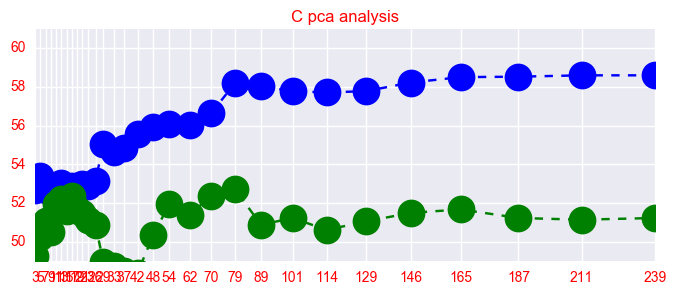

done 100%
MNK n_components 3 accuracy train 53.81 accuracy test 53.48
MNK n_components 5 accuracy train 54.16 accuracy test 52.49
MNK n_components 7 accuracy train 54.01 accuracy test 53.15
MNK n_components 9 accuracy train 54.24 accuracy test 53.62
MNK n_components 11 accuracy train 54.13 accuracy test 53.48
MNK n_components 13 accuracy train 54.1 accuracy test 53.95
MNK n_components 15 accuracy train 54.51 accuracy test 53.95
MNK n_components 17 accuracy train 54.77 accuracy test 53.42
MNK n_components 19 accuracy train 55.79 accuracy test 52.42
MNK n_components 21 accuracy train 56.26 accuracy test 51.63
MNK n_components 23 accuracy train 55.0 accuracy test 53.22
MNK n_components 26 accuracy train 56.11 accuracy test 52.42
MNK n_components 29 accuracy train 55.56 accuracy test 53.22
MNK n_components 33 accuracy train 55.76 accuracy test 53.15
MNK n_components 37 accuracy train 56.28 accuracy test 52.95
MNK n_components 42 accuracy train 56.08 accuracy test 52.95
MNK n_components 48 

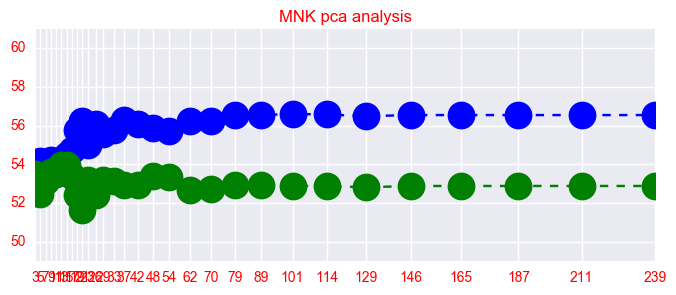

In [34]:
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_pca3, acc_test_pca3 = clf_portfolio_dic.getModelPCA(clf, features_1p4_extra, n_components_vec_1p4_extra)

In [35]:
experiment7 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with PCA - 1.4extra",
    stocks=stocks, originalFeatures=features_1p4_extra)

In [36]:
experiment7.setTrainResults(acc_train_pca3)
experiment7.setTestResults(acc_test_pca3)
print("The test accuracy (mean - std) is:")
print(experiment7.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 49.30427902  48.95568686  49.67297491  49.65125389  49.98474845
  49.81437544  50.34854765  50.13314303  49.72737599  49.81642386
  49.94795989  50.25796054  49.79284085  49.72295291  49.67964885
  49.7681816   49.94420028  49.98814715  49.99739893  49.89926608
  50.06823771  49.93193361  49.96925891  49.97030975  49.97921975
  49.97670197  49.70892602  49.96176699  40.47880251  40.48402137]


In [37]:
a1 = np.arange(3, len(features_1p4_extra_second_order)+1, 2)
a2 = np.logspace(1, math.log(len(features_1p4_extra_second_order),2), num=40, base=2).astype('int32')
n_components_vec_1p4_extra_second_order = np.concatenate((a1[:11],a2[15:]),axis=0)

DNB n_components 3 accuracy train 50.28 accuracy test 49.58
DNB n_components 5 accuracy train 50.08 accuracy test 48.83
DNB n_components 7 accuracy train 50.44 accuracy test 49.68
DNB n_components 9 accuracy train 51.6 accuracy test 50.72
DNB n_components 11 accuracy train 51.45 accuracy test 50.17
DNB n_components 13 accuracy train 51.96 accuracy test 50.47
DNB n_components 15 accuracy train 51.97 accuracy test 50.12
DNB n_components 17 accuracy train 51.64 accuracy test 49.78
DNB n_components 19 accuracy train 51.52 accuracy test 49.73
DNB n_components 21 accuracy train 51.89 accuracy test 49.88
DNB n_components 23 accuracy train 51.74 accuracy test 49.23
DNB n_components 19 accuracy train 51.54 accuracy test 49.83
DNB n_components 22 accuracy train 51.79 accuracy test 49.48
DNB n_components 25 accuracy train 51.57 accuracy test 50.07
DNB n_components 29 accuracy train 51.75 accuracy test 49.03
DNB n_components 34 accuracy train 51.6 accuracy test 48.78
DNB n_components 40 accuracy t

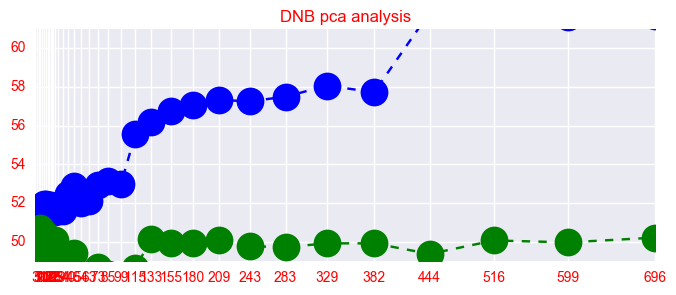

NRG n_components 3 accuracy train 53.87 accuracy test 54.43
NRG n_components 5 accuracy train 54.13 accuracy test 54.63
NRG n_components 7 accuracy train 54.47 accuracy test 54.82
NRG n_components 9 accuracy train 54.68 accuracy test 54.63
NRG n_components 11 accuracy train 54.7 accuracy test 54.72
NRG n_components 13 accuracy train 54.63 accuracy test 54.53
NRG n_components 15 accuracy train 54.75 accuracy test 54.72
NRG n_components 17 accuracy train 54.7 accuracy test 54.72
NRG n_components 19 accuracy train 54.61 accuracy test 54.24
NRG n_components 21 accuracy train 54.73 accuracy test 54.43
NRG n_components 23 accuracy train 54.7 accuracy test 54.72
NRG n_components 19 accuracy train 54.61 accuracy test 54.24
NRG n_components 22 accuracy train 54.47 accuracy test 54.24
NRG n_components 25 accuracy train 54.8 accuracy test 54.72
NRG n_components 29 accuracy train 54.86 accuracy test 54.33
NRG n_components 34 accuracy train 55.21 accuracy test 54.63
NRG n_components 40 accuracy tra

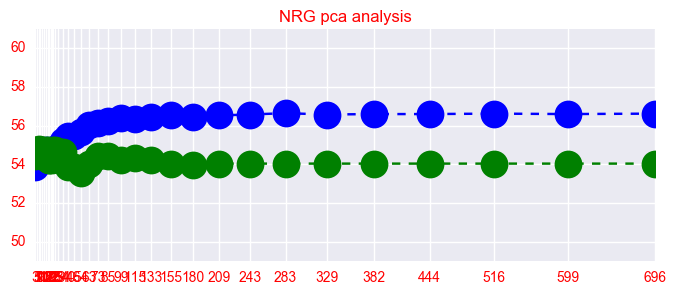

CL n_components 3 accuracy train 49.61 accuracy test 48.73
CL n_components 5 accuracy train 49.17 accuracy test 50.0
CL n_components 7 accuracy train 50.93 accuracy test 49.64
CL n_components 9 accuracy train 50.76 accuracy test 48.92
CL n_components 11 accuracy train 50.25 accuracy test 48.92
CL n_components 13 accuracy train 51.27 accuracy test 49.37
CL n_components 15 accuracy train 51.89 accuracy test 50.09
CL n_components 17 accuracy train 52.03 accuracy test 49.55
CL n_components 19 accuracy train 52.21 accuracy test 50.81
CL n_components 21 accuracy train 52.65 accuracy test 51.18
CL n_components 23 accuracy train 51.99 accuracy test 52.17
CL n_components 19 accuracy train 52.23 accuracy test 51.63
CL n_components 22 accuracy train 52.35 accuracy test 51.27
CL n_components 25 accuracy train 52.82 accuracy test 51.72
CL n_components 29 accuracy train 51.86 accuracy test 51.99
CL n_components 34 accuracy train 52.77 accuracy test 50.45
CL n_components 40 accuracy train 52.5 accura

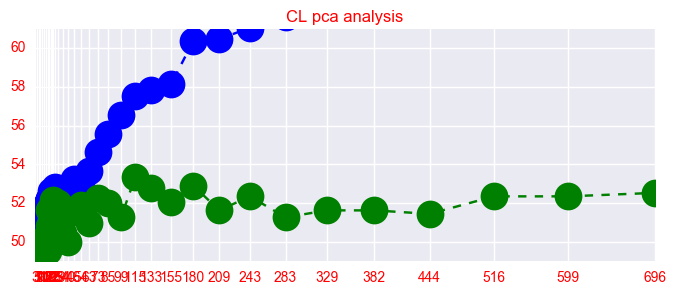

ANTM n_components 3 accuracy train 52.65 accuracy test 46.88
ANTM n_components 5 accuracy train 52.73 accuracy test 46.57
ANTM n_components 7 accuracy train 52.91 accuracy test 46.57
ANTM n_components 9 accuracy train 53.6 accuracy test 47.59
ANTM n_components 11 accuracy train 54.12 accuracy test 47.75
ANTM n_components 13 accuracy train 53.77 accuracy test 47.28
ANTM n_components 15 accuracy train 53.34 accuracy test 47.28
ANTM n_components 17 accuracy train 53.86 accuracy test 47.2
ANTM n_components 19 accuracy train 54.73 accuracy test 48.15
ANTM n_components 21 accuracy train 54.73 accuracy test 48.46
ANTM n_components 23 accuracy train 54.03 accuracy test 49.01
ANTM n_components 19 accuracy train 54.73 accuracy test 48.15
ANTM n_components 22 accuracy train 54.12 accuracy test 47.91
ANTM n_components 25 accuracy train 54.55 accuracy test 49.41
ANTM n_components 29 accuracy train 54.47 accuracy test 48.78
ANTM n_components 34 accuracy train 54.64 accuracy test 49.09
ANTM n_compone

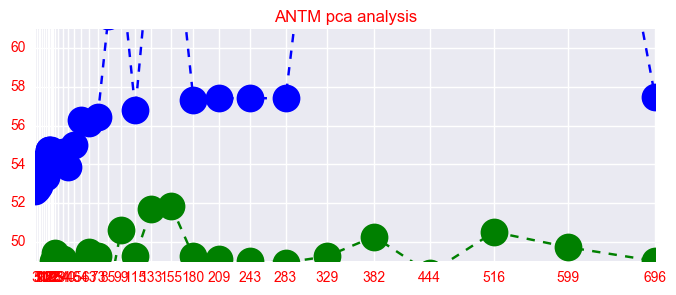

NEE n_components 3 accuracy train 52.92 accuracy test 48.1
NEE n_components 5 accuracy train 52.89 accuracy test 48.0
NEE n_components 7 accuracy train 53.51 accuracy test 48.76
NEE n_components 9 accuracy train 53.46 accuracy test 49.43
NEE n_components 11 accuracy train 54.1 accuracy test 48.57
NEE n_components 13 accuracy train 53.94 accuracy test 48.48
NEE n_components 15 accuracy train 54.32 accuracy test 49.05
NEE n_components 17 accuracy train 54.24 accuracy test 49.43
NEE n_components 19 accuracy train 54.48 accuracy test 48.95
NEE n_components 21 accuracy train 54.37 accuracy test 49.05
NEE n_components 23 accuracy train 54.4 accuracy test 49.14
NEE n_components 19 accuracy train 54.48 accuracy test 48.95
NEE n_components 22 accuracy train 54.43 accuracy test 49.05
NEE n_components 25 accuracy train 54.27 accuracy test 49.24
NEE n_components 29 accuracy train 54.8 accuracy test 48.1
NEE n_components 34 accuracy train 54.56 accuracy test 48.86
NEE n_components 40 accuracy train

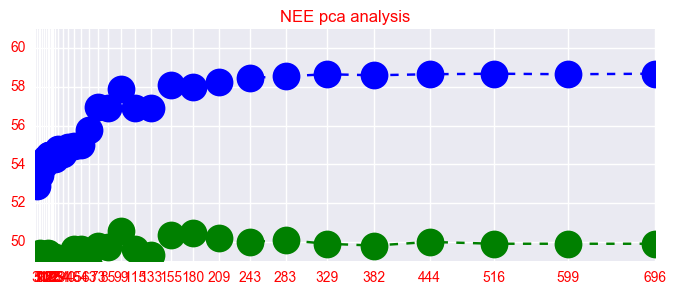

done 20%
PAYX n_components 3 accuracy train 50.43 accuracy test 51.21
PAYX n_components 5 accuracy train 50.62 accuracy test 51.62
PAYX n_components 7 accuracy train 51.85 accuracy test 51.13
PAYX n_components 9 accuracy train 52.32 accuracy test 51.37
PAYX n_components 11 accuracy train 51.38 accuracy test 50.0
PAYX n_components 13 accuracy train 51.9 accuracy test 50.16
PAYX n_components 15 accuracy train 52.01 accuracy test 50.0
PAYX n_components 17 accuracy train 51.76 accuracy test 50.32
PAYX n_components 19 accuracy train 51.64 accuracy test 50.32
PAYX n_components 21 accuracy train 51.04 accuracy test 50.16
PAYX n_components 23 accuracy train 52.18 accuracy test 50.81
PAYX n_components 19 accuracy train 51.64 accuracy test 50.32
PAYX n_components 22 accuracy train 51.25 accuracy test 49.52
PAYX n_components 25 accuracy train 51.5 accuracy test 51.05
PAYX n_components 29 accuracy train 52.59 accuracy test 50.81
PAYX n_components 34 accuracy train 52.73 accuracy test 52.18
PAYX n_

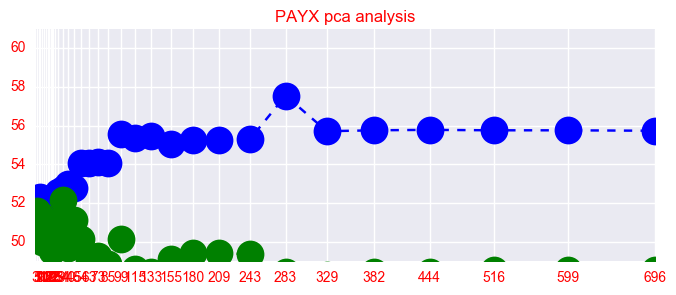

VAR n_components 3 accuracy train 51.49 accuracy test 49.57
VAR n_components 5 accuracy train 51.49 accuracy test 49.57
VAR n_components 7 accuracy train 51.34 accuracy test 49.36
VAR n_components 9 accuracy train 51.36 accuracy test 49.14
VAR n_components 11 accuracy train 51.02 accuracy test 50.29
VAR n_components 13 accuracy train 51.25 accuracy test 51.22
VAR n_components 15 accuracy train 51.64 accuracy test 51.29
VAR n_components 17 accuracy train 51.59 accuracy test 51.43
VAR n_components 19 accuracy train 51.79 accuracy test 51.93
VAR n_components 21 accuracy train 51.12 accuracy test 52.29
VAR n_components 23 accuracy train 51.7 accuracy test 52.01
VAR n_components 19 accuracy train 51.79 accuracy test 51.93
VAR n_components 22 accuracy train 51.36 accuracy test 52.22
VAR n_components 25 accuracy train 51.49 accuracy test 51.72
VAR n_components 29 accuracy train 51.77 accuracy test 51.36
VAR n_components 34 accuracy train 51.87 accuracy test 51.43
VAR n_components 40 accuracy 

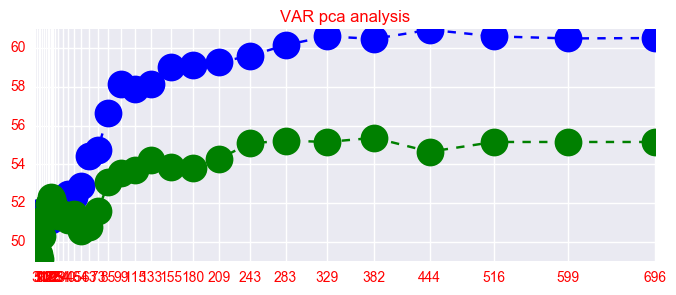

NI n_components 3 accuracy train 52.6 accuracy test 48.16
NI n_components 5 accuracy train 52.57 accuracy test 48.46
NI n_components 7 accuracy train 52.55 accuracy test 47.95
NI n_components 9 accuracy train 52.8 accuracy test 47.64
NI n_components 11 accuracy train 52.67 accuracy test 47.54
NI n_components 13 accuracy train 52.9 accuracy test 48.87
NI n_components 15 accuracy train 52.8 accuracy test 49.49
NI n_components 17 accuracy train 53.27 accuracy test 48.46
NI n_components 19 accuracy train 53.45 accuracy test 48.77
NI n_components 21 accuracy train 53.57 accuracy test 48.77
NI n_components 23 accuracy train 53.35 accuracy test 48.77
NI n_components 19 accuracy train 53.45 accuracy test 48.77
NI n_components 22 accuracy train 53.47 accuracy test 48.67
NI n_components 25 accuracy train 53.55 accuracy test 48.26
NI n_components 29 accuracy train 53.77 accuracy test 48.46
NI n_components 34 accuracy train 53.52 accuracy test 49.59
NI n_components 40 accuracy train 54.2 accuracy 

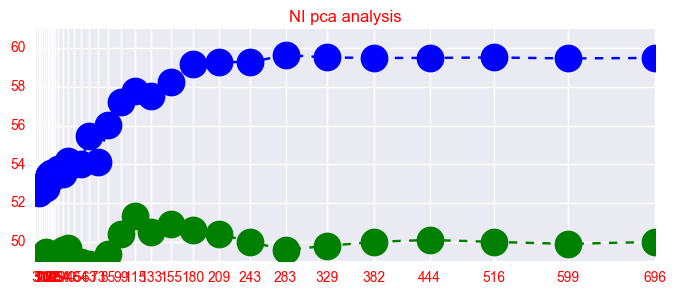

MNST n_components 3 accuracy train 52.27 accuracy test 49.0
MNST n_components 5 accuracy train 52.27 accuracy test 49.3
MNST n_components 7 accuracy train 51.74 accuracy test 49.82
MNST n_components 9 accuracy train 51.79 accuracy test 49.52
MNST n_components 11 accuracy train 52.89 accuracy test 49.96
MNST n_components 13 accuracy train 53.4 accuracy test 51.15
MNST n_components 15 accuracy train 53.42 accuracy test 51.59
MNST n_components 17 accuracy train 53.58 accuracy test 51.81
MNST n_components 19 accuracy train 53.25 accuracy test 50.92
MNST n_components 21 accuracy train 53.4 accuracy test 51.22
MNST n_components 23 accuracy train 53.46 accuracy test 50.85
MNST n_components 19 accuracy train 53.25 accuracy test 50.92
MNST n_components 22 accuracy train 53.71 accuracy test 51.44
MNST n_components 25 accuracy train 53.27 accuracy test 50.78
MNST n_components 29 accuracy train 53.6 accuracy test 49.96
MNST n_components 34 accuracy train 53.5 accuracy test 49.96
MNST n_components 

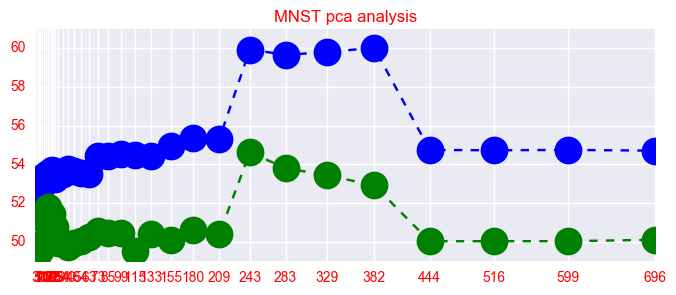

JNJ n_components 3 accuracy train 52.36 accuracy test 51.33
JNJ n_components 5 accuracy train 52.07 accuracy test 50.62
JNJ n_components 7 accuracy train 52.14 accuracy test 51.95
JNJ n_components 9 accuracy train 52.05 accuracy test 50.7
JNJ n_components 11 accuracy train 52.94 accuracy test 49.92
JNJ n_components 13 accuracy train 53.23 accuracy test 49.14
JNJ n_components 15 accuracy train 52.41 accuracy test 49.45
JNJ n_components 17 accuracy train 52.96 accuracy test 49.22
JNJ n_components 19 accuracy train 53.12 accuracy test 49.3
JNJ n_components 21 accuracy train 54.11 accuracy test 47.19
JNJ n_components 23 accuracy train 53.6 accuracy test 47.58
JNJ n_components 19 accuracy train 53.12 accuracy test 49.45
JNJ n_components 22 accuracy train 53.91 accuracy test 47.04
JNJ n_components 25 accuracy train 53.45 accuracy test 47.97
JNJ n_components 29 accuracy train 53.91 accuracy test 50.31
JNJ n_components 34 accuracy train 53.56 accuracy test 49.22
JNJ n_components 40 accuracy tr

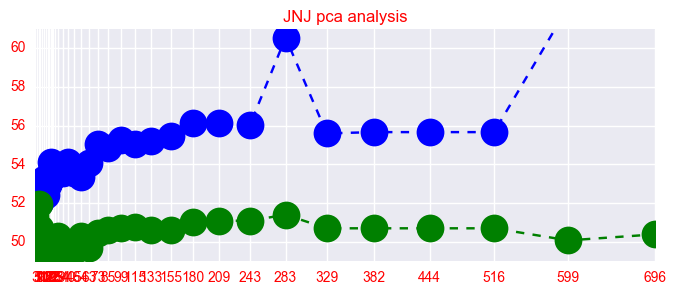

TGNA n_components 3 accuracy train 54.1 accuracy test 48.27
TGNA n_components 5 accuracy train 53.52 accuracy test 47.96
TGNA n_components 7 accuracy train 54.88 accuracy test 48.19
TGNA n_components 9 accuracy train 55.47 accuracy test 48.74
TGNA n_components 11 accuracy train 57.62 accuracy test 48.82
TGNA n_components 13 accuracy train 54.88 accuracy test 48.67
TGNA n_components 15 accuracy train 57.23 accuracy test 49.06
TGNA n_components 17 accuracy train 58.4 accuracy test 49.76
TGNA n_components 19 accuracy train 59.96 accuracy test 50.86
TGNA n_components 21 accuracy train 59.18 accuracy test 49.53
TGNA n_components 23 accuracy train 58.4 accuracy test 49.37
TGNA n_components 19 accuracy train 59.96 accuracy test 50.86
TGNA n_components 22 accuracy train 58.01 accuracy test 49.69
TGNA n_components 25 accuracy train 58.98 accuracy test 49.69
TGNA n_components 29 accuracy train 58.4 accuracy test 50.55
TGNA n_components 34 accuracy train 60.94 accuracy test 49.92
TGNA n_component

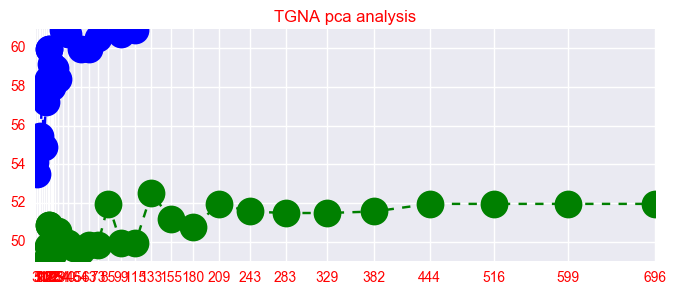

done 40%
NOV n_components 3 accuracy train 51.09 accuracy test 52.1
NOV n_components 5 accuracy train 51.35 accuracy test 51.62
NOV n_components 7 accuracy train 51.24 accuracy test 50.0
NOV n_components 9 accuracy train 51.79 accuracy test 50.32
NOV n_components 11 accuracy train 52.32 accuracy test 51.86
NOV n_components 13 accuracy train 52.0 accuracy test 51.38
NOV n_components 15 accuracy train 51.69 accuracy test 50.97
NOV n_components 17 accuracy train 52.11 accuracy test 51.38
NOV n_components 19 accuracy train 52.29 accuracy test 51.46
NOV n_components 21 accuracy train 53.65 accuracy test 51.21
NOV n_components 23 accuracy train 53.16 accuracy test 51.94
NOV n_components 19 accuracy train 52.29 accuracy test 51.46
NOV n_components 22 accuracy train 53.29 accuracy test 50.81
NOV n_components 25 accuracy train 53.16 accuracy test 50.97
NOV n_components 29 accuracy train 53.1 accuracy test 50.08
NOV n_components 34 accuracy train 52.97 accuracy test 51.46
NOV n_components 40 acc

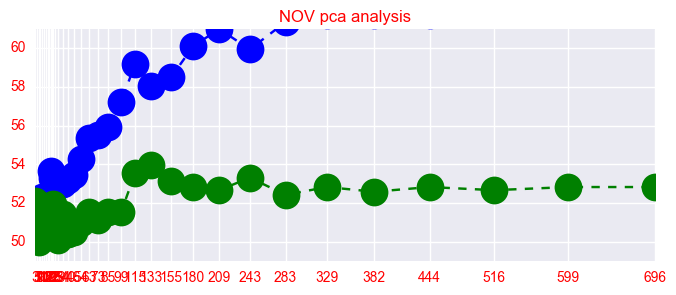

FIS n_components 3 accuracy train 51.31 accuracy test 46.54
FIS n_components 5 accuracy train 50.56 accuracy test 46.83
FIS n_components 7 accuracy train 50.71 accuracy test 50.55
FIS n_components 9 accuracy train 49.99 accuracy test 48.43
FIS n_components 11 accuracy train 49.82 accuracy test 49.31
FIS n_components 13 accuracy train 49.63 accuracy test 47.92
FIS n_components 15 accuracy train 49.82 accuracy test 48.51
FIS n_components 17 accuracy train 50.61 accuracy test 49.31
FIS n_components 19 accuracy train 50.99 accuracy test 48.43
FIS n_components 21 accuracy train 51.14 accuracy test 48.43
FIS n_components 23 accuracy train 51.2 accuracy test 49.6
FIS n_components 19 accuracy train 50.99 accuracy test 48.43
FIS n_components 22 accuracy train 51.37 accuracy test 49.16
FIS n_components 25 accuracy train 51.33 accuracy test 48.0
FIS n_components 29 accuracy train 51.05 accuracy test 49.6
FIS n_components 34 accuracy train 52.03 accuracy test 48.94
FIS n_components 40 accuracy tra

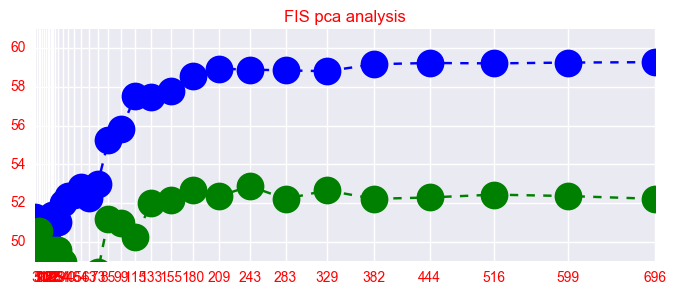

BLK n_components 3 accuracy train 49.29 accuracy test 49.1
BLK n_components 5 accuracy train 49.67 accuracy test 48.67
BLK n_components 7 accuracy train 50.1 accuracy test 46.44
BLK n_components 9 accuracy train 49.19 accuracy test 46.79
BLK n_components 11 accuracy train 50.78 accuracy test 47.9
BLK n_components 13 accuracy train 50.62 accuracy test 49.61
BLK n_components 15 accuracy train 50.47 accuracy test 49.19
BLK n_components 17 accuracy train 50.22 accuracy test 50.04
BLK n_components 19 accuracy train 50.03 accuracy test 48.67
BLK n_components 21 accuracy train 50.31 accuracy test 49.87
BLK n_components 23 accuracy train 50.33 accuracy test 49.1
BLK n_components 19 accuracy train 50.03 accuracy test 48.67
BLK n_components 22 accuracy train 50.15 accuracy test 49.87
BLK n_components 25 accuracy train 50.78 accuracy test 49.44
BLK n_components 29 accuracy train 51.65 accuracy test 48.24
BLK n_components 34 accuracy train 51.49 accuracy test 49.61
BLK n_components 40 accuracy tra

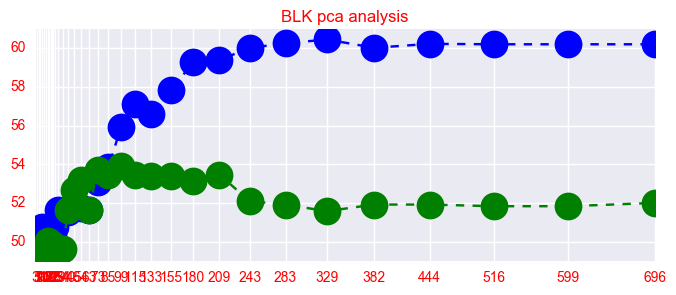

HBI n_components 3 accuracy train 51.53 accuracy test 51.55
HBI n_components 5 accuracy train 52.08 accuracy test 51.76
HBI n_components 7 accuracy train 52.04 accuracy test 51.21
HBI n_components 9 accuracy train 51.45 accuracy test 50.86
HBI n_components 11 accuracy train 51.45 accuracy test 51.69
HBI n_components 13 accuracy train 51.62 accuracy test 51.14
HBI n_components 15 accuracy train 51.83 accuracy test 53.07
HBI n_components 17 accuracy train 52.59 accuracy test 52.93
HBI n_components 19 accuracy train 52.46 accuracy test 51.62
HBI n_components 21 accuracy train 52.38 accuracy test 51.21
HBI n_components 23 accuracy train 52.55 accuracy test 51.35
HBI n_components 19 accuracy train 52.46 accuracy test 51.62
HBI n_components 22 accuracy train 52.51 accuracy test 51.48
HBI n_components 25 accuracy train 52.99 accuracy test 50.86
HBI n_components 29 accuracy train 53.35 accuracy test 51.55
HBI n_components 34 accuracy train 53.76 accuracy test 50.86
HBI n_components 40 accuracy

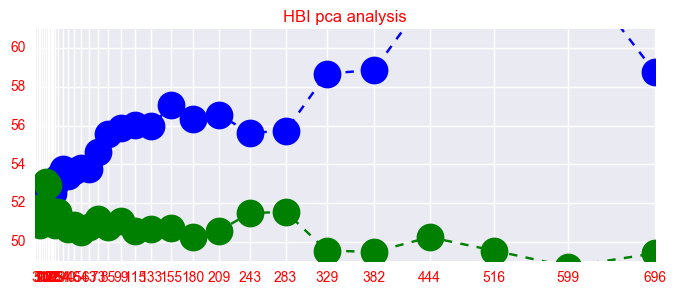

NVDA n_components 3 accuracy train 51.21 accuracy test 49.82
NVDA n_components 5 accuracy train 51.34 accuracy test 49.54
NVDA n_components 7 accuracy train 51.06 accuracy test 49.25
NVDA n_components 9 accuracy train 51.39 accuracy test 49.96
NVDA n_components 11 accuracy train 51.5 accuracy test 50.46
NVDA n_components 13 accuracy train 51.34 accuracy test 50.54
NVDA n_components 15 accuracy train 51.52 accuracy test 49.18
NVDA n_components 17 accuracy train 51.44 accuracy test 48.97
NVDA n_components 19 accuracy train 51.93 accuracy test 48.11
NVDA n_components 21 accuracy train 51.83 accuracy test 47.97
NVDA n_components 23 accuracy train 51.93 accuracy test 48.39
NVDA n_components 19 accuracy train 51.96 accuracy test 48.18
NVDA n_components 22 accuracy train 51.83 accuracy test 49.11
NVDA n_components 25 accuracy train 51.83 accuracy test 50.32
NVDA n_components 29 accuracy train 52.14 accuracy test 50.61
NVDA n_components 34 accuracy train 52.24 accuracy test 50.39
NVDA n_compon

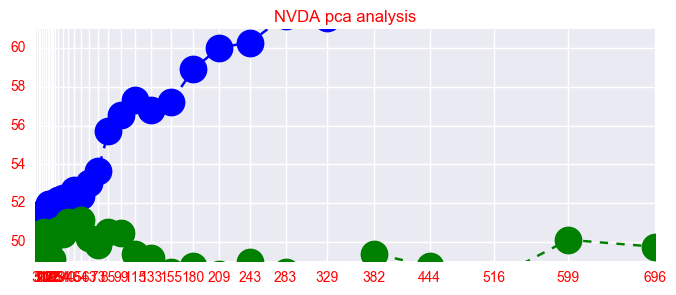

DLTR n_components 3 accuracy train 50.34 accuracy test 46.51
DLTR n_components 5 accuracy train 51.71 accuracy test 50.62
DLTR n_components 7 accuracy train 50.36 accuracy test 49.55
DLTR n_components 9 accuracy train 51.67 accuracy test 47.5
DLTR n_components 11 accuracy train 51.46 accuracy test 47.17
DLTR n_components 13 accuracy train 51.48 accuracy test 48.4
DLTR n_components 15 accuracy train 50.93 accuracy test 47.99
DLTR n_components 17 accuracy train 51.19 accuracy test 48.73
DLTR n_components 19 accuracy train 50.91 accuracy test 49.55
DLTR n_components 21 accuracy train 51.06 accuracy test 49.71
DLTR n_components 23 accuracy train 51.38 accuracy test 48.81
DLTR n_components 19 accuracy train 50.91 accuracy test 49.55
DLTR n_components 22 accuracy train 51.14 accuracy test 49.47
DLTR n_components 25 accuracy train 52.58 accuracy test 47.83
DLTR n_components 29 accuracy train 51.71 accuracy test 47.66
DLTR n_components 34 accuracy train 51.5 accuracy test 47.91
DLTR n_componen

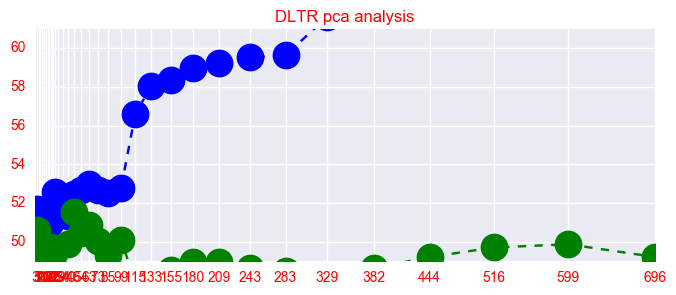

done 60%
MRO n_components 3 accuracy train 50.46 accuracy test 50.2
MRO n_components 5 accuracy train 51.15 accuracy test 50.61
MRO n_components 7 accuracy train 49.59 accuracy test 49.29
MRO n_components 9 accuracy train 50.09 accuracy test 47.97
MRO n_components 11 accuracy train 50.25 accuracy test 47.26
MRO n_components 13 accuracy train 49.96 accuracy test 47.46
MRO n_components 15 accuracy train 48.64 accuracy test 49.59
MRO n_components 17 accuracy train 49.22 accuracy test 50.0
MRO n_components 19 accuracy train 51.6 accuracy test 51.22
MRO n_components 21 accuracy train 51.65 accuracy test 50.51
MRO n_components 23 accuracy train 52.16 accuracy test 48.98
MRO n_components 19 accuracy train 51.5 accuracy test 51.02
MRO n_components 22 accuracy train 52.05 accuracy test 49.19
MRO n_components 25 accuracy train 52.02 accuracy test 51.73
MRO n_components 29 accuracy train 51.94 accuracy test 50.71
MRO n_components 34 accuracy train 52.77 accuracy test 50.51
MRO n_components 40 acc

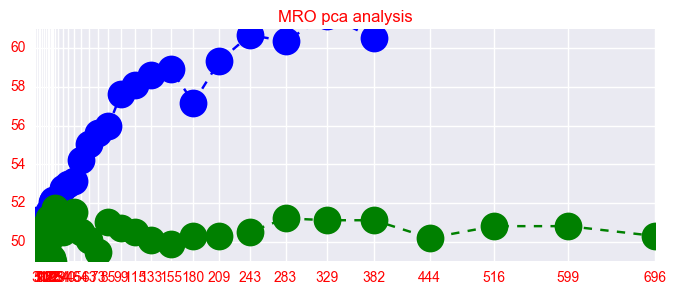

EMN n_components 3 accuracy train 50.77 accuracy test 49.95
EMN n_components 5 accuracy train 51.7 accuracy test 50.6
EMN n_components 7 accuracy train 51.27 accuracy test 50.05
EMN n_components 9 accuracy train 51.12 accuracy test 49.13
EMN n_components 11 accuracy train 51.29 accuracy test 49.77
EMN n_components 13 accuracy train 51.15 accuracy test 47.94
EMN n_components 15 accuracy train 51.41 accuracy test 48.12
EMN n_components 17 accuracy train 52.11 accuracy test 48.58
EMN n_components 19 accuracy train 51.94 accuracy test 47.48
EMN n_components 21 accuracy train 51.39 accuracy test 47.39
EMN n_components 23 accuracy train 51.89 accuracy test 47.02
EMN n_components 19 accuracy train 51.94 accuracy test 47.48
EMN n_components 22 accuracy train 51.51 accuracy test 47.11
EMN n_components 25 accuracy train 51.77 accuracy test 47.85
EMN n_components 29 accuracy train 52.22 accuracy test 48.12
EMN n_components 34 accuracy train 52.58 accuracy test 48.85
EMN n_components 40 accuracy t

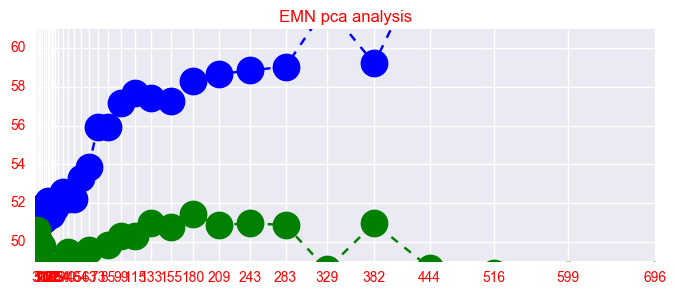

AMT n_components 3 accuracy train 51.71 accuracy test 52.12
AMT n_components 5 accuracy train 51.76 accuracy test 51.96
AMT n_components 7 accuracy train 51.68 accuracy test 52.21
AMT n_components 9 accuracy train 51.71 accuracy test 51.87
AMT n_components 11 accuracy train 52.03 accuracy test 51.29
AMT n_components 13 accuracy train 51.43 accuracy test 50.21
AMT n_components 15 accuracy train 51.36 accuracy test 50.12
AMT n_components 17 accuracy train 51.21 accuracy test 49.63
AMT n_components 19 accuracy train 52.08 accuracy test 50.37
AMT n_components 21 accuracy train 51.88 accuracy test 50.79
AMT n_components 23 accuracy train 51.43 accuracy test 50.96
AMT n_components 19 accuracy train 52.08 accuracy test 50.37
AMT n_components 22 accuracy train 51.43 accuracy test 50.96
AMT n_components 25 accuracy train 51.53 accuracy test 51.04
AMT n_components 29 accuracy train 51.46 accuracy test 50.71
AMT n_components 34 accuracy train 52.3 accuracy test 50.21
AMT n_components 40 accuracy 

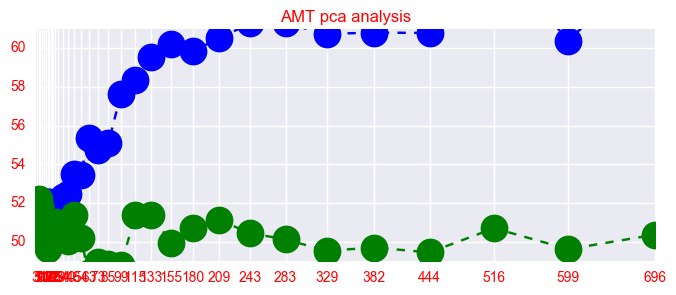

FLR n_components 3 accuracy train 50.9 accuracy test 48.85
FLR n_components 5 accuracy train 51.85 accuracy test 50.23
FLR n_components 7 accuracy train 52.0 accuracy test 49.69
FLR n_components 9 accuracy train 52.28 accuracy test 49.77
FLR n_components 11 accuracy train 51.76 accuracy test 49.54
FLR n_components 13 accuracy train 52.5 accuracy test 50.0
FLR n_components 15 accuracy train 52.31 accuracy test 50.31
FLR n_components 17 accuracy train 52.35 accuracy test 51.0
FLR n_components 19 accuracy train 52.23 accuracy test 50.23
FLR n_components 21 accuracy train 52.5 accuracy test 49.62
FLR n_components 23 accuracy train 52.57 accuracy test 50.0
FLR n_components 19 accuracy train 52.26 accuracy test 50.31
FLR n_components 22 accuracy train 52.45 accuracy test 50.61
FLR n_components 25 accuracy train 52.57 accuracy test 50.77
FLR n_components 29 accuracy train 53.02 accuracy test 50.61
FLR n_components 34 accuracy train 53.69 accuracy test 50.23
FLR n_components 40 accuracy train 

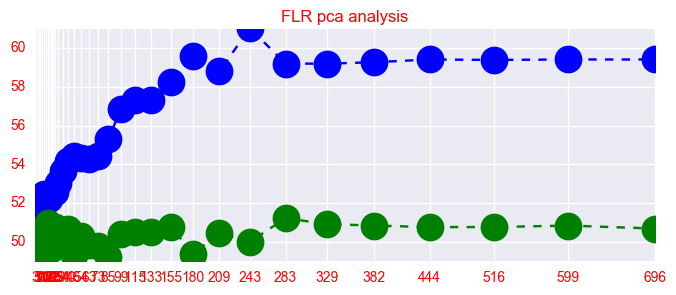

IBM n_components 3 accuracy train 51.16 accuracy test 48.96
IBM n_components 5 accuracy train 51.51 accuracy test 50.72
IBM n_components 7 accuracy train 51.47 accuracy test 50.48
IBM n_components 9 accuracy train 51.98 accuracy test 50.08
IBM n_components 11 accuracy train 51.89 accuracy test 49.92
IBM n_components 13 accuracy train 52.02 accuracy test 48.07
IBM n_components 15 accuracy train 51.13 accuracy test 49.12
IBM n_components 17 accuracy train 52.56 accuracy test 48.31
IBM n_components 19 accuracy train 52.09 accuracy test 48.88
IBM n_components 21 accuracy train 52.87 accuracy test 49.76
IBM n_components 23 accuracy train 52.34 accuracy test 49.28
IBM n_components 19 accuracy train 52.09 accuracy test 48.88
IBM n_components 22 accuracy train 52.4 accuracy test 49.92
IBM n_components 25 accuracy train 53.6 accuracy test 50.4
IBM n_components 29 accuracy train 53.05 accuracy test 49.28
IBM n_components 34 accuracy train 51.82 accuracy test 48.39
IBM n_components 40 accuracy tr

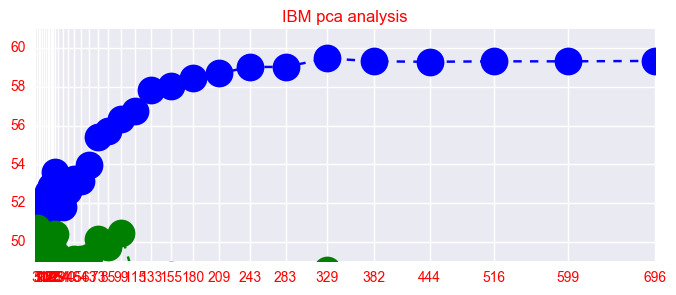

BK n_components 3 accuracy train 50.43 accuracy test 51.17
BK n_components 5 accuracy train 51.47 accuracy test 49.3
BK n_components 7 accuracy train 51.3 accuracy test 49.67
BK n_components 9 accuracy train 51.91 accuracy test 49.48
BK n_components 11 accuracy train 52.15 accuracy test 50.14
BK n_components 13 accuracy train 52.04 accuracy test 50.23
BK n_components 15 accuracy train 51.99 accuracy test 49.48
BK n_components 17 accuracy train 51.96 accuracy test 48.45
BK n_components 19 accuracy train 52.02 accuracy test 49.67
BK n_components 21 accuracy train 52.4 accuracy test 51.74
BK n_components 23 accuracy train 52.37 accuracy test 51.64
BK n_components 19 accuracy train 51.99 accuracy test 49.67
BK n_components 22 accuracy train 52.15 accuracy test 51.36
BK n_components 25 accuracy train 52.26 accuracy test 52.21
BK n_components 29 accuracy train 52.48 accuracy test 51.83
BK n_components 34 accuracy train 52.26 accuracy test 51.46
BK n_components 40 accuracy train 52.51 accurac

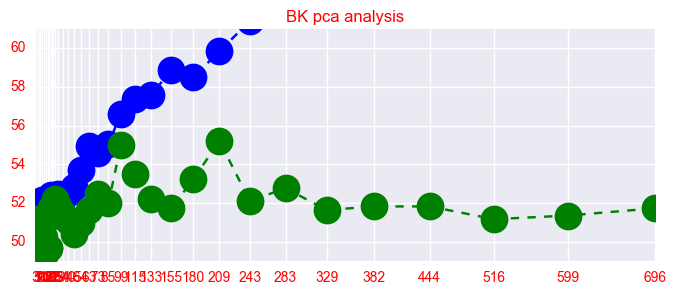

done 80%
NFX n_components 3 accuracy train 51.25 accuracy test 51.97
NFX n_components 5 accuracy train 51.22 accuracy test 51.97
NFX n_components 7 accuracy train 51.17 accuracy test 51.97
NFX n_components 9 accuracy train 51.25 accuracy test 51.28
NFX n_components 11 accuracy train 51.3 accuracy test 51.18
NFX n_components 13 accuracy train 51.17 accuracy test 50.79
NFX n_components 15 accuracy train 51.92 accuracy test 50.49
NFX n_components 17 accuracy train 52.63 accuracy test 50.99
NFX n_components 19 accuracy train 52.63 accuracy test 52.17
NFX n_components 21 accuracy train 52.58 accuracy test 50.99
NFX n_components 23 accuracy train 53.4 accuracy test 50.79
NFX n_components 19 accuracy train 52.63 accuracy test 52.17
NFX n_components 22 accuracy train 52.71 accuracy test 52.07
NFX n_components 25 accuracy train 53.43 accuracy test 51.97
NFX n_components 29 accuracy train 54.37 accuracy test 51.97
NFX n_components 34 accuracy train 54.07 accuracy test 51.58
NFX n_components 40 a

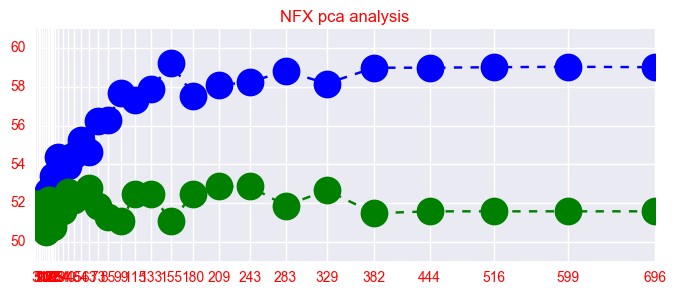

AGN n_components 3 accuracy train 53.15 accuracy test 50.89
AGN n_components 5 accuracy train 53.18 accuracy test 50.46
AGN n_components 7 accuracy train 53.23 accuracy test 50.46
AGN n_components 9 accuracy train 53.23 accuracy test 50.53
AGN n_components 11 accuracy train 53.3 accuracy test 50.53
AGN n_components 13 accuracy train 53.18 accuracy test 50.32
AGN n_components 15 accuracy train 53.36 accuracy test 50.75
AGN n_components 17 accuracy train 53.33 accuracy test 51.03
AGN n_components 19 accuracy train 53.3 accuracy test 51.82
AGN n_components 21 accuracy train 53.28 accuracy test 51.75
AGN n_components 23 accuracy train 52.83 accuracy test 51.03
AGN n_components 19 accuracy train 53.3 accuracy test 51.82
AGN n_components 22 accuracy train 53.08 accuracy test 51.53
AGN n_components 25 accuracy train 52.4 accuracy test 50.61
AGN n_components 29 accuracy train 52.32 accuracy test 50.75
AGN n_components 34 accuracy train 52.6 accuracy test 50.96
AGN n_components 40 accuracy trai

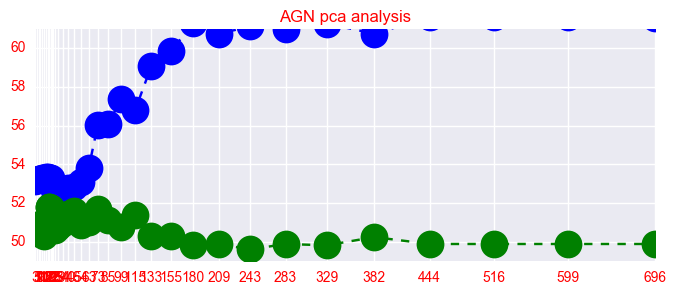

LRCX n_components 3 accuracy train 51.19 accuracy test 49.44
LRCX n_components 5 accuracy train 51.56 accuracy test 50.0
LRCX n_components 7 accuracy train 52.07 accuracy test 50.24
LRCX n_components 9 accuracy train 52.05 accuracy test 50.56
LRCX n_components 11 accuracy train 52.28 accuracy test 50.48
LRCX n_components 13 accuracy train 52.28 accuracy test 50.96
LRCX n_components 15 accuracy train 51.82 accuracy test 50.72
LRCX n_components 17 accuracy train 51.91 accuracy test 50.48
LRCX n_components 19 accuracy train 51.84 accuracy test 50.64
LRCX n_components 21 accuracy train 52.17 accuracy test 50.8
LRCX n_components 23 accuracy train 51.63 accuracy test 50.72
LRCX n_components 19 accuracy train 51.84 accuracy test 50.64
LRCX n_components 22 accuracy train 52.07 accuracy test 50.0
LRCX n_components 25 accuracy train 51.8 accuracy test 51.36
LRCX n_components 29 accuracy train 52.21 accuracy test 52.0
LRCX n_components 34 accuracy train 52.7 accuracy test 52.32
LRCX n_components 

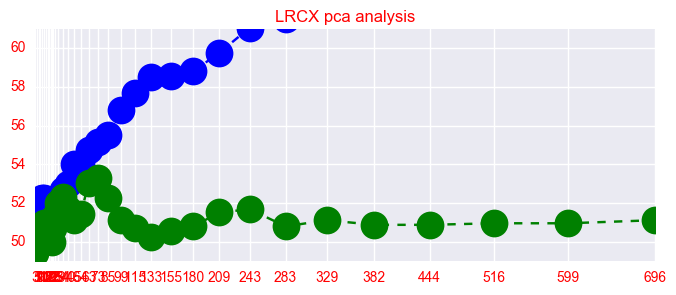

DIS n_components 3 accuracy train 50.91 accuracy test 51.63
DIS n_components 5 accuracy train 51.69 accuracy test 49.87
DIS n_components 7 accuracy train 50.78 accuracy test 51.54
DIS n_components 9 accuracy train 51.03 accuracy test 51.28
DIS n_components 11 accuracy train 51.62 accuracy test 50.4
DIS n_components 13 accuracy train 52.19 accuracy test 50.22
DIS n_components 15 accuracy train 51.99 accuracy test 48.9
DIS n_components 17 accuracy train 51.69 accuracy test 50.31
DIS n_components 19 accuracy train 52.06 accuracy test 49.87
DIS n_components 21 accuracy train 51.46 accuracy test 49.78
DIS n_components 23 accuracy train 52.9 accuracy test 49.69
DIS n_components 19 accuracy train 52.06 accuracy test 49.87
DIS n_components 22 accuracy train 52.65 accuracy test 48.46
DIS n_components 25 accuracy train 51.78 accuracy test 48.9
DIS n_components 29 accuracy train 52.38 accuracy test 50.13
DIS n_components 34 accuracy train 53.13 accuracy test 50.66
DIS n_components 40 accuracy tra

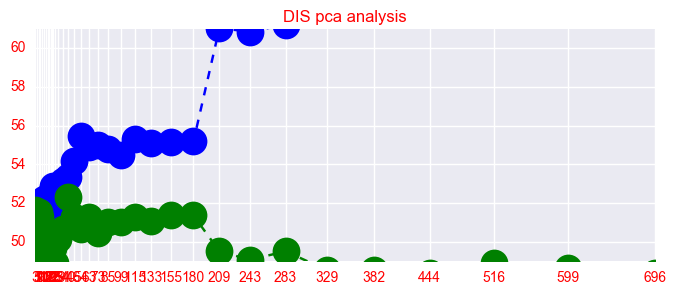

LH n_components 3 accuracy train 50.93 accuracy test 51.51
LH n_components 5 accuracy train 50.89 accuracy test 52.33
LH n_components 7 accuracy train 51.22 accuracy test 52.49
LH n_components 9 accuracy train 51.47 accuracy test 51.68
LH n_components 11 accuracy train 51.55 accuracy test 52.33
LH n_components 13 accuracy train 51.28 accuracy test 52.66
LH n_components 15 accuracy train 51.69 accuracy test 54.78
LH n_components 17 accuracy train 51.51 accuracy test 55.19
LH n_components 19 accuracy train 51.53 accuracy test 52.98
LH n_components 21 accuracy train 51.77 accuracy test 52.58
LH n_components 23 accuracy train 52.18 accuracy test 52.41
LH n_components 19 accuracy train 51.53 accuracy test 52.9
LH n_components 22 accuracy train 51.49 accuracy test 51.68
LH n_components 25 accuracy train 51.71 accuracy test 51.76
LH n_components 29 accuracy train 51.59 accuracy test 53.48
LH n_components 34 accuracy train 51.94 accuracy test 51.43
LH n_components 40 accuracy train 52.08 accur

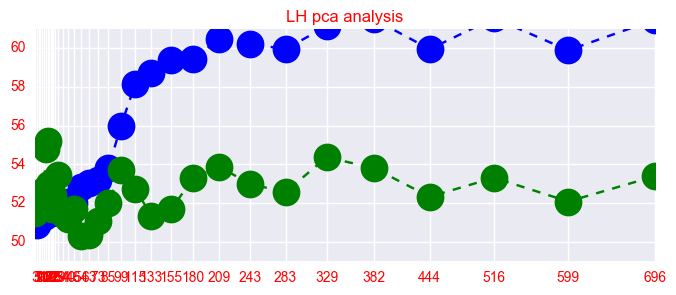

C n_components 3 accuracy train 51.3 accuracy test 52.73
C n_components 5 accuracy train 51.23 accuracy test 52.73
C n_components 7 accuracy train 50.96 accuracy test 52.38
C n_components 9 accuracy train 50.82 accuracy test 52.03
C n_components 11 accuracy train 51.61 accuracy test 50.26
C n_components 13 accuracy train 51.54 accuracy test 50.26
C n_components 15 accuracy train 51.28 accuracy test 51.85
C n_components 17 accuracy train 51.28 accuracy test 51.68
C n_components 19 accuracy train 51.58 accuracy test 50.79
C n_components 21 accuracy train 51.12 accuracy test 52.73
C n_components 23 accuracy train 51.91 accuracy test 54.23
C n_components 19 accuracy train 51.58 accuracy test 50.79
C n_components 22 accuracy train 51.91 accuracy test 53.97
C n_components 25 accuracy train 51.82 accuracy test 53.17
C n_components 29 accuracy train 51.98 accuracy test 53.7
C n_components 34 accuracy train 52.77 accuracy test 53.53
C n_components 40 accuracy train 53.68 accuracy test 53.35
C n

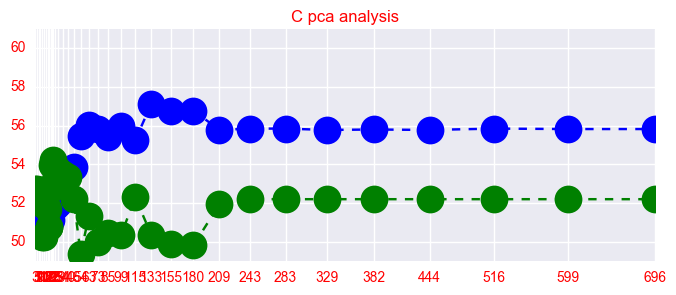

done 100%
MNK n_components 3 accuracy train 50.48 accuracy test 53.75
MNK n_components 5 accuracy train 50.19 accuracy test 50.43
MNK n_components 7 accuracy train 50.89 accuracy test 50.43
MNK n_components 9 accuracy train 50.28 accuracy test 50.76
MNK n_components 11 accuracy train 51.5 accuracy test 48.84
MNK n_components 13 accuracy train 51.59 accuracy test 48.84
MNK n_components 15 accuracy train 51.94 accuracy test 49.77
MNK n_components 17 accuracy train 52.06 accuracy test 50.03
MNK n_components 19 accuracy train 52.38 accuracy test 50.63
MNK n_components 21 accuracy train 52.2 accuracy test 50.5
MNK n_components 23 accuracy train 52.61 accuracy test 49.7
MNK n_components 19 accuracy train 52.38 accuracy test 50.63
MNK n_components 22 accuracy train 52.76 accuracy test 50.7
MNK n_components 25 accuracy train 53.05 accuracy test 51.29
MNK n_components 29 accuracy train 53.22 accuracy test 50.3
MNK n_components 34 accuracy train 53.95 accuracy test 50.63
MNK n_components 40 accu

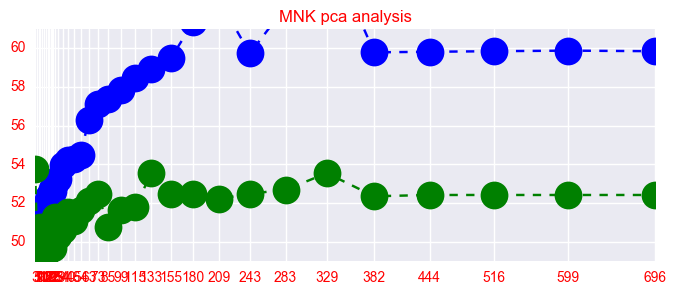

In [38]:
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_pca4, acc_test_pca4 = clf_portfolio_dic.getModelPCA(clf, features_1p4_extra_second_order, n_components_vec_1p4_extra_second_order)

In [39]:
experiment8 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with PCA - 1.4extra_second_order",
    stocks=stocks, originalFeatures=features_1p4_extra_second_order)

In [40]:
experiment8.setTrainResults(acc_train_pca4)
experiment8.setTestResults(acc_test_pca4)
print("The test accuracy (mean - std) is:")
print(experiment8.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 48.1648091   48.47520301  48.47724018  48.32755526  48.31226264
  48.32489718  48.46407544  48.55035641  48.77259311  48.71085219
  48.57605904  48.80338232  48.57473212  48.89264243  48.85593889
  48.99265312  49.1292555   49.2767204   49.0716831   49.00933093
  49.0673672   49.21270083  49.57877704  49.26804147  49.3253635
  49.51569657  49.48243655  49.3682773   49.41278558  49.3462867
  48.94728642  49.30318753  48.99703124  49.17344701  49.11284873
  49.08675838]


#### Save to Pickle

In [41]:
with open("pickles/acc_with_pca.p",'wb') as f:
    pickle.dump( [experiment5, experiment6, experiment7, experiment8], f, protocol=pickle.HIGHEST_PROTOCOL)

## Use SVD

1.2extra and 1.2extra_second_order (are the same with thresold 0.8)

In [42]:
n_components_vec_1p2_extra = np.arange(3, len(features_1p2_extra), 2)
print(n_components_vec_1p2_extra)

[ 3  5  7  9 11 13 15]


DNB n_components 3 accuracy train 51.4 accuracy test 53.85
DNB n_components 5 accuracy train 52.74 accuracy test 49.73
DNB n_components 7 accuracy train 53.47 accuracy test 51.71
DNB n_components 9 accuracy train 55.24 accuracy test 53.65
DNB n_components 11 accuracy train 54.67 accuracy test 53.3
DNB n_components 13 accuracy train 54.69 accuracy test 52.36
DNB n_components 15 accuracy train 54.71 accuracy test 54.55


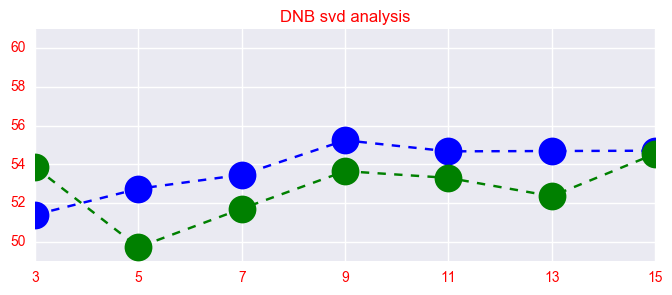

NRG n_components 3 accuracy train 53.34 accuracy test 54.33
NRG n_components 5 accuracy train 53.25 accuracy test 54.33
NRG n_components 7 accuracy train 53.29 accuracy test 54.33
NRG n_components 9 accuracy train 53.94 accuracy test 55.4
NRG n_components 11 accuracy train 54.98 accuracy test 54.24
NRG n_components 13 accuracy train 55.21 accuracy test 53.85
NRG n_components 15 accuracy train 55.63 accuracy test 52.97


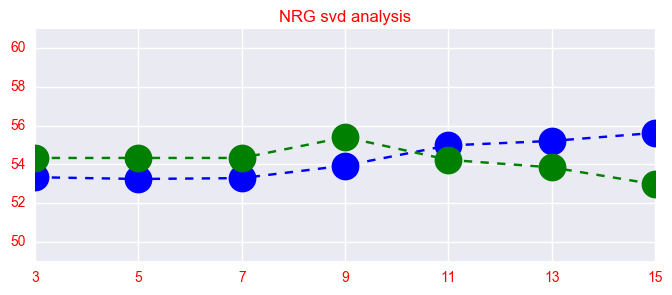

CL n_components 3 accuracy train 53.21 accuracy test 50.45
CL n_components 5 accuracy train 53.04 accuracy test 48.82
CL n_components 7 accuracy train 53.77 accuracy test 50.54
CL n_components 9 accuracy train 55.05 accuracy test 51.9
CL n_components 11 accuracy train 55.0 accuracy test 52.53
CL n_components 13 accuracy train 55.17 accuracy test 53.8
CL n_components 15 accuracy train 55.1 accuracy test 53.25


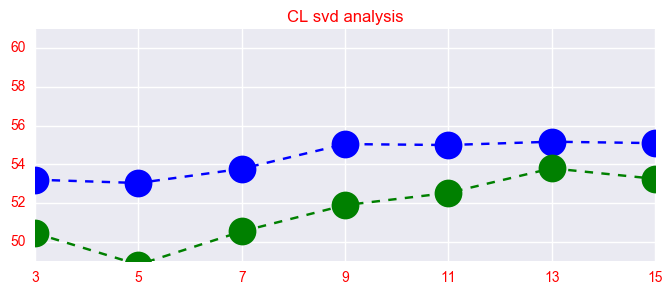

ANTM n_components 3 accuracy train 52.65 accuracy test 46.88
ANTM n_components 5 accuracy train 52.65 accuracy test 46.88
ANTM n_components 7 accuracy train 52.65 accuracy test 46.88
ANTM n_components 9 accuracy train 54.9 accuracy test 50.59
ANTM n_components 11 accuracy train 55.59 accuracy test 49.8
ANTM n_components 13 accuracy train 53.17 accuracy test 47.2
ANTM n_components 15 accuracy train 53.17 accuracy test 47.2


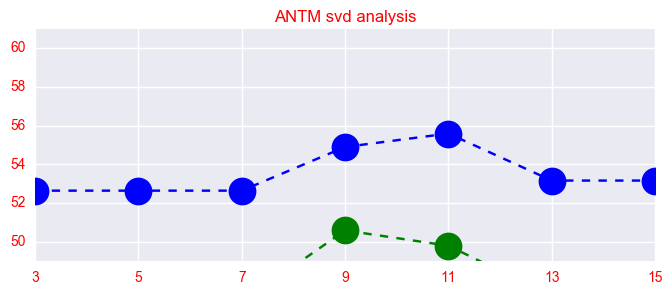

NEE n_components 3 accuracy train 54.7 accuracy test 48.57
NEE n_components 5 accuracy train 54.43 accuracy test 49.52
NEE n_components 7 accuracy train 55.61 accuracy test 50.48
NEE n_components 9 accuracy train 55.72 accuracy test 51.05
NEE n_components 11 accuracy train 55.83 accuracy test 50.86
NEE n_components 13 accuracy train 55.85 accuracy test 51.24
NEE n_components 15 accuracy train 55.99 accuracy test 50.38


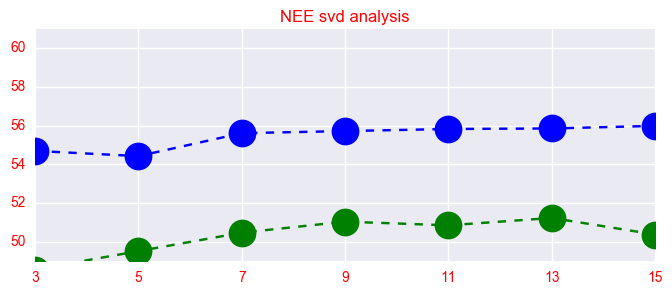

done 20%
PAYX n_components 3 accuracy train 51.06 accuracy test 50.08
PAYX n_components 5 accuracy train 51.38 accuracy test 50.65
PAYX n_components 7 accuracy train 54.11 accuracy test 49.19
PAYX n_components 9 accuracy train 53.8 accuracy test 49.52
PAYX n_components 11 accuracy train 54.64 accuracy test 49.6
PAYX n_components 13 accuracy train 53.64 accuracy test 49.19
PAYX n_components 15 accuracy train 54.29 accuracy test 49.68


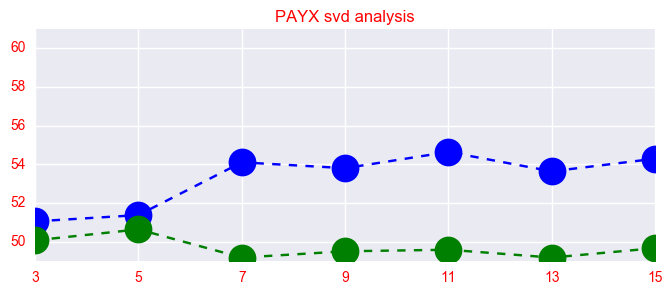

VAR n_components 3 accuracy train 53.16 accuracy test 52.36
VAR n_components 5 accuracy train 52.9 accuracy test 52.15
VAR n_components 7 accuracy train 54.16 accuracy test 54.01
VAR n_components 9 accuracy train 55.58 accuracy test 54.51
VAR n_components 11 accuracy train 55.49 accuracy test 56.38
VAR n_components 13 accuracy train 55.62 accuracy test 56.45
VAR n_components 15 accuracy train 55.28 accuracy test 55.37


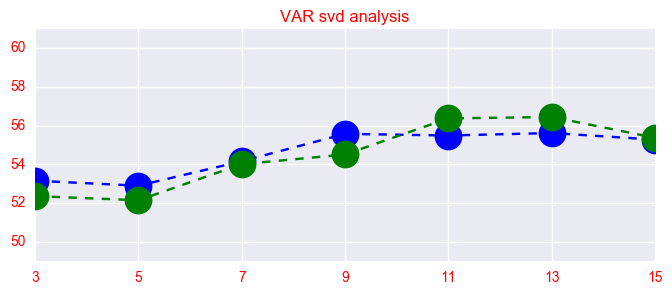

NI n_components 3 accuracy train 52.57 accuracy test 48.16
NI n_components 5 accuracy train 52.57 accuracy test 48.16
NI n_components 7 accuracy train 54.8 accuracy test 51.13
NI n_components 9 accuracy train 54.85 accuracy test 51.02
NI n_components 11 accuracy train 55.8 accuracy test 48.67
NI n_components 13 accuracy train 55.37 accuracy test 49.9
NI n_components 15 accuracy train 55.9 accuracy test 49.28


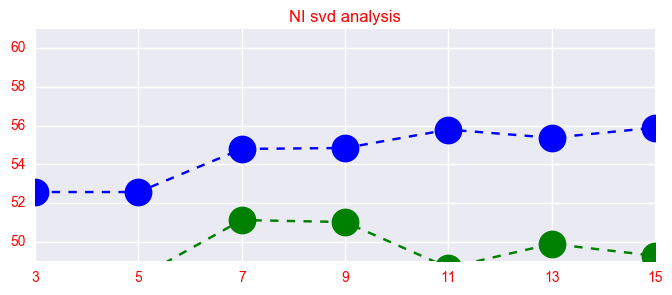

MNST n_components 3 accuracy train 52.35 accuracy test 51.96
MNST n_components 5 accuracy train 53.35 accuracy test 50.18
MNST n_components 7 accuracy train 54.23 accuracy test 52.55
MNST n_components 9 accuracy train 54.73 accuracy test 51.96
MNST n_components 11 accuracy train 54.86 accuracy test 51.88
MNST n_components 13 accuracy train 55.3 accuracy test 52.33
MNST n_components 15 accuracy train 55.38 accuracy test 52.25


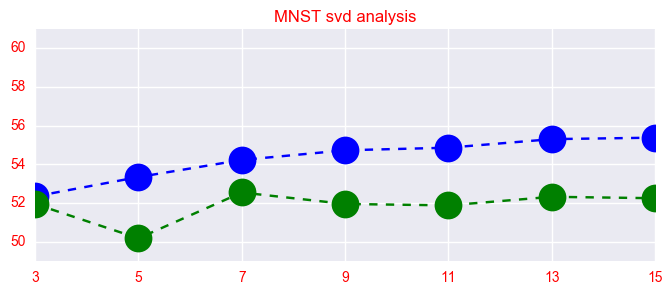

JNJ n_components 3 accuracy train 51.72 accuracy test 49.84
JNJ n_components 5 accuracy train 52.38 accuracy test 49.14
JNJ n_components 7 accuracy train 51.74 accuracy test 49.92
JNJ n_components 9 accuracy train 53.18 accuracy test 48.99
JNJ n_components 11 accuracy train 53.96 accuracy test 49.77
JNJ n_components 13 accuracy train 54.03 accuracy test 49.38
JNJ n_components 15 accuracy train 54.29 accuracy test 50.0


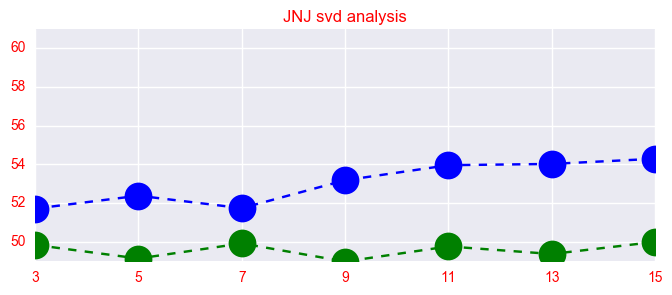

TGNA n_components 3 accuracy train 54.3 accuracy test 48.12
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 54.3 accuracy test 48.12
TGNA n_components 13 accuracy train 54.3 accuracy test 48.12
TGNA n_components 15 accuracy train 54.3 accuracy test 48.12


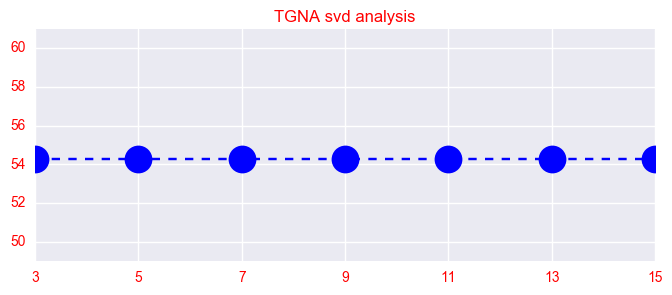

done 40%
NOV n_components 3 accuracy train 51.58 accuracy test 52.18
NOV n_components 5 accuracy train 53.73 accuracy test 52.35
NOV n_components 7 accuracy train 53.84 accuracy test 50.81
NOV n_components 9 accuracy train 53.73 accuracy test 53.4
NOV n_components 11 accuracy train 53.34 accuracy test 52.99
NOV n_components 13 accuracy train 54.57 accuracy test 52.67
NOV n_components 15 accuracy train 54.8 accuracy test 54.21


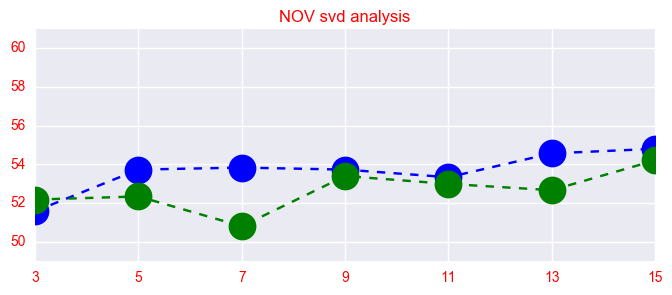

FIS n_components 3 accuracy train 51.52 accuracy test 55.21
FIS n_components 5 accuracy train 52.79 accuracy test 54.84
FIS n_components 7 accuracy train 54.62 accuracy test 51.64
FIS n_components 9 accuracy train 54.13 accuracy test 52.51
FIS n_components 11 accuracy train 54.77 accuracy test 52.88
FIS n_components 13 accuracy train 55.26 accuracy test 51.13
FIS n_components 15 accuracy train 55.18 accuracy test 52.15


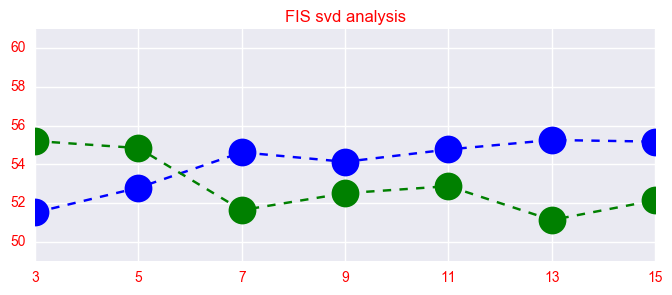

BLK n_components 3 accuracy train 52.03 accuracy test 53.38
BLK n_components 5 accuracy train 55.62 accuracy test 52.87
BLK n_components 7 accuracy train 57.41 accuracy test 51.93
BLK n_components 9 accuracy train 57.34 accuracy test 53.13
BLK n_components 11 accuracy train 57.18 accuracy test 53.21
BLK n_components 13 accuracy train 57.77 accuracy test 53.98
BLK n_components 15 accuracy train 57.45 accuracy test 54.16


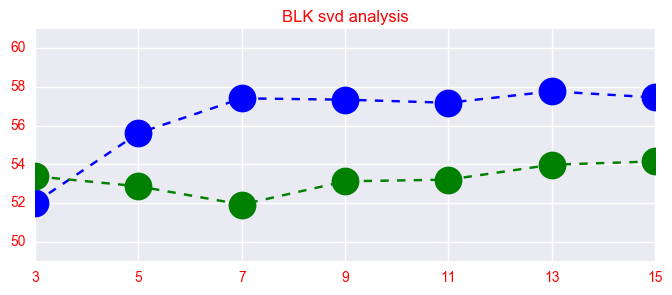

HBI n_components 3 accuracy train 51.87 accuracy test 51.55
HBI n_components 5 accuracy train 54.64 accuracy test 52.31
HBI n_components 7 accuracy train 55.09 accuracy test 52.17
HBI n_components 9 accuracy train 55.11 accuracy test 53.62
HBI n_components 11 accuracy train 56.06 accuracy test 54.11
HBI n_components 13 accuracy train 56.25 accuracy test 54.31
HBI n_components 15 accuracy train 56.51 accuracy test 53.97


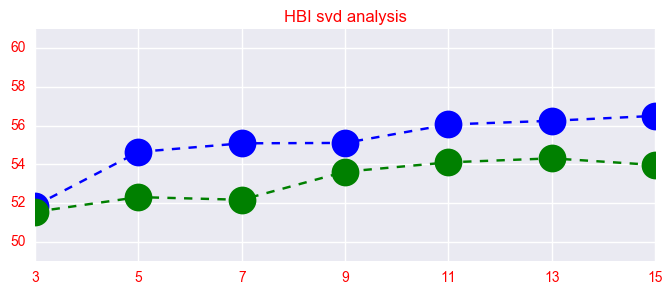

NVDA n_components 3 accuracy train 52.35 accuracy test 50.54
NVDA n_components 5 accuracy train 54.72 accuracy test 53.53
NVDA n_components 7 accuracy train 55.96 accuracy test 52.75
NVDA n_components 9 accuracy train 56.01 accuracy test 53.18
NVDA n_components 11 accuracy train 55.93 accuracy test 51.32
NVDA n_components 13 accuracy train 56.16 accuracy test 52.96
NVDA n_components 15 accuracy train 56.16 accuracy test 54.32


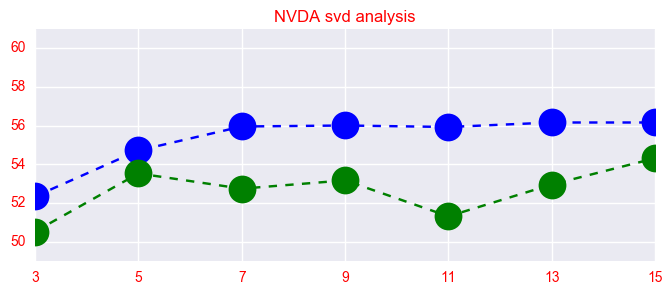

DLTR n_components 3 accuracy train 52.05 accuracy test 47.09
DLTR n_components 5 accuracy train 52.1 accuracy test 47.58
DLTR n_components 7 accuracy train 54.42 accuracy test 50.37
DLTR n_components 9 accuracy train 54.32 accuracy test 48.73
DLTR n_components 11 accuracy train 54.89 accuracy test 48.32
DLTR n_components 13 accuracy train 54.53 accuracy test 47.66
DLTR n_components 15 accuracy train 54.59 accuracy test 47.25


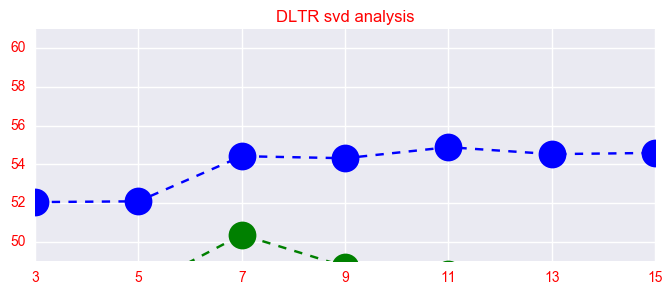

done 60%
MRO n_components 3 accuracy train 51.15 accuracy test 50.91
MRO n_components 5 accuracy train 54.38 accuracy test 51.93
MRO n_components 7 accuracy train 54.33 accuracy test 52.24
MRO n_components 9 accuracy train 54.22 accuracy test 51.73
MRO n_components 11 accuracy train 54.51 accuracy test 51.52
MRO n_components 13 accuracy train 55.01 accuracy test 52.64
MRO n_components 15 accuracy train 54.83 accuracy test 52.74


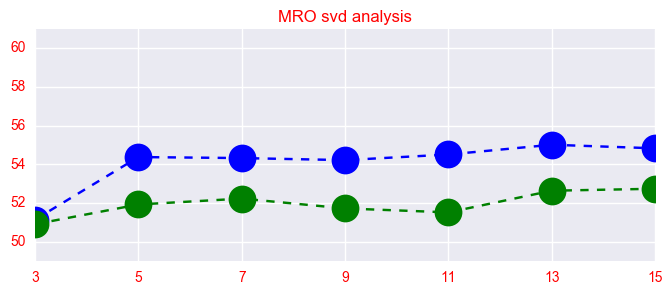

EMN n_components 3 accuracy train 52.46 accuracy test 51.05
EMN n_components 5 accuracy train 52.85 accuracy test 52.98
EMN n_components 7 accuracy train 53.83 accuracy test 54.81
EMN n_components 9 accuracy train 54.02 accuracy test 52.43
EMN n_components 11 accuracy train 54.47 accuracy test 52.7
EMN n_components 13 accuracy train 55.5 accuracy test 52.15
EMN n_components 15 accuracy train 56.03 accuracy test 52.61


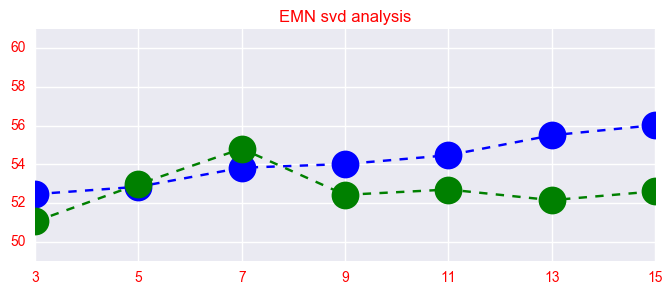

AMT n_components 3 accuracy train 51.66 accuracy test 50.21
AMT n_components 5 accuracy train 53.44 accuracy test 49.54
AMT n_components 7 accuracy train 56.11 accuracy test 52.71
AMT n_components 9 accuracy train 56.03 accuracy test 52.79
AMT n_components 11 accuracy train 56.53 accuracy test 51.79
AMT n_components 13 accuracy train 56.82 accuracy test 53.29
AMT n_components 15 accuracy train 56.53 accuracy test 54.2


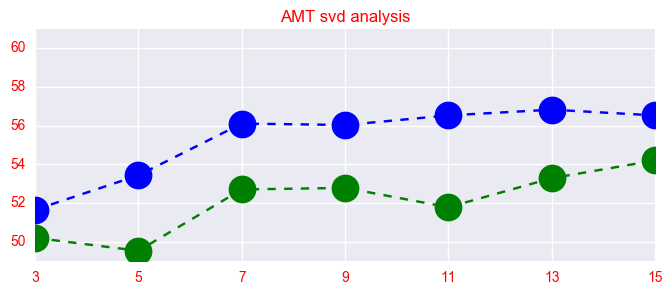

FLR n_components 3 accuracy train 51.24 accuracy test 52.45
FLR n_components 5 accuracy train 51.85 accuracy test 52.22
FLR n_components 7 accuracy train 55.04 accuracy test 51.0
FLR n_components 9 accuracy train 54.21 accuracy test 51.0
FLR n_components 11 accuracy train 55.85 accuracy test 53.14
FLR n_components 13 accuracy train 55.37 accuracy test 52.07
FLR n_components 15 accuracy train 55.78 accuracy test 53.22


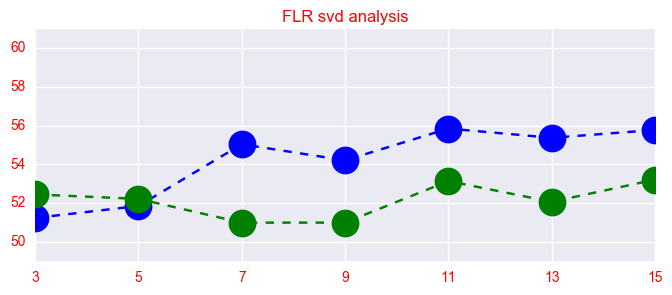

IBM n_components 3 accuracy train 53.14 accuracy test 51.28
IBM n_components 5 accuracy train 52.36 accuracy test 48.23
IBM n_components 7 accuracy train 53.07 accuracy test 48.23
IBM n_components 9 accuracy train 53.85 accuracy test 50.08
IBM n_components 11 accuracy train 54.72 accuracy test 50.0
IBM n_components 13 accuracy train 54.92 accuracy test 50.0
IBM n_components 15 accuracy train 55.6 accuracy test 48.8


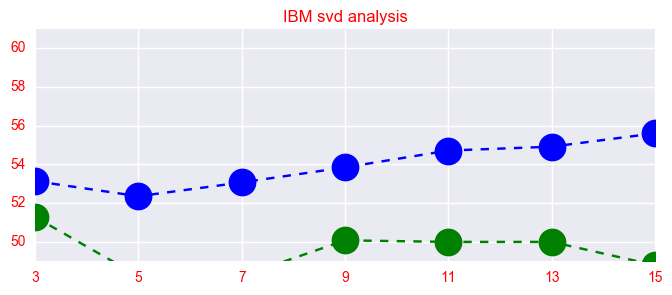

BK n_components 3 accuracy train 53.33 accuracy test 49.95
BK n_components 5 accuracy train 53.61 accuracy test 47.7
BK n_components 7 accuracy train 54.35 accuracy test 50.7
BK n_components 9 accuracy train 54.32 accuracy test 49.77
BK n_components 11 accuracy train 54.54 accuracy test 49.58
BK n_components 13 accuracy train 56.24 accuracy test 52.68
BK n_components 15 accuracy train 55.47 accuracy test 51.92


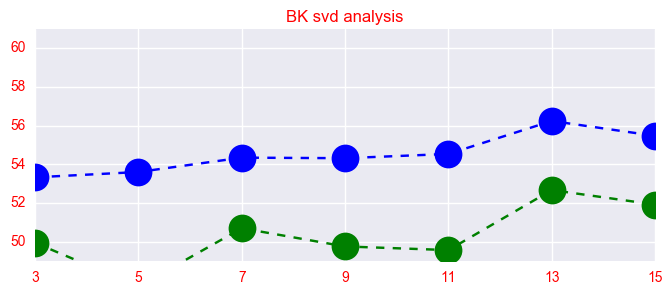

done 80%
NFX n_components 3 accuracy train 51.3 accuracy test 51.87
NFX n_components 5 accuracy train 53.43 accuracy test 53.16
NFX n_components 7 accuracy train 53.97 accuracy test 52.66
NFX n_components 9 accuracy train 54.49 accuracy test 52.96
NFX n_components 11 accuracy train 54.51 accuracy test 52.47
NFX n_components 13 accuracy train 55.26 accuracy test 53.94
NFX n_components 15 accuracy train 54.59 accuracy test 55.03


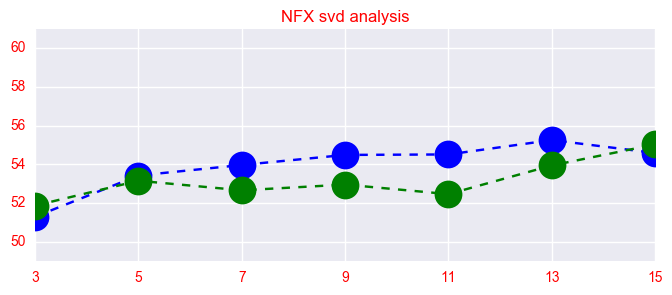

AGN n_components 3 accuracy train 54.49 accuracy test 52.03
AGN n_components 5 accuracy train 54.81 accuracy test 51.39
AGN n_components 7 accuracy train 55.92 accuracy test 50.39
AGN n_components 9 accuracy train 56.42 accuracy test 51.46
AGN n_components 11 accuracy train 55.52 accuracy test 50.68
AGN n_components 13 accuracy train 56.22 accuracy test 50.75
AGN n_components 15 accuracy train 56.62 accuracy test 50.82


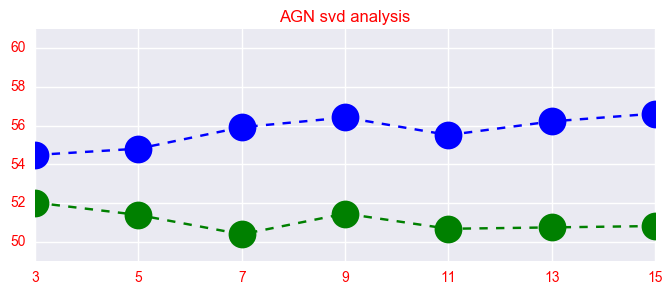

LRCX n_components 3 accuracy train 53.67 accuracy test 49.28
LRCX n_components 5 accuracy train 52.98 accuracy test 51.76
LRCX n_components 7 accuracy train 55.66 accuracy test 49.44
LRCX n_components 9 accuracy train 55.62 accuracy test 50.08
LRCX n_components 11 accuracy train 56.1 accuracy test 50.8
LRCX n_components 13 accuracy train 55.8 accuracy test 50.96
LRCX n_components 15 accuracy train 55.83 accuracy test 50.96


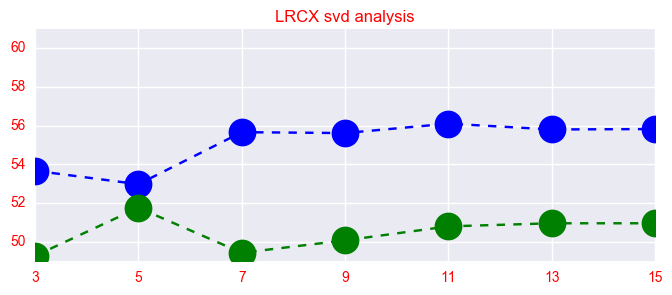

DIS n_components 3 accuracy train 52.47 accuracy test 53.39
DIS n_components 5 accuracy train 52.42 accuracy test 53.3
DIS n_components 7 accuracy train 53.91 accuracy test 52.33
DIS n_components 9 accuracy train 54.55 accuracy test 51.89
DIS n_components 11 accuracy train 55.14 accuracy test 50.13
DIS n_components 13 accuracy train 54.57 accuracy test 51.28
DIS n_components 15 accuracy train 54.59 accuracy test 52.33


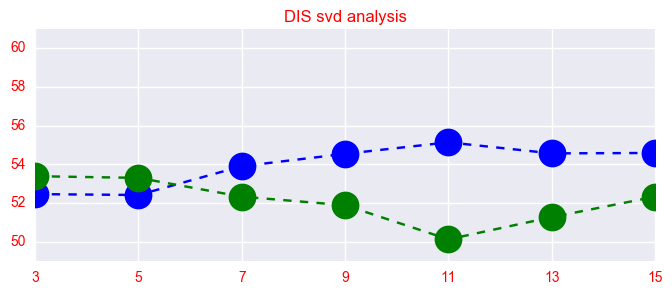

LH n_components 3 accuracy train 53.0 accuracy test 53.56
LH n_components 5 accuracy train 53.52 accuracy test 50.94
LH n_components 7 accuracy train 54.58 accuracy test 52.82
LH n_components 9 accuracy train 55.09 accuracy test 54.05
LH n_components 11 accuracy train 55.77 accuracy test 54.29
LH n_components 13 accuracy train 55.85 accuracy test 54.37
LH n_components 15 accuracy train 56.36 accuracy test 53.39


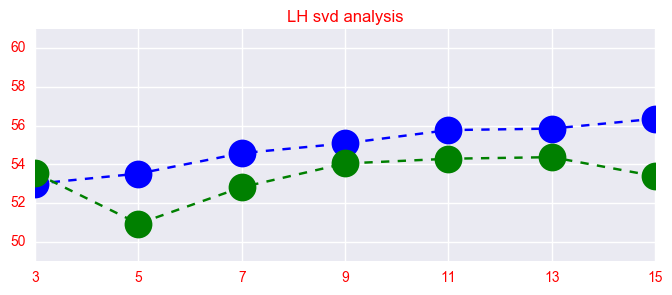

C n_components 3 accuracy train 51.96 accuracy test 52.38
C n_components 5 accuracy train 52.24 accuracy test 52.38
C n_components 7 accuracy train 52.49 accuracy test 51.85
C n_components 9 accuracy train 53.54 accuracy test 50.26
C n_components 11 accuracy train 54.03 accuracy test 52.29
C n_components 13 accuracy train 53.91 accuracy test 52.12
C n_components 15 accuracy train 54.03 accuracy test 52.03


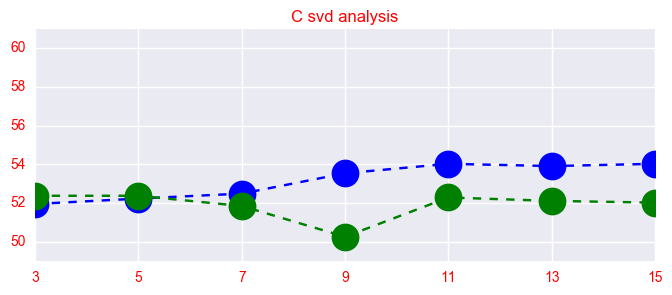

done 100%
MNK n_components 3 accuracy train 51.85 accuracy test 52.42
MNK n_components 5 accuracy train 54.68 accuracy test 52.62
MNK n_components 7 accuracy train 54.33 accuracy test 53.48
MNK n_components 9 accuracy train 54.71 accuracy test 54.21
MNK n_components 11 accuracy train 54.74 accuracy test 54.15
MNK n_components 13 accuracy train 54.97 accuracy test 54.08
MNK n_components 15 accuracy train 55.32 accuracy test 54.81


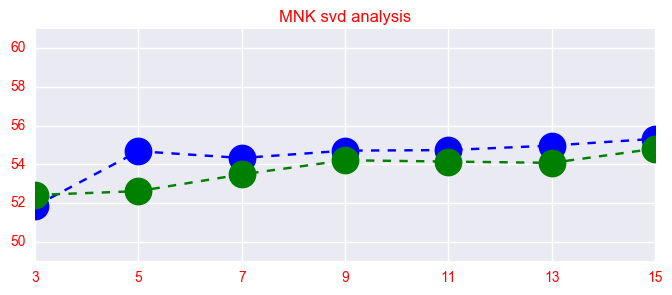

In [43]:
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_svd1, acc_test_svd1 = clf_portfolio_dic.getModelSVD(clf, features_1p2_extra, n_components_vec_1p2_extra)

In [44]:
experiment9 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with SVD - 1.2extra",
    stocks=stocks, originalFeatures=features_1p2_extra)

In [45]:
experiment9.setTrainResults(acc_train_svd1)
experiment9.setTestResults(acc_test_svd1)
print("The test accuracy (mean - std) is:")
print(experiment9.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 49.11081876  48.81259916  49.5522461   49.97892793  49.7396874
  49.75041379  49.76860699]


In [46]:
n_components_vec_1p2_extra_second_order = np.arange(3, len(features_1p2_extra_second_order), 2)

DNB n_components 3 accuracy train 51.43 accuracy test 53.6
DNB n_components 5 accuracy train 52.74 accuracy test 49.73
DNB n_components 7 accuracy train 53.47 accuracy test 51.71
DNB n_components 9 accuracy train 55.24 accuracy test 53.65
DNB n_components 11 accuracy train 54.67 accuracy test 53.3
DNB n_components 13 accuracy train 54.69 accuracy test 52.36
DNB n_components 15 accuracy train 54.71 accuracy test 54.55


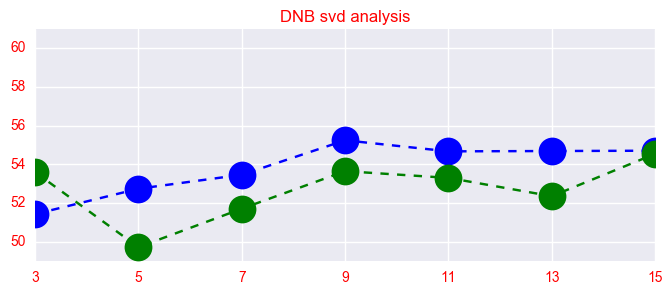

NRG n_components 3 accuracy train 53.34 accuracy test 54.33
NRG n_components 5 accuracy train 53.25 accuracy test 54.33
NRG n_components 7 accuracy train 53.29 accuracy test 54.33
NRG n_components 9 accuracy train 53.94 accuracy test 55.4
NRG n_components 11 accuracy train 54.98 accuracy test 54.24
NRG n_components 13 accuracy train 55.21 accuracy test 53.85
NRG n_components 15 accuracy train 55.63 accuracy test 52.97


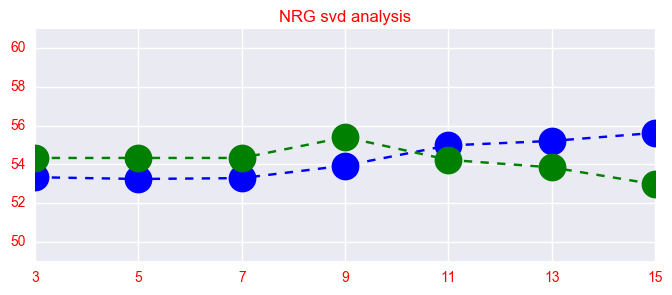

CL n_components 3 accuracy train 53.21 accuracy test 50.45
CL n_components 5 accuracy train 53.04 accuracy test 48.82
CL n_components 7 accuracy train 53.77 accuracy test 50.54
CL n_components 9 accuracy train 55.05 accuracy test 51.9
CL n_components 11 accuracy train 55.0 accuracy test 52.53
CL n_components 13 accuracy train 55.17 accuracy test 53.8
CL n_components 15 accuracy train 55.1 accuracy test 53.25


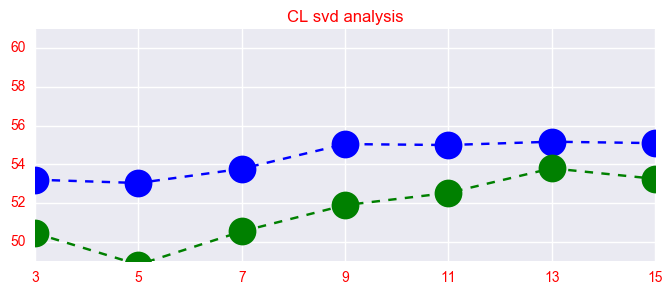

ANTM n_components 3 accuracy train 52.65 accuracy test 46.88
ANTM n_components 5 accuracy train 52.65 accuracy test 46.88
ANTM n_components 7 accuracy train 52.65 accuracy test 46.88
ANTM n_components 9 accuracy train 54.9 accuracy test 50.59
ANTM n_components 11 accuracy train 55.59 accuracy test 49.8
ANTM n_components 13 accuracy train 53.17 accuracy test 47.2
ANTM n_components 15 accuracy train 53.17 accuracy test 47.2


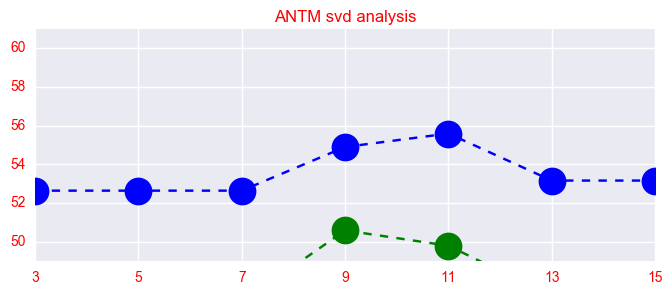

NEE n_components 3 accuracy train 54.7 accuracy test 48.57
NEE n_components 5 accuracy train 54.43 accuracy test 49.52
NEE n_components 7 accuracy train 55.61 accuracy test 50.48
NEE n_components 9 accuracy train 55.72 accuracy test 51.05
NEE n_components 11 accuracy train 55.83 accuracy test 50.86
NEE n_components 13 accuracy train 55.85 accuracy test 51.24
NEE n_components 15 accuracy train 55.99 accuracy test 50.38


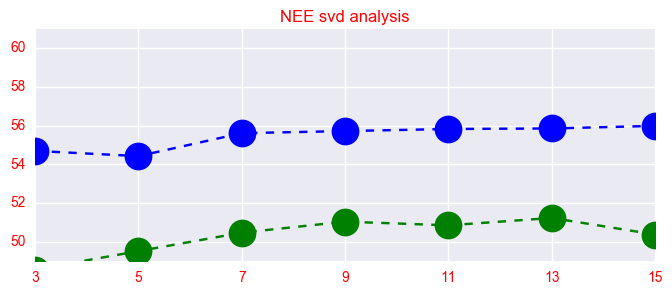

done 20%
PAYX n_components 3 accuracy train 51.06 accuracy test 50.08
PAYX n_components 5 accuracy train 51.38 accuracy test 50.65
PAYX n_components 7 accuracy train 54.11 accuracy test 49.19
PAYX n_components 9 accuracy train 53.8 accuracy test 49.52
PAYX n_components 11 accuracy train 54.64 accuracy test 49.6
PAYX n_components 13 accuracy train 53.64 accuracy test 49.19
PAYX n_components 15 accuracy train 54.29 accuracy test 49.68


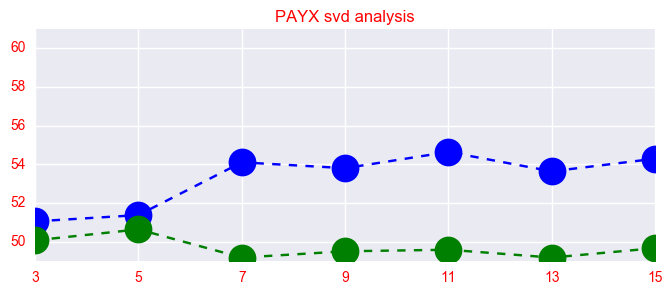

VAR n_components 3 accuracy train 53.16 accuracy test 52.36
VAR n_components 5 accuracy train 52.9 accuracy test 52.15
VAR n_components 7 accuracy train 54.16 accuracy test 54.01
VAR n_components 9 accuracy train 55.58 accuracy test 54.51
VAR n_components 11 accuracy train 55.49 accuracy test 56.38
VAR n_components 13 accuracy train 55.62 accuracy test 56.45
VAR n_components 15 accuracy train 55.28 accuracy test 55.37


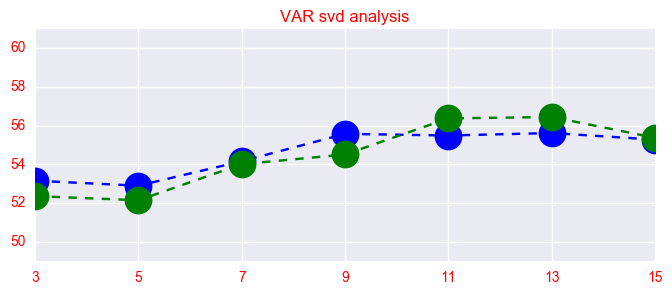

NI n_components 3 accuracy train 52.57 accuracy test 48.16
NI n_components 5 accuracy train 52.57 accuracy test 48.16
NI n_components 7 accuracy train 54.8 accuracy test 51.13
NI n_components 9 accuracy train 54.85 accuracy test 51.02
NI n_components 11 accuracy train 55.8 accuracy test 48.67
NI n_components 13 accuracy train 55.37 accuracy test 49.9
NI n_components 15 accuracy train 55.9 accuracy test 49.28


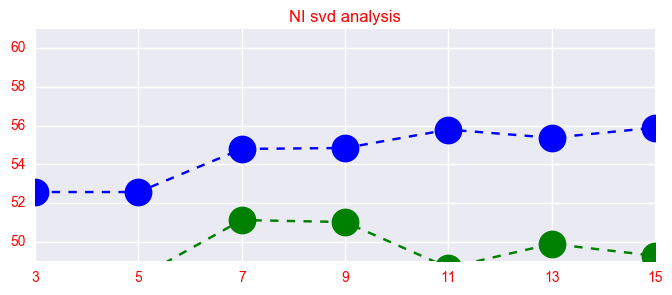

MNST n_components 3 accuracy train 52.35 accuracy test 51.96
MNST n_components 5 accuracy train 53.35 accuracy test 50.18
MNST n_components 7 accuracy train 54.23 accuracy test 52.55
MNST n_components 9 accuracy train 54.73 accuracy test 51.96
MNST n_components 11 accuracy train 54.86 accuracy test 51.88
MNST n_components 13 accuracy train 55.3 accuracy test 52.33
MNST n_components 15 accuracy train 55.38 accuracy test 52.25


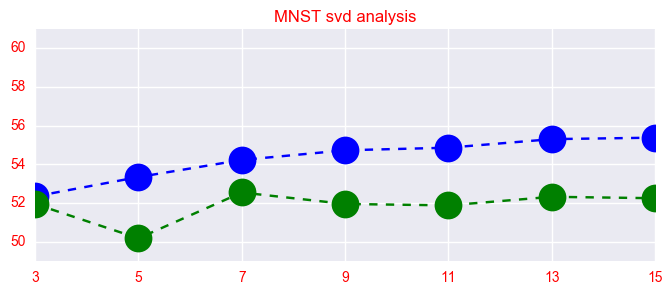

JNJ n_components 3 accuracy train 51.72 accuracy test 49.84
JNJ n_components 5 accuracy train 52.38 accuracy test 49.14
JNJ n_components 7 accuracy train 51.74 accuracy test 49.92
JNJ n_components 9 accuracy train 53.18 accuracy test 48.99
JNJ n_components 11 accuracy train 53.96 accuracy test 49.77
JNJ n_components 13 accuracy train 54.03 accuracy test 49.38
JNJ n_components 15 accuracy train 54.29 accuracy test 50.0


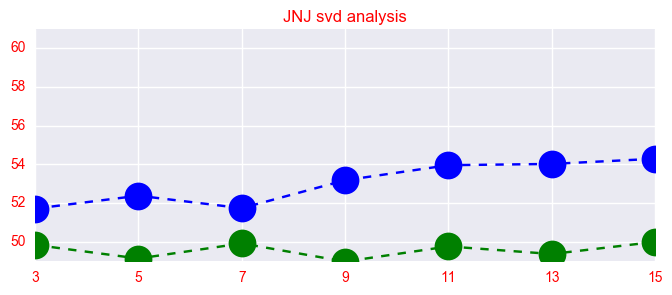

TGNA n_components 3 accuracy train 54.3 accuracy test 48.12
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 54.3 accuracy test 48.12
TGNA n_components 13 accuracy train 54.3 accuracy test 48.12
TGNA n_components 15 accuracy train 54.3 accuracy test 48.12


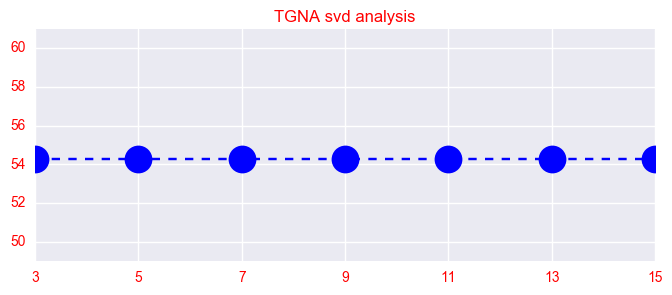

done 40%
NOV n_components 3 accuracy train 51.58 accuracy test 52.18
NOV n_components 5 accuracy train 53.71 accuracy test 52.35
NOV n_components 7 accuracy train 53.84 accuracy test 50.81
NOV n_components 9 accuracy train 53.73 accuracy test 53.4
NOV n_components 11 accuracy train 53.34 accuracy test 52.99
NOV n_components 13 accuracy train 54.57 accuracy test 52.67
NOV n_components 15 accuracy train 54.8 accuracy test 54.21


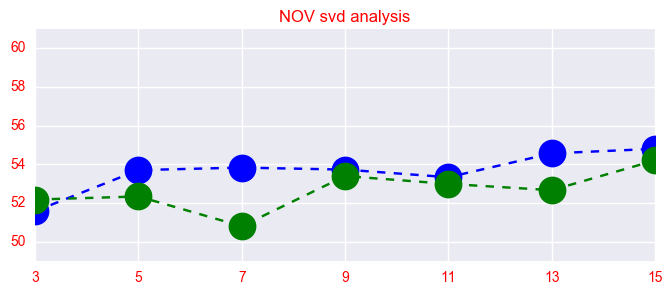

FIS n_components 3 accuracy train 51.52 accuracy test 55.21
FIS n_components 5 accuracy train 52.79 accuracy test 54.84
FIS n_components 7 accuracy train 54.62 accuracy test 51.64
FIS n_components 9 accuracy train 54.13 accuracy test 52.51
FIS n_components 11 accuracy train 54.77 accuracy test 52.88
FIS n_components 13 accuracy train 55.26 accuracy test 51.13
FIS n_components 15 accuracy train 55.18 accuracy test 52.15


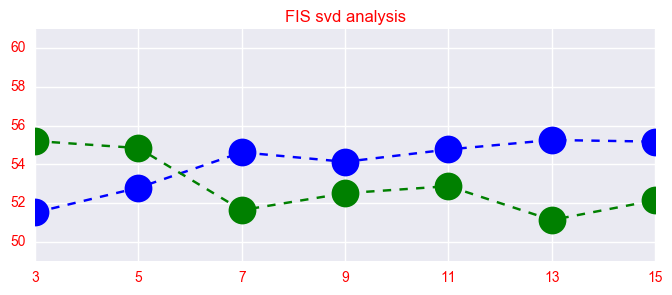

BLK n_components 3 accuracy train 52.03 accuracy test 53.38
BLK n_components 5 accuracy train 55.62 accuracy test 52.87
BLK n_components 7 accuracy train 57.41 accuracy test 51.93
BLK n_components 9 accuracy train 57.34 accuracy test 53.13
BLK n_components 11 accuracy train 57.18 accuracy test 53.21
BLK n_components 13 accuracy train 57.77 accuracy test 53.98
BLK n_components 15 accuracy train 57.45 accuracy test 54.16


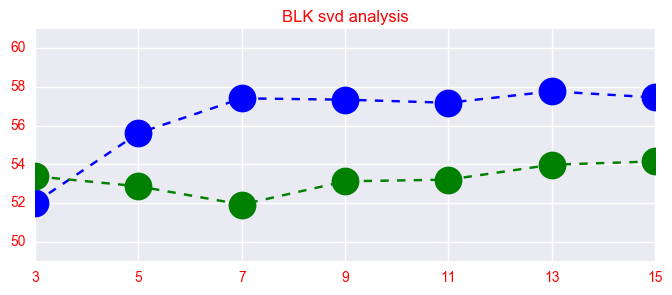

HBI n_components 3 accuracy train 51.87 accuracy test 51.55
HBI n_components 5 accuracy train 54.64 accuracy test 52.31
HBI n_components 7 accuracy train 55.09 accuracy test 52.17
HBI n_components 9 accuracy train 55.11 accuracy test 53.62
HBI n_components 11 accuracy train 56.06 accuracy test 54.11
HBI n_components 13 accuracy train 56.25 accuracy test 54.31
HBI n_components 15 accuracy train 56.51 accuracy test 53.97


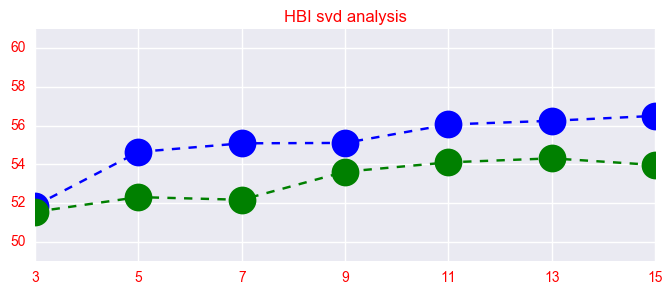

NVDA n_components 3 accuracy train 52.35 accuracy test 50.54
NVDA n_components 5 accuracy train 54.72 accuracy test 53.53
NVDA n_components 7 accuracy train 55.96 accuracy test 52.75
NVDA n_components 9 accuracy train 56.01 accuracy test 53.18
NVDA n_components 11 accuracy train 55.93 accuracy test 51.32
NVDA n_components 13 accuracy train 56.16 accuracy test 52.96
NVDA n_components 15 accuracy train 56.16 accuracy test 54.32


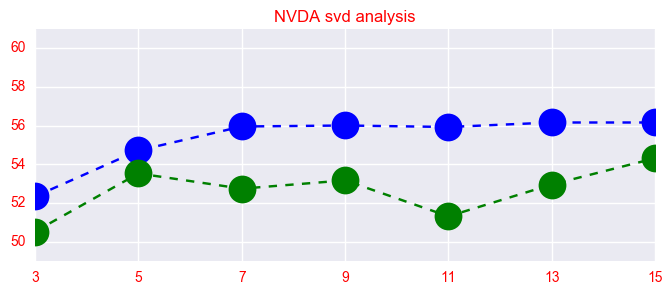

DLTR n_components 3 accuracy train 52.05 accuracy test 47.09
DLTR n_components 5 accuracy train 52.1 accuracy test 47.58
DLTR n_components 7 accuracy train 54.42 accuracy test 50.37
DLTR n_components 9 accuracy train 54.32 accuracy test 48.73
DLTR n_components 11 accuracy train 54.89 accuracy test 48.32
DLTR n_components 13 accuracy train 54.53 accuracy test 47.66
DLTR n_components 15 accuracy train 54.59 accuracy test 47.25


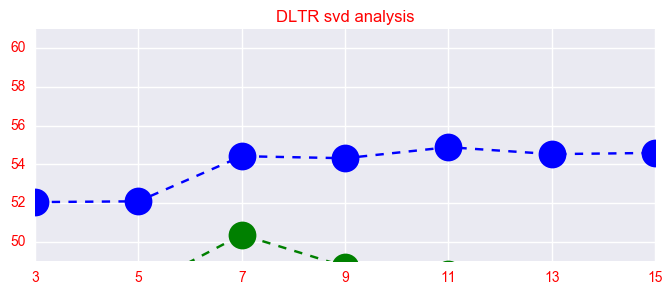

done 60%
MRO n_components 3 accuracy train 51.15 accuracy test 50.91
MRO n_components 5 accuracy train 54.38 accuracy test 51.93
MRO n_components 7 accuracy train 54.33 accuracy test 52.24
MRO n_components 9 accuracy train 54.22 accuracy test 51.73
MRO n_components 11 accuracy train 54.51 accuracy test 51.52
MRO n_components 13 accuracy train 55.01 accuracy test 52.64
MRO n_components 15 accuracy train 54.83 accuracy test 52.74


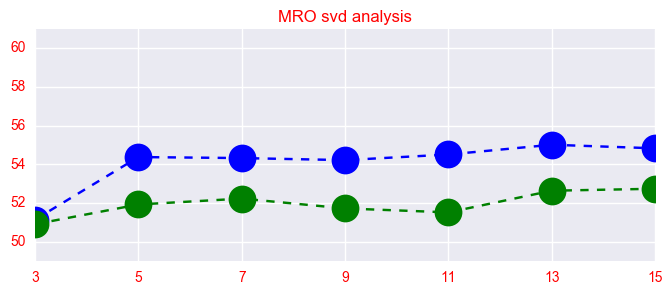

EMN n_components 3 accuracy train 52.46 accuracy test 51.05
EMN n_components 5 accuracy train 52.85 accuracy test 52.98
EMN n_components 7 accuracy train 53.83 accuracy test 54.81
EMN n_components 9 accuracy train 54.02 accuracy test 52.43
EMN n_components 11 accuracy train 54.47 accuracy test 52.7
EMN n_components 13 accuracy train 55.5 accuracy test 52.15
EMN n_components 15 accuracy train 56.03 accuracy test 52.61


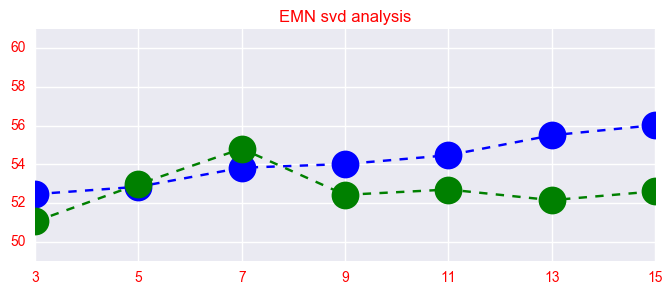

AMT n_components 3 accuracy train 51.66 accuracy test 50.21
AMT n_components 5 accuracy train 53.46 accuracy test 49.54
AMT n_components 7 accuracy train 56.11 accuracy test 52.71
AMT n_components 9 accuracy train 56.03 accuracy test 52.79
AMT n_components 11 accuracy train 56.53 accuracy test 51.79
AMT n_components 13 accuracy train 56.82 accuracy test 53.29
AMT n_components 15 accuracy train 56.53 accuracy test 54.2


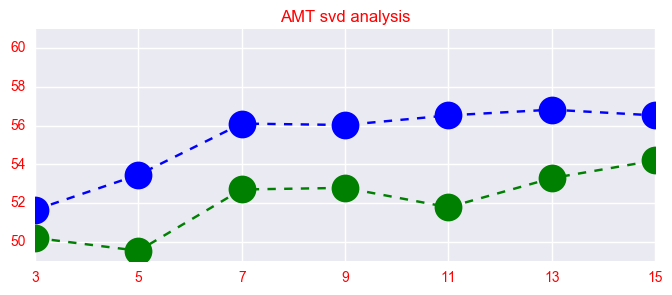

FLR n_components 3 accuracy train 51.24 accuracy test 52.45
FLR n_components 5 accuracy train 51.85 accuracy test 52.22
FLR n_components 7 accuracy train 55.04 accuracy test 51.0
FLR n_components 9 accuracy train 54.21 accuracy test 51.0
FLR n_components 11 accuracy train 55.85 accuracy test 53.14
FLR n_components 13 accuracy train 55.37 accuracy test 52.07
FLR n_components 15 accuracy train 55.78 accuracy test 53.22


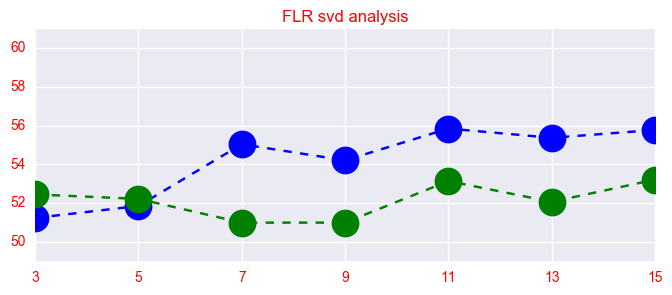

IBM n_components 3 accuracy train 53.14 accuracy test 51.28
IBM n_components 5 accuracy train 52.36 accuracy test 48.23
IBM n_components 7 accuracy train 53.07 accuracy test 48.23
IBM n_components 9 accuracy train 53.85 accuracy test 50.08
IBM n_components 11 accuracy train 54.72 accuracy test 50.0
IBM n_components 13 accuracy train 54.92 accuracy test 50.0
IBM n_components 15 accuracy train 55.6 accuracy test 48.8


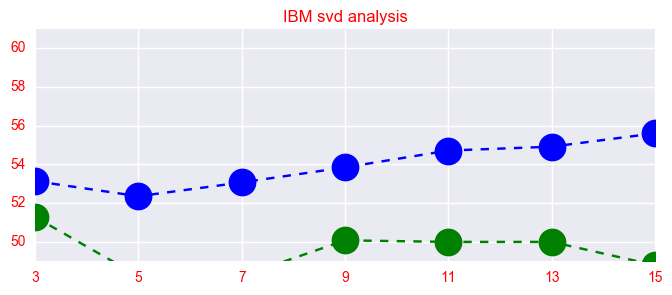

BK n_components 3 accuracy train 53.33 accuracy test 49.95
BK n_components 5 accuracy train 53.61 accuracy test 47.7
BK n_components 7 accuracy train 54.35 accuracy test 50.7
BK n_components 9 accuracy train 54.32 accuracy test 49.77
BK n_components 11 accuracy train 54.54 accuracy test 49.58
BK n_components 13 accuracy train 56.24 accuracy test 52.68
BK n_components 15 accuracy train 55.47 accuracy test 51.92


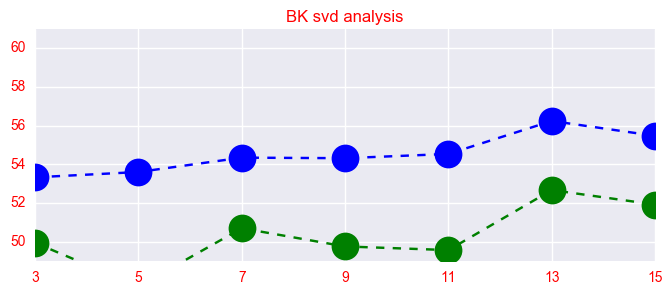

done 80%
NFX n_components 3 accuracy train 51.3 accuracy test 51.87
NFX n_components 5 accuracy train 53.43 accuracy test 53.16
NFX n_components 7 accuracy train 53.97 accuracy test 52.66
NFX n_components 9 accuracy train 54.49 accuracy test 52.96
NFX n_components 11 accuracy train 54.51 accuracy test 52.47
NFX n_components 13 accuracy train 55.26 accuracy test 53.94
NFX n_components 15 accuracy train 54.59 accuracy test 55.03


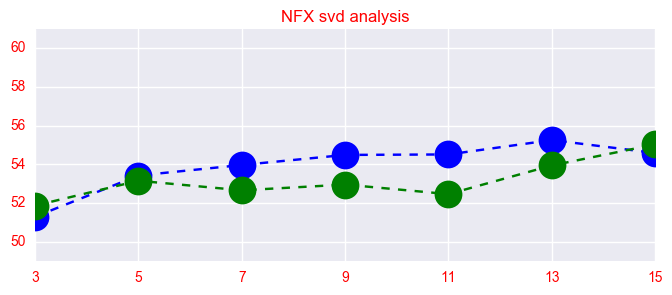

AGN n_components 3 accuracy train 54.49 accuracy test 52.03
AGN n_components 5 accuracy train 54.81 accuracy test 51.39
AGN n_components 7 accuracy train 55.92 accuracy test 50.39
AGN n_components 9 accuracy train 56.42 accuracy test 51.46
AGN n_components 11 accuracy train 55.52 accuracy test 50.68
AGN n_components 13 accuracy train 56.22 accuracy test 50.75
AGN n_components 15 accuracy train 56.62 accuracy test 50.82


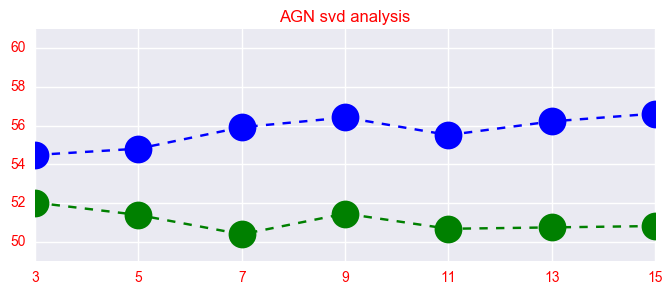

LRCX n_components 3 accuracy train 53.67 accuracy test 49.28
LRCX n_components 5 accuracy train 52.95 accuracy test 51.76
LRCX n_components 7 accuracy train 55.66 accuracy test 49.44
LRCX n_components 9 accuracy train 55.62 accuracy test 50.08
LRCX n_components 11 accuracy train 56.1 accuracy test 50.8
LRCX n_components 13 accuracy train 55.8 accuracy test 50.96
LRCX n_components 15 accuracy train 55.83 accuracy test 50.96


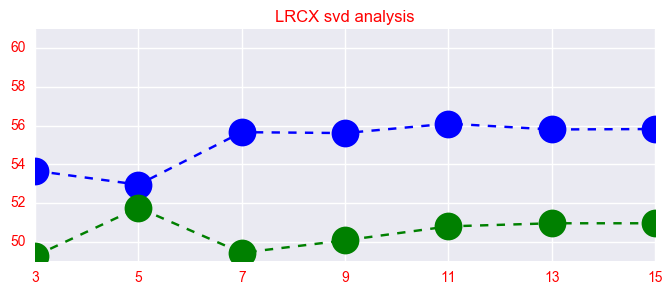

DIS n_components 3 accuracy train 52.47 accuracy test 53.39
DIS n_components 5 accuracy train 52.42 accuracy test 53.3
DIS n_components 7 accuracy train 53.91 accuracy test 52.33
DIS n_components 9 accuracy train 54.55 accuracy test 51.89
DIS n_components 11 accuracy train 55.14 accuracy test 50.13
DIS n_components 13 accuracy train 54.57 accuracy test 51.28
DIS n_components 15 accuracy train 54.59 accuracy test 52.33


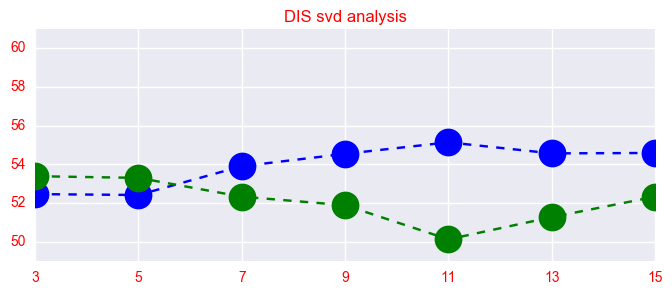

LH n_components 3 accuracy train 53.0 accuracy test 53.56
LH n_components 5 accuracy train 53.51 accuracy test 50.94
LH n_components 7 accuracy train 54.58 accuracy test 52.82
LH n_components 9 accuracy train 55.09 accuracy test 54.05
LH n_components 11 accuracy train 55.77 accuracy test 54.29
LH n_components 13 accuracy train 55.85 accuracy test 54.37
LH n_components 15 accuracy train 56.36 accuracy test 53.39


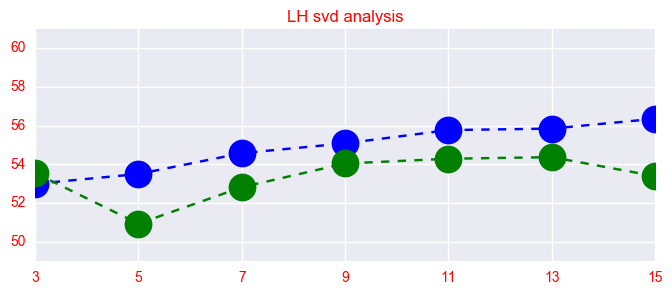

C n_components 3 accuracy train 51.96 accuracy test 52.38
C n_components 5 accuracy train 52.24 accuracy test 52.38
C n_components 7 accuracy train 52.49 accuracy test 51.85
C n_components 9 accuracy train 53.54 accuracy test 50.26
C n_components 11 accuracy train 54.03 accuracy test 52.29
C n_components 13 accuracy train 53.91 accuracy test 52.12
C n_components 15 accuracy train 54.03 accuracy test 52.03


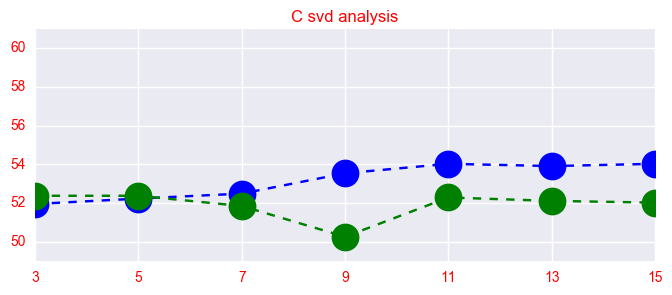

done 100%
MNK n_components 3 accuracy train 51.85 accuracy test 52.42
MNK n_components 5 accuracy train 54.68 accuracy test 52.62
MNK n_components 7 accuracy train 54.33 accuracy test 53.48
MNK n_components 9 accuracy train 54.71 accuracy test 54.21
MNK n_components 11 accuracy train 54.74 accuracy test 54.15
MNK n_components 13 accuracy train 54.97 accuracy test 54.08
MNK n_components 15 accuracy train 55.32 accuracy test 54.81


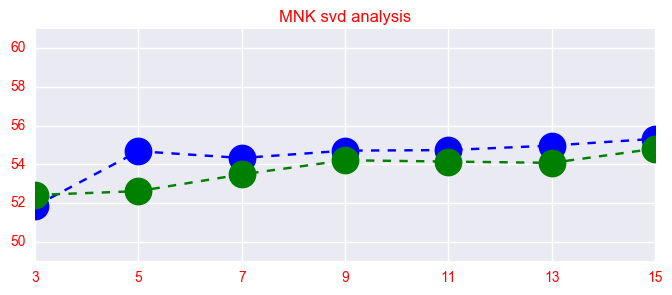

In [47]:
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_svd2, acc_test_svd2 = clf_portfolio_dic.getModelSVD(clf, features_1p2_extra_second_order, n_components_vec_1p2_extra_second_order)

In [48]:
experiment10 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with SVD - 1.2extra_second_order",
    stocks=stocks, originalFeatures=features_1p2_extra_second_order)

In [49]:
experiment10.setTrainResults(acc_train_svd2)
experiment10.setTestResults(acc_test_svd2)
print("The test accuracy (mean - std) is:")
print(experiment10.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 49.11277857  48.81259916  49.5522461   49.97892793  49.7396874
  49.75041379  49.76860699]


1.4extra and 1.4extra_second_order

In [50]:
# start linearly and finish in logspace
a1 = np.arange(3, len(features_1p4_extra)+1, 2)
a2 = np.logspace(1, math.log(len(features_1p4_extra)-1,2), num=40, base=2).astype('int32')
n_components_vec_1p4_extra = np.concatenate((a1[:10],a2[20:]),axis=0)
print(n_components_vec_1p4_extra)

[  3   5   7   9  11  13  15  17  19  21  23  26  29  33  37  42  48  54
  61  69  78  89 100 114 128 145 164 186 210 238]


DNB n_components 3 accuracy train 52.17 accuracy test 51.86
DNB n_components 5 accuracy train 52.22 accuracy test 53.1
DNB n_components 7 accuracy train 52.24 accuracy test 52.81
DNB n_components 9 accuracy train 53.45 accuracy test 53.01
DNB n_components 11 accuracy train 53.0 accuracy test 53.1
DNB n_components 13 accuracy train 53.35 accuracy test 53.4
DNB n_components 15 accuracy train 53.52 accuracy test 52.76
DNB n_components 17 accuracy train 54.46 accuracy test 54.0
DNB n_components 19 accuracy train 54.17 accuracy test 53.15
DNB n_components 21 accuracy train 54.56 accuracy test 53.7
DNB n_components 23 accuracy train 54.62 accuracy test 53.75
DNB n_components 26 accuracy train 54.93 accuracy test 53.45
DNB n_components 29 accuracy train 54.77 accuracy test 53.4
DNB n_components 33 accuracy train 54.99 accuracy test 52.41
DNB n_components 37 accuracy train 54.98 accuracy test 53.5
DNB n_components 42 accuracy train 55.11 accuracy test 53.3
DNB n_components 48 accuracy train 54

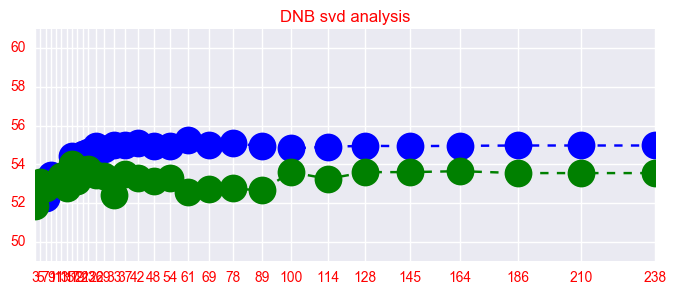

NRG n_components 3 accuracy train 54.5 accuracy test 54.14
NRG n_components 5 accuracy train 54.29 accuracy test 54.24
NRG n_components 7 accuracy train 54.4 accuracy test 54.14
NRG n_components 9 accuracy train 54.24 accuracy test 54.43
NRG n_components 11 accuracy train 54.33 accuracy test 53.46
NRG n_components 13 accuracy train 54.66 accuracy test 53.75
NRG n_components 15 accuracy train 54.61 accuracy test 54.43
NRG n_components 17 accuracy train 54.63 accuracy test 54.33
NRG n_components 19 accuracy train 54.54 accuracy test 55.01
NRG n_components 21 accuracy train 54.7 accuracy test 54.63
NRG n_components 23 accuracy train 54.89 accuracy test 54.43
NRG n_components 26 accuracy train 55.63 accuracy test 53.75
NRG n_components 29 accuracy train 55.95 accuracy test 54.92
NRG n_components 33 accuracy train 56.9 accuracy test 54.04
NRG n_components 37 accuracy train 56.6 accuracy test 53.94
NRG n_components 42 accuracy train 56.69 accuracy test 54.72
NRG n_components 48 accuracy trai

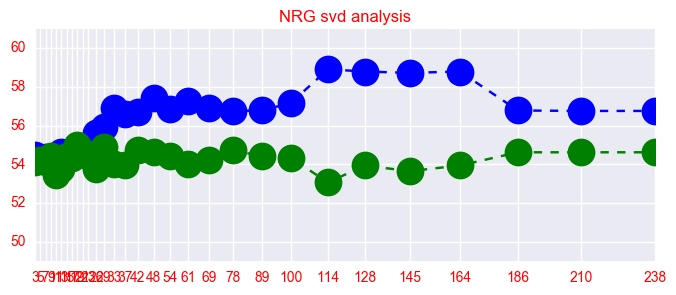

CL n_components 3 accuracy train 52.03 accuracy test 50.63
CL n_components 5 accuracy train 53.53 accuracy test 52.17
CL n_components 7 accuracy train 54.46 accuracy test 50.45
CL n_components 9 accuracy train 53.73 accuracy test 51.54
CL n_components 11 accuracy train 54.19 accuracy test 51.9
CL n_components 13 accuracy train 54.9 accuracy test 51.9
CL n_components 15 accuracy train 55.1 accuracy test 51.81
CL n_components 17 accuracy train 54.95 accuracy test 52.17
CL n_components 19 accuracy train 55.29 accuracy test 49.73
CL n_components 21 accuracy train 55.05 accuracy test 50.36
CL n_components 23 accuracy train 54.73 accuracy test 50.9
CL n_components 26 accuracy train 55.1 accuracy test 50.99
CL n_components 29 accuracy train 55.27 accuracy test 50.9
CL n_components 33 accuracy train 55.74 accuracy test 50.72
CL n_components 37 accuracy train 55.76 accuracy test 52.62
CL n_components 42 accuracy train 56.3 accuracy test 51.63
CL n_components 48 accuracy train 56.08 accuracy tes

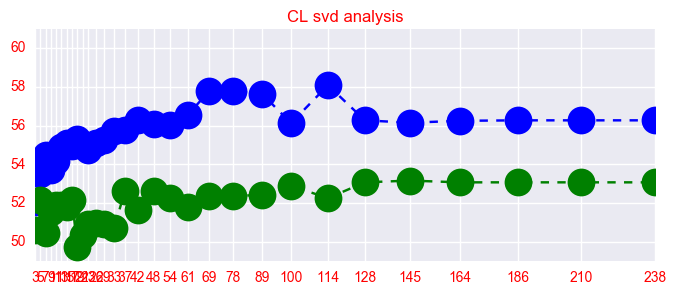

ANTM n_components 3 accuracy train 52.65 accuracy test 46.8
ANTM n_components 5 accuracy train 52.56 accuracy test 47.28
ANTM n_components 7 accuracy train 52.04 accuracy test 47.43
ANTM n_components 9 accuracy train 54.12 accuracy test 47.2
ANTM n_components 11 accuracy train 55.33 accuracy test 48.78
ANTM n_components 13 accuracy train 54.12 accuracy test 48.3
ANTM n_components 15 accuracy train 56.2 accuracy test 48.62
ANTM n_components 17 accuracy train 56.2 accuracy test 49.72
ANTM n_components 19 accuracy train 57.16 accuracy test 48.46
ANTM n_components 21 accuracy train 56.55 accuracy test 49.41
ANTM n_components 23 accuracy train 57.59 accuracy test 49.49
ANTM n_components 26 accuracy train 55.51 accuracy test 48.46
ANTM n_components 29 accuracy train 56.81 accuracy test 48.38
ANTM n_components 33 accuracy train 56.9 accuracy test 48.38
ANTM n_components 37 accuracy train 57.33 accuracy test 48.22
ANTM n_components 42 accuracy train 57.07 accuracy test 47.99
ANTM n_components 

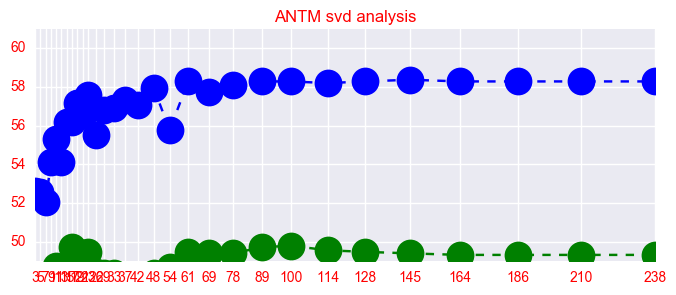

NEE n_components 3 accuracy train 54.56 accuracy test 49.71
NEE n_components 5 accuracy train 54.37 accuracy test 48.19
NEE n_components 7 accuracy train 56.1 accuracy test 49.05
NEE n_components 9 accuracy train 56.04 accuracy test 49.71
NEE n_components 11 accuracy train 56.2 accuracy test 49.81
NEE n_components 13 accuracy train 55.99 accuracy test 50.0
NEE n_components 15 accuracy train 56.04 accuracy test 50.86
NEE n_components 17 accuracy train 56.02 accuracy test 50.38
NEE n_components 19 accuracy train 56.72 accuracy test 51.52
NEE n_components 21 accuracy train 56.37 accuracy test 50.19
NEE n_components 23 accuracy train 56.45 accuracy test 50.0
NEE n_components 26 accuracy train 57.34 accuracy test 50.29
NEE n_components 29 accuracy train 57.28 accuracy test 50.76
NEE n_components 33 accuracy train 57.04 accuracy test 50.38
NEE n_components 37 accuracy train 56.77 accuracy test 50.38
NEE n_components 42 accuracy train 57.2 accuracy test 50.48
NEE n_components 48 accuracy trai

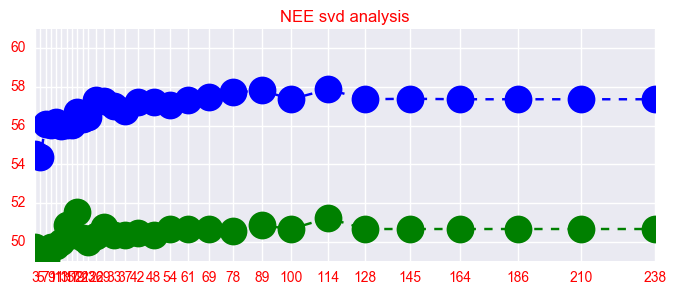

done 20%
PAYX n_components 3 accuracy train 51.22 accuracy test 51.29
PAYX n_components 5 accuracy train 51.8 accuracy test 49.92
PAYX n_components 7 accuracy train 51.73 accuracy test 50.08
PAYX n_components 9 accuracy train 52.92 accuracy test 49.35
PAYX n_components 11 accuracy train 52.97 accuracy test 48.95
PAYX n_components 13 accuracy train 52.8 accuracy test 50.24
PAYX n_components 15 accuracy train 53.57 accuracy test 50.81
PAYX n_components 17 accuracy train 53.46 accuracy test 50.73
PAYX n_components 19 accuracy train 54.13 accuracy test 49.68
PAYX n_components 21 accuracy train 54.18 accuracy test 51.13
PAYX n_components 23 accuracy train 54.18 accuracy test 49.52
PAYX n_components 26 accuracy train 54.22 accuracy test 50.89
PAYX n_components 29 accuracy train 54.08 accuracy test 50.4
PAYX n_components 33 accuracy train 54.74 accuracy test 49.6
PAYX n_components 37 accuracy train 54.76 accuracy test 49.43
PAYX n_components 42 accuracy train 54.43 accuracy test 49.84
PAYX n_

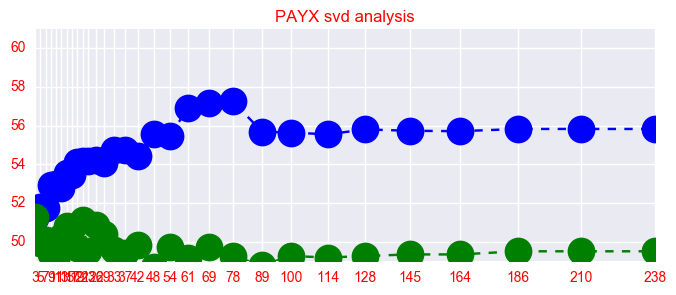

VAR n_components 3 accuracy train 51.62 accuracy test 52.51
VAR n_components 5 accuracy train 53.18 accuracy test 52.22
VAR n_components 7 accuracy train 52.6 accuracy test 51.29
VAR n_components 9 accuracy train 53.46 accuracy test 52.72
VAR n_components 11 accuracy train 54.14 accuracy test 52.22
VAR n_components 13 accuracy train 54.49 accuracy test 54.51
VAR n_components 15 accuracy train 54.36 accuracy test 54.3
VAR n_components 17 accuracy train 54.4 accuracy test 55.09
VAR n_components 19 accuracy train 54.98 accuracy test 55.23
VAR n_components 21 accuracy train 55.19 accuracy test 54.44
VAR n_components 23 accuracy train 55.81 accuracy test 53.8
VAR n_components 26 accuracy train 56.22 accuracy test 54.15
VAR n_components 29 accuracy train 56.24 accuracy test 54.01
VAR n_components 33 accuracy train 56.26 accuracy test 53.87
VAR n_components 37 accuracy train 56.84 accuracy test 52.58
VAR n_components 42 accuracy train 57.18 accuracy test 51.93
VAR n_components 48 accuracy tra

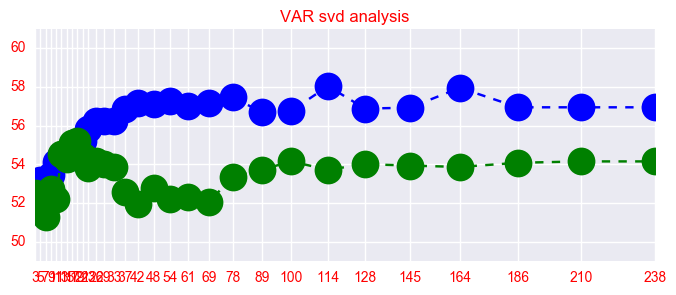

NI n_components 3 accuracy train 52.92 accuracy test 49.39
NI n_components 5 accuracy train 52.97 accuracy test 49.8
NI n_components 7 accuracy train 53.1 accuracy test 50.1
NI n_components 9 accuracy train 53.37 accuracy test 48.87
NI n_components 11 accuracy train 53.27 accuracy test 49.69
NI n_components 13 accuracy train 53.97 accuracy test 48.05
NI n_components 15 accuracy train 53.3 accuracy test 49.69
NI n_components 17 accuracy train 54.67 accuracy test 48.26
NI n_components 19 accuracy train 55.07 accuracy test 48.26
NI n_components 21 accuracy train 55.1 accuracy test 50.1
NI n_components 23 accuracy train 55.05 accuracy test 50.0
NI n_components 26 accuracy train 55.77 accuracy test 50.72
NI n_components 29 accuracy train 56.05 accuracy test 50.82
NI n_components 33 accuracy train 56.8 accuracy test 51.13
NI n_components 37 accuracy train 56.87 accuracy test 51.74
NI n_components 42 accuracy train 56.97 accuracy test 52.15
NI n_components 48 accuracy train 56.6 accuracy test

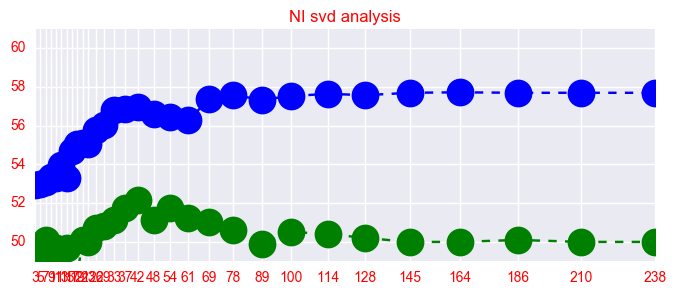

MNST n_components 3 accuracy train 52.71 accuracy test 49.59
MNST n_components 5 accuracy train 52.62 accuracy test 49.82
MNST n_components 7 accuracy train 52.54 accuracy test 50.33
MNST n_components 9 accuracy train 53.35 accuracy test 51.22
MNST n_components 11 accuracy train 53.4 accuracy test 51.15
MNST n_components 13 accuracy train 53.46 accuracy test 51.15
MNST n_components 15 accuracy train 54.38 accuracy test 51.15
MNST n_components 17 accuracy train 54.42 accuracy test 51.22
MNST n_components 19 accuracy train 54.42 accuracy test 50.55
MNST n_components 21 accuracy train 54.36 accuracy test 50.78
MNST n_components 23 accuracy train 54.48 accuracy test 50.78
MNST n_components 26 accuracy train 54.94 accuracy test 50.85
MNST n_components 29 accuracy train 54.96 accuracy test 50.55
MNST n_components 33 accuracy train 54.94 accuracy test 50.92
MNST n_components 37 accuracy train 55.0 accuracy test 51.0
MNST n_components 42 accuracy train 55.4 accuracy test 51.37
MNST n_component

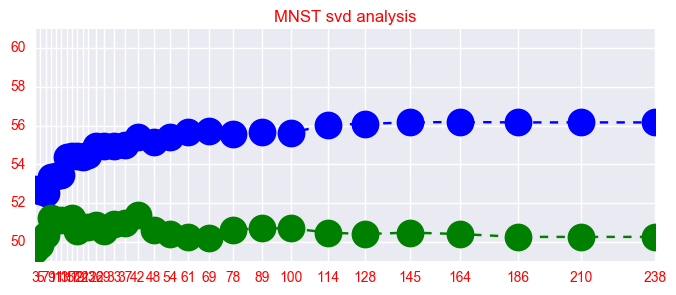

JNJ n_components 3 accuracy train 52.85 accuracy test 49.84
JNJ n_components 5 accuracy train 52.78 accuracy test 50.31
JNJ n_components 7 accuracy train 52.89 accuracy test 50.78
JNJ n_components 9 accuracy train 53.23 accuracy test 49.45
JNJ n_components 11 accuracy train 53.54 accuracy test 48.83
JNJ n_components 13 accuracy train 53.8 accuracy test 48.21
JNJ n_components 15 accuracy train 54.05 accuracy test 48.05
JNJ n_components 17 accuracy train 55.29 accuracy test 48.99
JNJ n_components 19 accuracy train 54.54 accuracy test 48.75
JNJ n_components 21 accuracy train 55.29 accuracy test 48.75
JNJ n_components 23 accuracy train 54.54 accuracy test 50.7
JNJ n_components 26 accuracy train 55.11 accuracy test 49.92
JNJ n_components 29 accuracy train 54.76 accuracy test 49.84
JNJ n_components 33 accuracy train 55.16 accuracy test 49.53
JNJ n_components 37 accuracy train 55.11 accuracy test 49.84
JNJ n_components 42 accuracy train 54.91 accuracy test 50.08
JNJ n_components 48 accuracy t

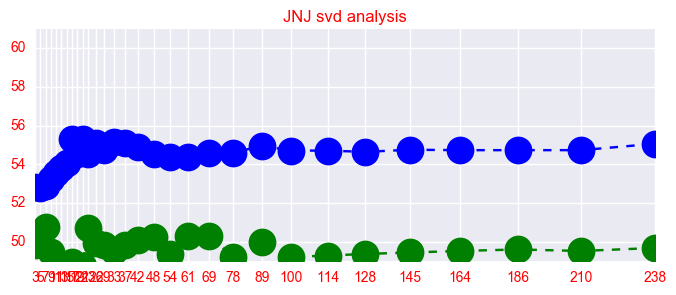

TGNA n_components 3 accuracy train 54.1 accuracy test 48.51
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 57.81 accuracy test 50.08
TGNA n_components 13 accuracy train 55.27 accuracy test 49.29
TGNA n_components 15 accuracy train 59.18 accuracy test 50.78
TGNA n_components 17 accuracy train 60.55 accuracy test 50.55
TGNA n_components 19 accuracy train 61.52 accuracy test 50.08
TGNA n_components 21 accuracy train 60.55 accuracy test 49.61
TGNA n_components 23 accuracy train 60.74 accuracy test 49.06
TGNA n_components 26 accuracy train 60.74 accuracy test 49.92
TGNA n_components 29 accuracy train 54.3 accuracy test 48.04
TGNA n_components 33 accuracy train 54.3 accuracy test 48.04
TGNA n_components 37 accuracy train 54.3 accuracy test 48.04
TGNA n_components 42 accuracy train 54.3 accuracy test 48.04
TGNA n_components 48

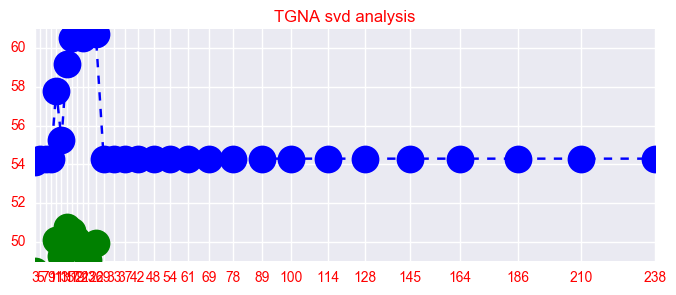

done 40%
NOV n_components 3 accuracy train 51.53 accuracy test 51.86
NOV n_components 5 accuracy train 52.21 accuracy test 52.1
NOV n_components 7 accuracy train 52.11 accuracy test 51.78
NOV n_components 9 accuracy train 53.91 accuracy test 50.08
NOV n_components 11 accuracy train 53.68 accuracy test 50.0
NOV n_components 13 accuracy train 53.57 accuracy test 50.57
NOV n_components 15 accuracy train 54.91 accuracy test 51.94
NOV n_components 17 accuracy train 55.15 accuracy test 51.05
NOV n_components 19 accuracy train 55.67 accuracy test 51.21
NOV n_components 21 accuracy train 56.38 accuracy test 49.92
NOV n_components 23 accuracy train 56.09 accuracy test 50.16
NOV n_components 26 accuracy train 56.04 accuracy test 51.78
NOV n_components 29 accuracy train 56.01 accuracy test 51.7
NOV n_components 33 accuracy train 56.35 accuracy test 51.86
NOV n_components 37 accuracy train 56.82 accuracy test 51.62
NOV n_components 42 accuracy train 56.85 accuracy test 51.94
NOV n_components 48 ac

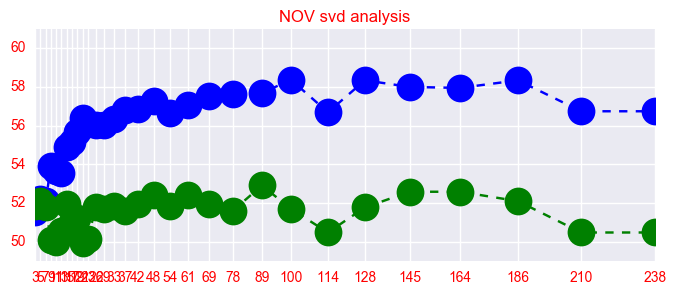

FIS n_components 3 accuracy train 51.12 accuracy test 51.49
FIS n_components 5 accuracy train 51.54 accuracy test 52.0
FIS n_components 7 accuracy train 51.71 accuracy test 51.06
FIS n_components 9 accuracy train 51.2 accuracy test 53.31
FIS n_components 11 accuracy train 51.67 accuracy test 52.15
FIS n_components 13 accuracy train 52.88 accuracy test 52.08
FIS n_components 15 accuracy train 52.9 accuracy test 51.71
FIS n_components 17 accuracy train 53.48 accuracy test 49.96
FIS n_components 19 accuracy train 53.58 accuracy test 50.18
FIS n_components 21 accuracy train 54.45 accuracy test 51.64
FIS n_components 23 accuracy train 54.22 accuracy test 51.06
FIS n_components 26 accuracy train 55.35 accuracy test 50.55
FIS n_components 29 accuracy train 56.17 accuracy test 51.35
FIS n_components 33 accuracy train 55.9 accuracy test 50.47
FIS n_components 37 accuracy train 55.98 accuracy test 50.69
FIS n_components 42 accuracy train 56.58 accuracy test 50.47
FIS n_components 48 accuracy tra

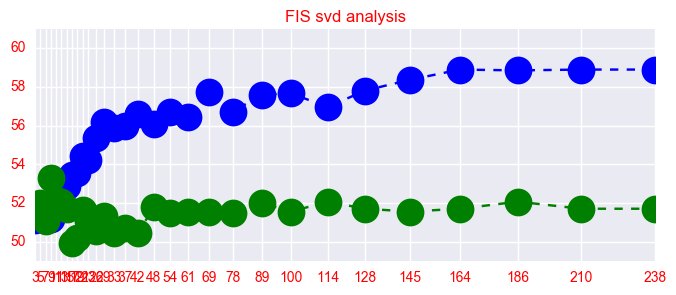

BLK n_components 3 accuracy train 52.51 accuracy test 51.84
BLK n_components 5 accuracy train 54.44 accuracy test 50.39
BLK n_components 7 accuracy train 54.57 accuracy test 50.99
BLK n_components 9 accuracy train 55.55 accuracy test 52.78
BLK n_components 11 accuracy train 56.52 accuracy test 53.64
BLK n_components 13 accuracy train 56.68 accuracy test 53.98
BLK n_components 15 accuracy train 57.02 accuracy test 53.56
BLK n_components 17 accuracy train 57.14 accuracy test 54.93
BLK n_components 19 accuracy train 57.07 accuracy test 54.5
BLK n_components 21 accuracy train 56.95 accuracy test 54.07
BLK n_components 23 accuracy train 57.79 accuracy test 54.16
BLK n_components 26 accuracy train 57.98 accuracy test 53.81
BLK n_components 29 accuracy train 57.77 accuracy test 54.93
BLK n_components 33 accuracy train 58.27 accuracy test 55.01
BLK n_components 37 accuracy train 58.57 accuracy test 54.93
BLK n_components 42 accuracy train 58.68 accuracy test 54.67
BLK n_components 48 accuracy 

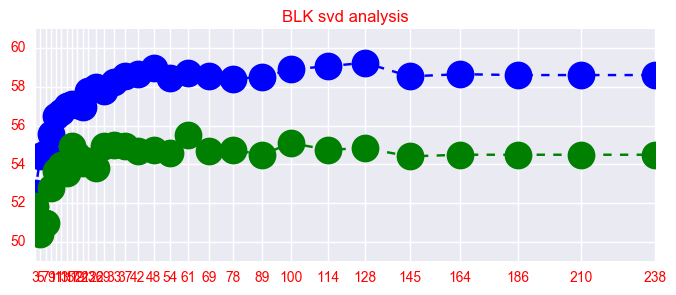

HBI n_components 3 accuracy train 53.76 accuracy test 52.04
HBI n_components 5 accuracy train 53.82 accuracy test 52.17
HBI n_components 7 accuracy train 53.84 accuracy test 51.97
HBI n_components 9 accuracy train 55.81 accuracy test 51.76
HBI n_components 11 accuracy train 55.41 accuracy test 51.55
HBI n_components 13 accuracy train 55.13 accuracy test 52.31
HBI n_components 15 accuracy train 56.02 accuracy test 52.59
HBI n_components 17 accuracy train 55.76 accuracy test 51.76
HBI n_components 19 accuracy train 55.98 accuracy test 51.14
HBI n_components 21 accuracy train 56.53 accuracy test 51.41
HBI n_components 23 accuracy train 56.23 accuracy test 51.21
HBI n_components 26 accuracy train 57.25 accuracy test 51.9
HBI n_components 29 accuracy train 56.72 accuracy test 51.28
HBI n_components 33 accuracy train 56.97 accuracy test 52.17
HBI n_components 37 accuracy train 57.1 accuracy test 51.35
HBI n_components 42 accuracy train 57.8 accuracy test 51.97
HBI n_components 48 accuracy tr

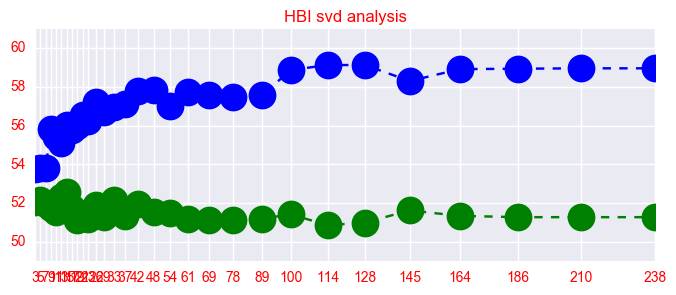

NVDA n_components 3 accuracy train 51.93 accuracy test 52.96
NVDA n_components 5 accuracy train 52.19 accuracy test 53.1
NVDA n_components 7 accuracy train 51.83 accuracy test 52.82
NVDA n_components 9 accuracy train 54.93 accuracy test 51.82
NVDA n_components 11 accuracy train 55.39 accuracy test 51.89
NVDA n_components 13 accuracy train 55.7 accuracy test 52.68
NVDA n_components 15 accuracy train 55.65 accuracy test 52.75
NVDA n_components 17 accuracy train 55.08 accuracy test 53.03
NVDA n_components 19 accuracy train 56.37 accuracy test 52.25
NVDA n_components 21 accuracy train 56.27 accuracy test 50.18
NVDA n_components 23 accuracy train 56.21 accuracy test 50.82
NVDA n_components 26 accuracy train 56.55 accuracy test 51.96
NVDA n_components 29 accuracy train 56.65 accuracy test 50.46
NVDA n_components 33 accuracy train 56.81 accuracy test 52.82
NVDA n_components 37 accuracy train 56.63 accuracy test 52.61
NVDA n_components 42 accuracy train 56.96 accuracy test 52.03
NVDA n_compone

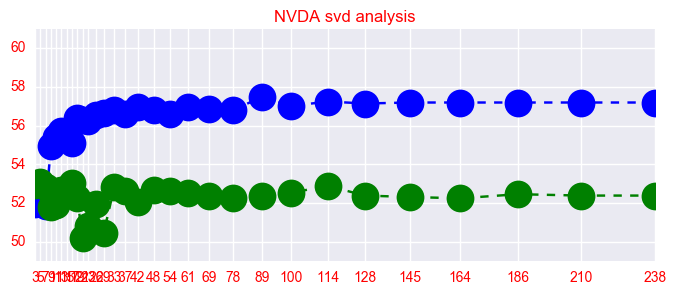

DLTR n_components 3 accuracy train 50.66 accuracy test 51.68
DLTR n_components 5 accuracy train 51.97 accuracy test 49.63
DLTR n_components 7 accuracy train 52.41 accuracy test 50.86
DLTR n_components 9 accuracy train 52.5 accuracy test 50.53
DLTR n_components 11 accuracy train 52.9 accuracy test 50.62
DLTR n_components 13 accuracy train 53.15 accuracy test 50.53
DLTR n_components 15 accuracy train 52.9 accuracy test 50.21
DLTR n_components 17 accuracy train 53.03 accuracy test 49.96
DLTR n_components 19 accuracy train 53.9 accuracy test 50.7
DLTR n_components 21 accuracy train 53.92 accuracy test 49.22
DLTR n_components 23 accuracy train 54.13 accuracy test 50.29
DLTR n_components 26 accuracy train 53.9 accuracy test 50.04
DLTR n_components 29 accuracy train 53.77 accuracy test 49.63
DLTR n_components 33 accuracy train 54.66 accuracy test 49.3
DLTR n_components 37 accuracy train 55.23 accuracy test 49.38
DLTR n_components 42 accuracy train 55.27 accuracy test 49.3
DLTR n_components 48

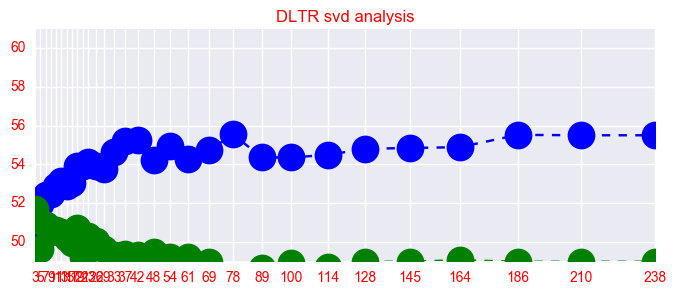

done 60%
MRO n_components 3 accuracy train 51.1 accuracy test 49.59
MRO n_components 5 accuracy train 50.41 accuracy test 47.97
MRO n_components 7 accuracy train 52.34 accuracy test 50.91
MRO n_components 9 accuracy train 52.53 accuracy test 50.61
MRO n_components 11 accuracy train 53.06 accuracy test 50.91
MRO n_components 13 accuracy train 53.53 accuracy test 49.49
MRO n_components 15 accuracy train 53.8 accuracy test 50.61
MRO n_components 17 accuracy train 54.11 accuracy test 51.52
MRO n_components 19 accuracy train 54.75 accuracy test 51.22
MRO n_components 21 accuracy train 54.86 accuracy test 50.91
MRO n_components 23 accuracy train 54.86 accuracy test 51.02
MRO n_components 26 accuracy train 54.56 accuracy test 50.81
MRO n_components 29 accuracy train 54.14 accuracy test 52.44
MRO n_components 33 accuracy train 54.8 accuracy test 51.12
MRO n_components 37 accuracy train 55.39 accuracy test 50.61
MRO n_components 42 accuracy train 55.33 accuracy test 50.51
MRO n_components 48 ac

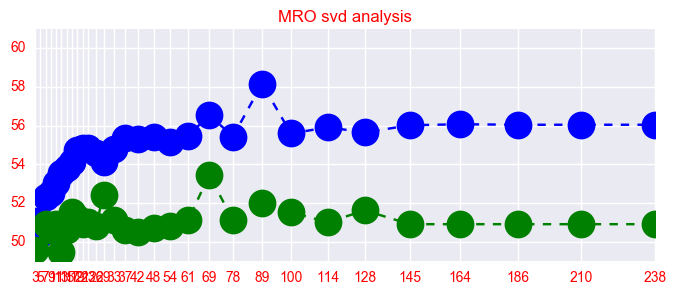

EMN n_components 3 accuracy train 52.7 accuracy test 51.42
EMN n_components 5 accuracy train 53.06 accuracy test 50.14
EMN n_components 7 accuracy train 53.83 accuracy test 49.31
EMN n_components 9 accuracy train 54.02 accuracy test 52.06
EMN n_components 11 accuracy train 53.73 accuracy test 51.97
EMN n_components 13 accuracy train 54.14 accuracy test 51.88
EMN n_components 15 accuracy train 54.04 accuracy test 52.52
EMN n_components 17 accuracy train 54.33 accuracy test 52.06
EMN n_components 19 accuracy train 54.5 accuracy test 51.7
EMN n_components 21 accuracy train 54.45 accuracy test 51.97
EMN n_components 23 accuracy train 54.31 accuracy test 51.42
EMN n_components 26 accuracy train 54.33 accuracy test 51.6
EMN n_components 29 accuracy train 55.05 accuracy test 51.51
EMN n_components 33 accuracy train 54.64 accuracy test 50.96
EMN n_components 37 accuracy train 54.81 accuracy test 51.6
EMN n_components 42 accuracy train 54.69 accuracy test 51.88
EMN n_components 48 accuracy trai

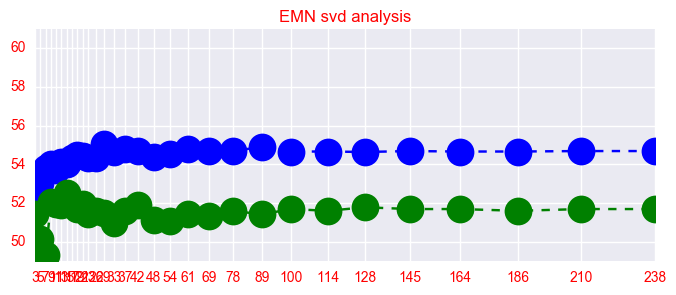

AMT n_components 3 accuracy train 52.62 accuracy test 49.96
AMT n_components 5 accuracy train 52.42 accuracy test 49.88
AMT n_components 7 accuracy train 51.88 accuracy test 49.54
AMT n_components 9 accuracy train 54.18 accuracy test 52.21
AMT n_components 11 accuracy train 54.67 accuracy test 52.21
AMT n_components 13 accuracy train 54.82 accuracy test 52.54
AMT n_components 15 accuracy train 55.22 accuracy test 52.71
AMT n_components 17 accuracy train 55.69 accuracy test 52.71
AMT n_components 19 accuracy train 56.18 accuracy test 53.21
AMT n_components 21 accuracy train 55.91 accuracy test 53.71
AMT n_components 23 accuracy train 55.76 accuracy test 53.87
AMT n_components 26 accuracy train 56.63 accuracy test 54.04
AMT n_components 29 accuracy train 56.33 accuracy test 52.87
AMT n_components 33 accuracy train 56.33 accuracy test 52.71
AMT n_components 37 accuracy train 56.33 accuracy test 52.96
AMT n_components 42 accuracy train 57.57 accuracy test 53.62
AMT n_components 48 accuracy

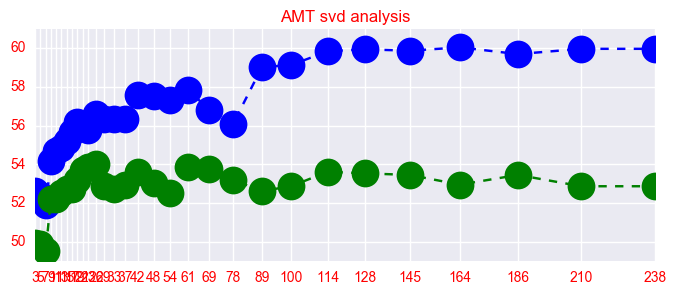

FLR n_components 3 accuracy train 52.07 accuracy test 49.0
FLR n_components 5 accuracy train 51.59 accuracy test 49.0
FLR n_components 7 accuracy train 53.28 accuracy test 50.92
FLR n_components 9 accuracy train 54.11 accuracy test 52.76
FLR n_components 11 accuracy train 54.3 accuracy test 51.68
FLR n_components 13 accuracy train 54.16 accuracy test 51.23
FLR n_components 15 accuracy train 53.99 accuracy test 51.61
FLR n_components 17 accuracy train 54.97 accuracy test 50.54
FLR n_components 19 accuracy train 55.73 accuracy test 50.84
FLR n_components 21 accuracy train 55.9 accuracy test 50.77
FLR n_components 23 accuracy train 55.8 accuracy test 49.85
FLR n_components 26 accuracy train 56.13 accuracy test 50.31
FLR n_components 29 accuracy train 55.97 accuracy test 51.53
FLR n_components 33 accuracy train 56.04 accuracy test 49.77
FLR n_components 37 accuracy train 56.51 accuracy test 50.69
FLR n_components 42 accuracy train 55.63 accuracy test 50.92
FLR n_components 48 accuracy trai

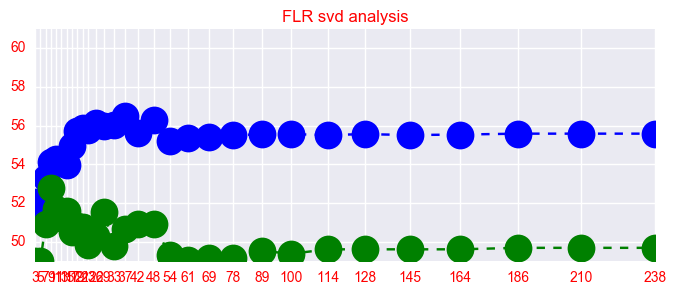

IBM n_components 3 accuracy train 50.8 accuracy test 53.21
IBM n_components 5 accuracy train 53.78 accuracy test 52.73
IBM n_components 7 accuracy train 53.94 accuracy test 52.17
IBM n_components 9 accuracy train 54.63 accuracy test 52.41
IBM n_components 11 accuracy train 54.65 accuracy test 51.93
IBM n_components 13 accuracy train 53.89 accuracy test 51.36
IBM n_components 15 accuracy train 53.98 accuracy test 51.61
IBM n_components 17 accuracy train 54.56 accuracy test 52.25
IBM n_components 19 accuracy train 55.43 accuracy test 51.04
IBM n_components 21 accuracy train 55.36 accuracy test 51.52
IBM n_components 23 accuracy train 55.4 accuracy test 50.88
IBM n_components 26 accuracy train 55.47 accuracy test 52.01
IBM n_components 29 accuracy train 55.69 accuracy test 50.08
IBM n_components 33 accuracy train 55.69 accuracy test 51.2
IBM n_components 37 accuracy train 55.63 accuracy test 49.6
IBM n_components 42 accuracy train 55.76 accuracy test 49.76
IBM n_components 48 accuracy tra

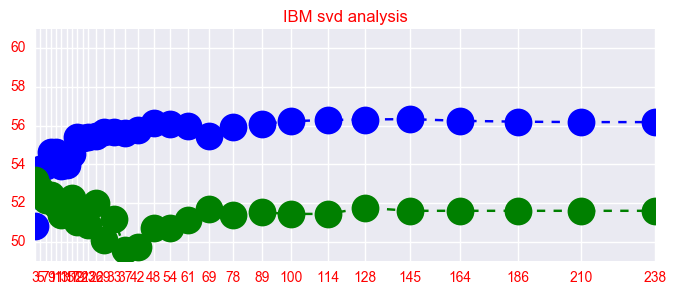

BK n_components 3 accuracy train 52.07 accuracy test 48.45
BK n_components 5 accuracy train 52.76 accuracy test 46.95
BK n_components 7 accuracy train 53.39 accuracy test 48.36
BK n_components 9 accuracy train 54.46 accuracy test 53.52
BK n_components 11 accuracy train 54.62 accuracy test 52.96
BK n_components 13 accuracy train 54.87 accuracy test 52.68
BK n_components 15 accuracy train 54.84 accuracy test 53.05
BK n_components 17 accuracy train 55.31 accuracy test 52.68
BK n_components 19 accuracy train 55.91 accuracy test 52.21
BK n_components 21 accuracy train 56.21 accuracy test 53.52
BK n_components 23 accuracy train 56.02 accuracy test 52.49
BK n_components 26 accuracy train 56.43 accuracy test 52.96
BK n_components 29 accuracy train 56.57 accuracy test 52.68
BK n_components 33 accuracy train 56.82 accuracy test 51.74
BK n_components 37 accuracy train 56.79 accuracy test 51.64
BK n_components 42 accuracy train 56.52 accuracy test 51.74
BK n_components 48 accuracy train 56.32 accu

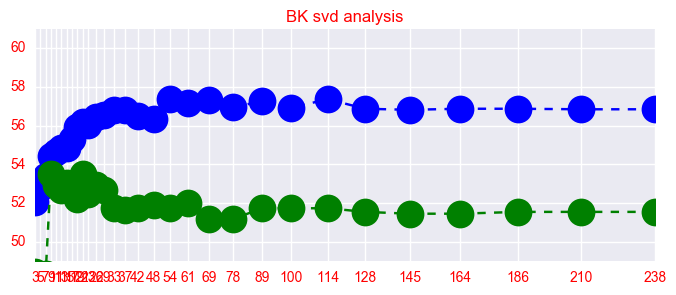

done 80%
NFX n_components 3 accuracy train 51.17 accuracy test 52.96
NFX n_components 5 accuracy train 51.77 accuracy test 53.16
NFX n_components 7 accuracy train 51.67 accuracy test 51.97
NFX n_components 9 accuracy train 52.78 accuracy test 51.08
NFX n_components 11 accuracy train 52.98 accuracy test 50.79
NFX n_components 13 accuracy train 52.66 accuracy test 50.59
NFX n_components 15 accuracy train 54.07 accuracy test 53.35
NFX n_components 17 accuracy train 53.85 accuracy test 52.56
NFX n_components 19 accuracy train 54.14 accuracy test 53.25
NFX n_components 21 accuracy train 54.84 accuracy test 52.86
NFX n_components 23 accuracy train 54.54 accuracy test 53.25
NFX n_components 26 accuracy train 55.01 accuracy test 53.16
NFX n_components 29 accuracy train 55.21 accuracy test 52.56
NFX n_components 33 accuracy train 55.53 accuracy test 52.96
NFX n_components 37 accuracy train 56.62 accuracy test 52.27
NFX n_components 42 accuracy train 56.29 accuracy test 53.06
NFX n_components 48

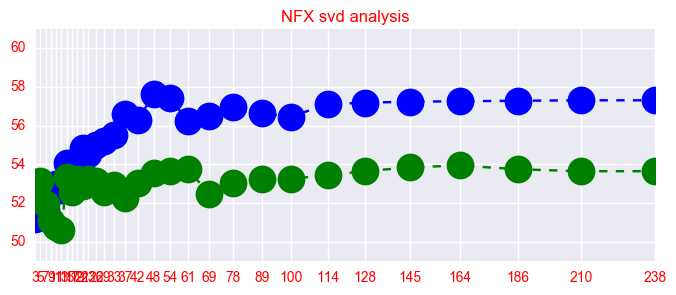

AGN n_components 3 accuracy train 53.51 accuracy test 50.32
AGN n_components 5 accuracy train 55.29 accuracy test 52.46
AGN n_components 7 accuracy train 55.21 accuracy test 53.03
AGN n_components 9 accuracy train 56.02 accuracy test 52.6
AGN n_components 11 accuracy train 56.22 accuracy test 52.25
AGN n_components 13 accuracy train 56.25 accuracy test 53.17
AGN n_components 15 accuracy train 55.37 accuracy test 52.82
AGN n_components 17 accuracy train 56.22 accuracy test 53.39
AGN n_components 19 accuracy train 56.22 accuracy test 52.6
AGN n_components 21 accuracy train 56.25 accuracy test 51.53
AGN n_components 23 accuracy train 57.18 accuracy test 51.18
AGN n_components 26 accuracy train 57.07 accuracy test 52.32
AGN n_components 29 accuracy train 57.38 accuracy test 52.03
AGN n_components 33 accuracy train 57.28 accuracy test 52.25
AGN n_components 37 accuracy train 57.05 accuracy test 52.6
AGN n_components 42 accuracy train 56.85 accuracy test 52.32
AGN n_components 48 accuracy tr

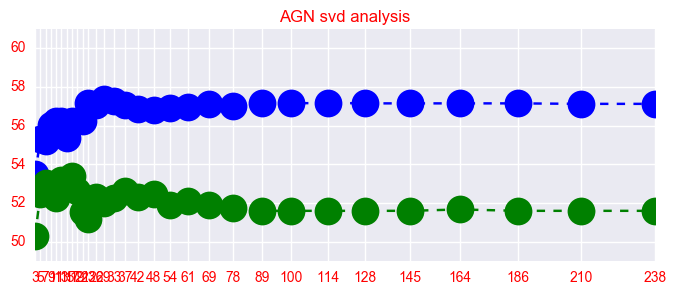

LRCX n_components 3 accuracy train 51.49 accuracy test 52.72
LRCX n_components 5 accuracy train 52.28 accuracy test 51.36
LRCX n_components 7 accuracy train 53.35 accuracy test 51.52
LRCX n_components 9 accuracy train 52.91 accuracy test 51.12
LRCX n_components 11 accuracy train 53.51 accuracy test 49.12
LRCX n_components 13 accuracy train 53.86 accuracy test 49.92
LRCX n_components 15 accuracy train 53.86 accuracy test 51.36
LRCX n_components 17 accuracy train 54.74 accuracy test 50.16
LRCX n_components 19 accuracy train 54.69 accuracy test 50.08
LRCX n_components 21 accuracy train 55.25 accuracy test 50.64
LRCX n_components 23 accuracy train 55.46 accuracy test 51.68
LRCX n_components 26 accuracy train 55.66 accuracy test 51.04
LRCX n_components 29 accuracy train 55.71 accuracy test 50.96
LRCX n_components 33 accuracy train 55.8 accuracy test 52.4
LRCX n_components 37 accuracy train 56.08 accuracy test 52.0
LRCX n_components 42 accuracy train 55.69 accuracy test 51.36
LRCX n_componen

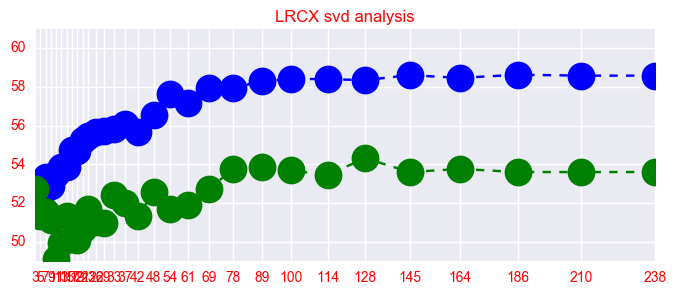

DIS n_components 3 accuracy train 53.04 accuracy test 53.48
DIS n_components 5 accuracy train 52.51 accuracy test 52.33
DIS n_components 7 accuracy train 52.51 accuracy test 50.93
DIS n_components 9 accuracy train 52.58 accuracy test 51.98
DIS n_components 11 accuracy train 52.24 accuracy test 50.31
DIS n_components 13 accuracy train 53.88 accuracy test 51.28
DIS n_components 15 accuracy train 55.07 accuracy test 51.37
DIS n_components 17 accuracy train 55.53 accuracy test 50.93
DIS n_components 19 accuracy train 55.19 accuracy test 50.75
DIS n_components 21 accuracy train 55.28 accuracy test 50.22
DIS n_components 23 accuracy train 55.25 accuracy test 50.57
DIS n_components 26 accuracy train 54.8 accuracy test 51.98
DIS n_components 29 accuracy train 55.44 accuracy test 50.66
DIS n_components 33 accuracy train 55.53 accuracy test 52.16
DIS n_components 37 accuracy train 55.96 accuracy test 51.72
DIS n_components 42 accuracy train 55.82 accuracy test 51.19
DIS n_components 48 accuracy 

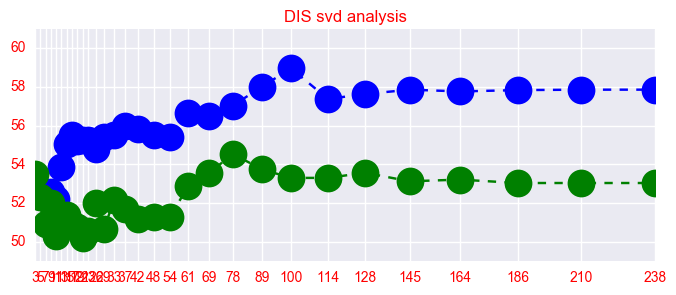

LH n_components 3 accuracy train 52.22 accuracy test 51.59
LH n_components 5 accuracy train 52.88 accuracy test 53.23
LH n_components 7 accuracy train 53.15 accuracy test 53.56
LH n_components 9 accuracy train 54.05 accuracy test 52.49
LH n_components 11 accuracy train 53.93 accuracy test 53.07
LH n_components 13 accuracy train 54.29 accuracy test 53.07
LH n_components 15 accuracy train 55.26 accuracy test 53.56
LH n_components 17 accuracy train 55.05 accuracy test 53.56
LH n_components 19 accuracy train 55.11 accuracy test 53.48
LH n_components 21 accuracy train 55.44 accuracy test 53.48
LH n_components 23 accuracy train 56.0 accuracy test 54.29
LH n_components 26 accuracy train 56.3 accuracy test 54.37
LH n_components 29 accuracy train 56.0 accuracy test 55.27
LH n_components 33 accuracy train 56.43 accuracy test 53.97
LH n_components 37 accuracy train 56.28 accuracy test 54.87
LH n_components 42 accuracy train 56.88 accuracy test 54.37
LH n_components 48 accuracy train 57.12 accurac

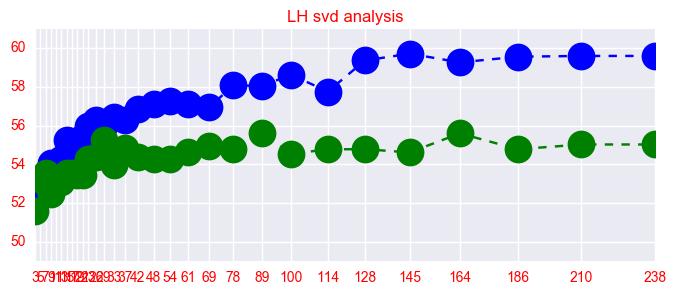

C n_components 3 accuracy train 52.73 accuracy test 49.29
C n_components 5 accuracy train 53.17 accuracy test 49.74
C n_components 7 accuracy train 52.68 accuracy test 51.06
C n_components 9 accuracy train 53.31 accuracy test 49.47
C n_components 11 accuracy train 52.8 accuracy test 51.94
C n_components 13 accuracy train 53.01 accuracy test 52.29
C n_components 15 accuracy train 52.8 accuracy test 51.76
C n_components 17 accuracy train 52.94 accuracy test 52.38
C n_components 19 accuracy train 52.87 accuracy test 51.59
C n_components 21 accuracy train 52.98 accuracy test 51.5
C n_components 23 accuracy train 53.59 accuracy test 50.0
C n_components 26 accuracy train 53.24 accuracy test 50.97
C n_components 29 accuracy train 55.15 accuracy test 48.85
C n_components 33 accuracy train 54.85 accuracy test 48.59
C n_components 37 accuracy train 54.87 accuracy test 48.15
C n_components 42 accuracy train 55.36 accuracy test 48.68
C n_components 48 accuracy train 55.59 accuracy test 51.41
C n_c

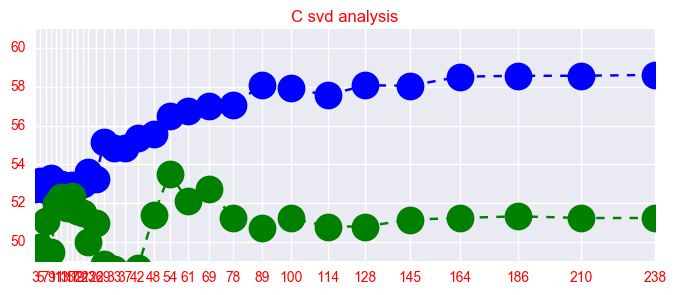

done 100%
MNK n_components 3 accuracy train 53.78 accuracy test 53.42
MNK n_components 5 accuracy train 54.04 accuracy test 52.55
MNK n_components 7 accuracy train 53.92 accuracy test 53.95
MNK n_components 9 accuracy train 54.3 accuracy test 53.55
MNK n_components 11 accuracy train 54.13 accuracy test 53.48
MNK n_components 13 accuracy train 54.13 accuracy test 54.08
MNK n_components 15 accuracy train 54.16 accuracy test 54.01
MNK n_components 17 accuracy train 54.71 accuracy test 53.15
MNK n_components 19 accuracy train 55.91 accuracy test 52.42
MNK n_components 21 accuracy train 56.61 accuracy test 51.49
MNK n_components 23 accuracy train 56.34 accuracy test 51.56
MNK n_components 26 accuracy train 56.58 accuracy test 52.29
MNK n_components 29 accuracy train 55.73 accuracy test 52.82
MNK n_components 33 accuracy train 55.88 accuracy test 53.09
MNK n_components 37 accuracy train 56.26 accuracy test 52.89
MNK n_components 42 accuracy train 56.08 accuracy test 53.02
MNK n_components 48

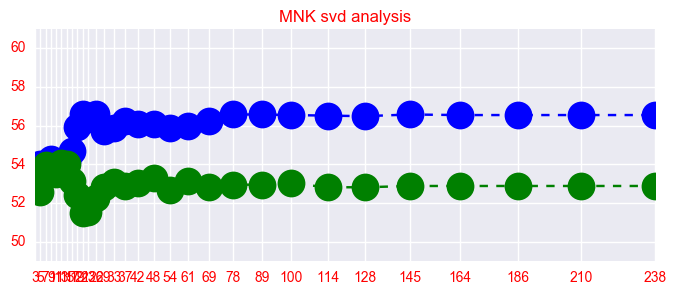

In [51]:
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_svd3, acc_test_svd3 = clf_portfolio_dic.getModelSVD(clf, features_1p4_extra, n_components_vec_1p4_extra)

In [52]:
experiment11 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with SVD - 1.4extra",
    stocks=stocks, originalFeatures=features_1p4_extra)

In [53]:
experiment11.setTrainResults(acc_train_svd3)
experiment11.setTestResults(acc_test_svd3)
print("The test accuracy (mean - std) is:")
print(experiment11.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 49.29595535  48.91622894  49.41768838  49.67877901  49.90948227
  49.72674616  50.35849708  50.10713047  49.72653557  49.83684     49.83763882
  50.24296735  49.71929746  49.71127086  49.66438744  49.72792305
  49.99317923  49.90894923  50.0073602   50.08445216  49.76343801
  49.95213686  49.99856069  49.8936574   49.96372827  49.99285644
  49.96010843  49.99548526  49.89129946  49.90251922]


In [54]:
a1 = np.arange(3, len(features_1p4_extra_second_order)+1, 2)
a2 = np.logspace(1, math.log(len(features_1p4_extra_second_order)-1,2), num=40, base=2).astype('int32')
n_components_vec_1p4_extra_second_order = np.concatenate((a1[:11],a2[15:]),axis=0)
print(n_components_vec_1p4_extra_second_order)

[  3   5   7   9  11  13  15  17  19  21  23  18  22  25  29  34  40  46
  54  63  73  85  98 114 133 155 180 209 243 282 328 381 443 515 599 696]


DNB n_components 3 accuracy train 50.29 accuracy test 49.68
DNB n_components 5 accuracy train 50.11 accuracy test 48.73
DNB n_components 7 accuracy train 50.46 accuracy test 49.68
DNB n_components 9 accuracy train 51.43 accuracy test 50.17
DNB n_components 11 accuracy train 51.57 accuracy test 50.37
DNB n_components 13 accuracy train 52.06 accuracy test 50.22
DNB n_components 15 accuracy train 51.87 accuracy test 49.63
DNB n_components 17 accuracy train 51.43 accuracy test 48.88
DNB n_components 19 accuracy train 51.43 accuracy test 49.48
DNB n_components 21 accuracy train 51.7 accuracy test 49.58
DNB n_components 23 accuracy train 51.96 accuracy test 49.83
DNB n_components 18 accuracy train 51.2 accuracy test 49.23
DNB n_components 22 accuracy train 51.74 accuracy test 49.98
DNB n_components 25 accuracy train 51.67 accuracy test 50.67
DNB n_components 29 accuracy train 51.27 accuracy test 49.08
DNB n_components 34 accuracy train 52.31 accuracy test 48.29
DNB n_components 40 accuracy t

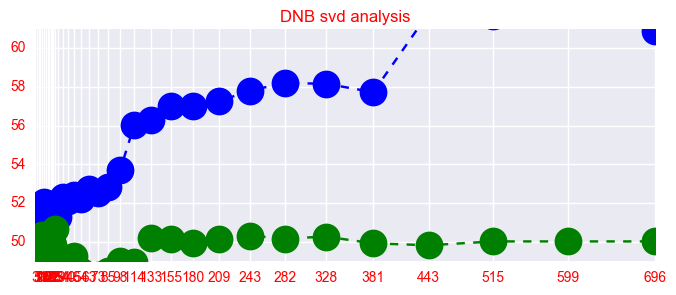

NRG n_components 3 accuracy train 53.85 accuracy test 54.63
NRG n_components 5 accuracy train 54.24 accuracy test 55.31
NRG n_components 7 accuracy train 54.4 accuracy test 54.82
NRG n_components 9 accuracy train 54.61 accuracy test 54.92
NRG n_components 11 accuracy train 54.54 accuracy test 54.72
NRG n_components 13 accuracy train 54.75 accuracy test 55.01
NRG n_components 15 accuracy train 54.86 accuracy test 54.72
NRG n_components 17 accuracy train 54.8 accuracy test 54.82
NRG n_components 19 accuracy train 54.61 accuracy test 54.33
NRG n_components 21 accuracy train 54.77 accuracy test 54.33
NRG n_components 23 accuracy train 54.45 accuracy test 54.04
NRG n_components 18 accuracy train 54.45 accuracy test 54.33
NRG n_components 22 accuracy train 54.47 accuracy test 54.14
NRG n_components 25 accuracy train 54.73 accuracy test 54.72
NRG n_components 29 accuracy train 54.89 accuracy test 54.24
NRG n_components 34 accuracy train 55.07 accuracy test 54.82
NRG n_components 40 accuracy t

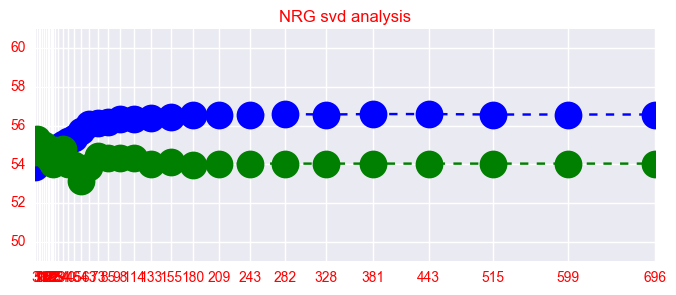

CL n_components 3 accuracy train 49.78 accuracy test 49.19
CL n_components 5 accuracy train 50.12 accuracy test 49.82
CL n_components 7 accuracy train 51.0 accuracy test 48.46
CL n_components 9 accuracy train 50.88 accuracy test 49.73
CL n_components 11 accuracy train 50.27 accuracy test 49.01
CL n_components 13 accuracy train 51.62 accuracy test 50.63
CL n_components 15 accuracy train 52.33 accuracy test 48.64
CL n_components 17 accuracy train 52.35 accuracy test 49.46
CL n_components 19 accuracy train 52.33 accuracy test 48.92
CL n_components 21 accuracy train 52.97 accuracy test 50.72
CL n_components 23 accuracy train 51.89 accuracy test 52.17
CL n_components 18 accuracy train 51.99 accuracy test 50.45
CL n_components 22 accuracy train 52.33 accuracy test 52.8
CL n_components 25 accuracy train 52.01 accuracy test 50.63
CL n_components 29 accuracy train 52.11 accuracy test 52.89
CL n_components 34 accuracy train 52.25 accuracy test 49.91
CL n_components 40 accuracy train 52.33 accura

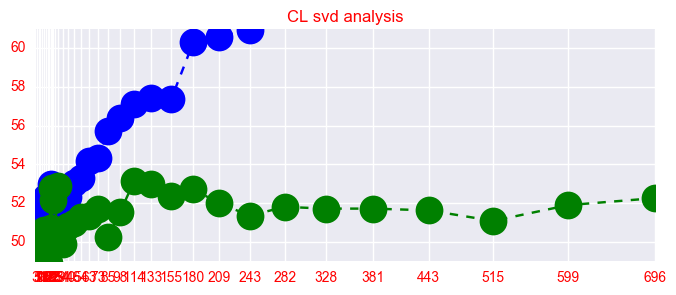

ANTM n_components 3 accuracy train 52.65 accuracy test 46.88
ANTM n_components 5 accuracy train 52.56 accuracy test 46.72
ANTM n_components 7 accuracy train 53.17 accuracy test 46.49
ANTM n_components 9 accuracy train 53.43 accuracy test 47.59
ANTM n_components 11 accuracy train 54.29 accuracy test 48.07
ANTM n_components 13 accuracy train 53.25 accuracy test 47.28
ANTM n_components 15 accuracy train 53.77 accuracy test 47.12
ANTM n_components 17 accuracy train 54.03 accuracy test 47.28
ANTM n_components 19 accuracy train 54.29 accuracy test 48.07
ANTM n_components 21 accuracy train 54.38 accuracy test 48.38
ANTM n_components 23 accuracy train 54.29 accuracy test 48.7
ANTM n_components 18 accuracy train 54.55 accuracy test 47.59
ANTM n_components 22 accuracy train 54.12 accuracy test 48.54
ANTM n_components 25 accuracy train 53.77 accuracy test 48.46
ANTM n_components 29 accuracy train 54.47 accuracy test 48.86
ANTM n_components 34 accuracy train 54.03 accuracy test 48.38
ANTM n_compon

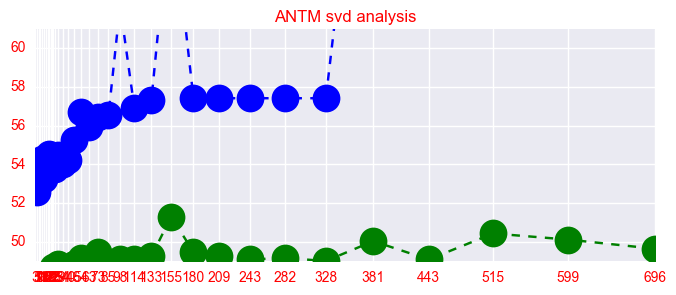

NEE n_components 3 accuracy train 52.95 accuracy test 47.81
NEE n_components 5 accuracy train 52.92 accuracy test 47.91
NEE n_components 7 accuracy train 53.43 accuracy test 48.67
NEE n_components 9 accuracy train 53.14 accuracy test 49.24
NEE n_components 11 accuracy train 54.02 accuracy test 48.57
NEE n_components 13 accuracy train 53.97 accuracy test 48.57
NEE n_components 15 accuracy train 54.64 accuracy test 48.86
NEE n_components 17 accuracy train 54.64 accuracy test 49.24
NEE n_components 19 accuracy train 54.27 accuracy test 49.43
NEE n_components 21 accuracy train 54.43 accuracy test 49.24
NEE n_components 23 accuracy train 54.45 accuracy test 49.24
NEE n_components 18 accuracy train 54.62 accuracy test 49.05
NEE n_components 22 accuracy train 54.7 accuracy test 49.14
NEE n_components 25 accuracy train 54.27 accuracy test 49.24
NEE n_components 29 accuracy train 54.59 accuracy test 48.29
NEE n_components 34 accuracy train 54.83 accuracy test 49.05
NEE n_components 40 accuracy 

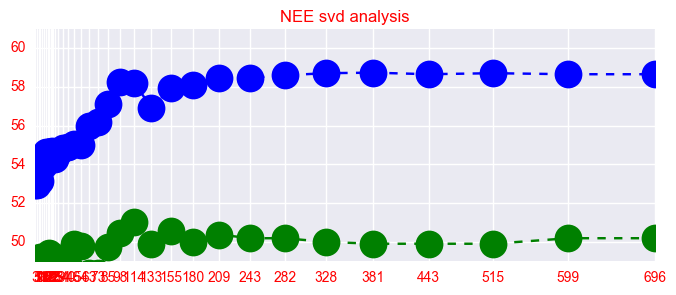

done 20%
PAYX n_components 3 accuracy train 50.62 accuracy test 51.53
PAYX n_components 5 accuracy train 50.71 accuracy test 51.53
PAYX n_components 7 accuracy train 51.59 accuracy test 51.29
PAYX n_components 9 accuracy train 52.08 accuracy test 51.78
PAYX n_components 11 accuracy train 51.62 accuracy test 50.24
PAYX n_components 13 accuracy train 51.64 accuracy test 50.32
PAYX n_components 15 accuracy train 51.64 accuracy test 50.24
PAYX n_components 17 accuracy train 51.57 accuracy test 50.32
PAYX n_components 19 accuracy train 51.73 accuracy test 50.32
PAYX n_components 21 accuracy train 52.48 accuracy test 51.21
PAYX n_components 23 accuracy train 52.41 accuracy test 50.32
PAYX n_components 18 accuracy train 51.5 accuracy test 50.08
PAYX n_components 22 accuracy train 51.43 accuracy test 50.97
PAYX n_components 25 accuracy train 52.11 accuracy test 49.52
PAYX n_components 29 accuracy train 52.9 accuracy test 51.21
PAYX n_components 34 accuracy train 52.46 accuracy test 51.05
PAYX 

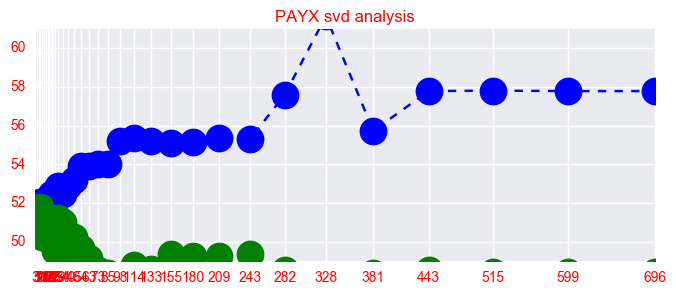

VAR n_components 3 accuracy train 51.4 accuracy test 49.71
VAR n_components 5 accuracy train 51.49 accuracy test 49.64
VAR n_components 7 accuracy train 51.15 accuracy test 49.71
VAR n_components 9 accuracy train 51.49 accuracy test 48.5
VAR n_components 11 accuracy train 51.06 accuracy test 50.14
VAR n_components 13 accuracy train 51.34 accuracy test 51.36
VAR n_components 15 accuracy train 52.02 accuracy test 51.29
VAR n_components 17 accuracy train 51.42 accuracy test 51.43
VAR n_components 19 accuracy train 51.74 accuracy test 51.0
VAR n_components 21 accuracy train 51.02 accuracy test 52.22
VAR n_components 23 accuracy train 51.68 accuracy test 51.86
VAR n_components 18 accuracy train 51.47 accuracy test 50.86
VAR n_components 22 accuracy train 51.1 accuracy test 52.22
VAR n_components 25 accuracy train 51.32 accuracy test 51.29
VAR n_components 29 accuracy train 51.77 accuracy test 52.01
VAR n_components 34 accuracy train 51.85 accuracy test 50.79
VAR n_components 40 accuracy tra

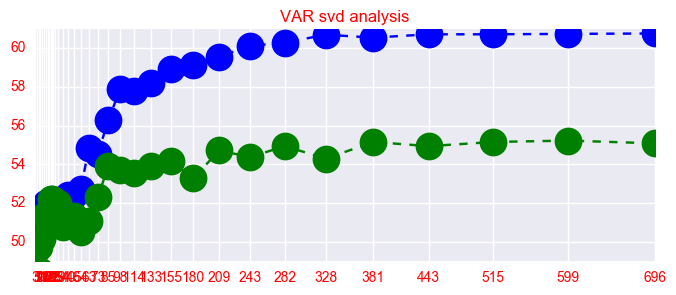

NI n_components 3 accuracy train 52.6 accuracy test 48.16
NI n_components 5 accuracy train 52.6 accuracy test 48.16
NI n_components 7 accuracy train 52.52 accuracy test 47.95
NI n_components 9 accuracy train 52.77 accuracy test 47.85
NI n_components 11 accuracy train 52.55 accuracy test 47.75
NI n_components 13 accuracy train 52.7 accuracy test 48.77
NI n_components 15 accuracy train 52.72 accuracy test 49.18
NI n_components 17 accuracy train 53.25 accuracy test 48.67
NI n_components 19 accuracy train 53.45 accuracy test 48.77
NI n_components 21 accuracy train 53.65 accuracy test 48.05
NI n_components 23 accuracy train 53.6 accuracy test 48.05
NI n_components 18 accuracy train 53.45 accuracy test 48.36
NI n_components 22 accuracy train 53.67 accuracy test 48.05
NI n_components 25 accuracy train 53.5 accuracy test 48.05
NI n_components 29 accuracy train 53.87 accuracy test 48.16
NI n_components 34 accuracy train 53.75 accuracy test 48.87
NI n_components 40 accuracy train 53.82 accuracy 

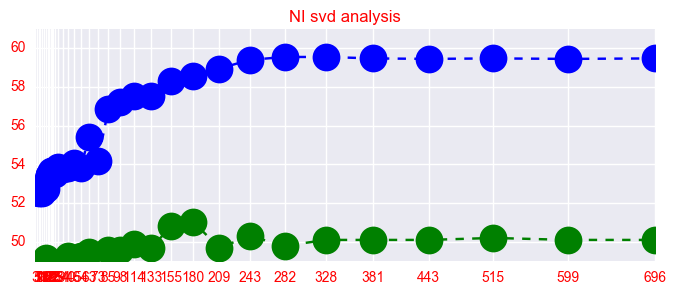

MNST n_components 3 accuracy train 52.27 accuracy test 49.0
MNST n_components 5 accuracy train 52.27 accuracy test 49.3
MNST n_components 7 accuracy train 51.72 accuracy test 49.82
MNST n_components 9 accuracy train 51.79 accuracy test 49.59
MNST n_components 11 accuracy train 52.33 accuracy test 49.82
MNST n_components 13 accuracy train 53.56 accuracy test 51.29
MNST n_components 15 accuracy train 53.42 accuracy test 51.66
MNST n_components 17 accuracy train 53.42 accuracy test 51.52
MNST n_components 19 accuracy train 53.35 accuracy test 51.37
MNST n_components 21 accuracy train 53.25 accuracy test 51.29
MNST n_components 23 accuracy train 53.14 accuracy test 50.85
MNST n_components 18 accuracy train 53.46 accuracy test 51.52
MNST n_components 22 accuracy train 53.46 accuracy test 51.0
MNST n_components 25 accuracy train 53.37 accuracy test 50.26
MNST n_components 29 accuracy train 53.31 accuracy test 49.96
MNST n_components 34 accuracy train 53.37 accuracy test 49.74
MNST n_componen

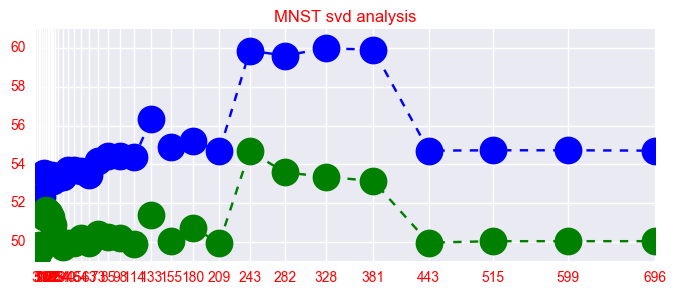

JNJ n_components 3 accuracy train 52.23 accuracy test 50.62
JNJ n_components 5 accuracy train 52.21 accuracy test 50.94
JNJ n_components 7 accuracy train 52.12 accuracy test 51.4
JNJ n_components 9 accuracy train 52.32 accuracy test 50.0
JNJ n_components 11 accuracy train 52.54 accuracy test 49.92
JNJ n_components 13 accuracy train 53.05 accuracy test 49.06
JNJ n_components 15 accuracy train 52.61 accuracy test 50.23
JNJ n_components 17 accuracy train 53.58 accuracy test 49.45
JNJ n_components 19 accuracy train 53.87 accuracy test 48.75
JNJ n_components 21 accuracy train 53.76 accuracy test 49.92
JNJ n_components 23 accuracy train 53.6 accuracy test 48.6
JNJ n_components 18 accuracy train 53.85 accuracy test 48.91
JNJ n_components 22 accuracy train 54.0 accuracy test 46.49
JNJ n_components 25 accuracy train 53.56 accuracy test 48.28
JNJ n_components 29 accuracy train 53.83 accuracy test 49.22
JNJ n_components 34 accuracy train 53.52 accuracy test 48.36
JNJ n_components 40 accuracy trai

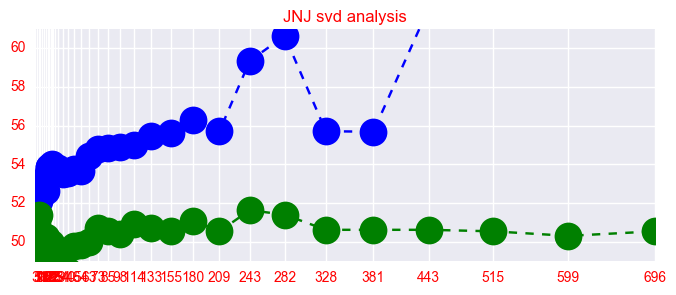

TGNA n_components 3 accuracy train 54.1 accuracy test 48.35
TGNA n_components 5 accuracy train 53.52 accuracy test 47.96
TGNA n_components 7 accuracy train 55.08 accuracy test 48.12
TGNA n_components 9 accuracy train 55.27 accuracy test 48.51
TGNA n_components 11 accuracy train 58.4 accuracy test 48.98
TGNA n_components 13 accuracy train 55.27 accuracy test 48.51
TGNA n_components 15 accuracy train 56.05 accuracy test 48.51
TGNA n_components 17 accuracy train 58.4 accuracy test 50.39
TGNA n_components 19 accuracy train 60.16 accuracy test 51.1
TGNA n_components 21 accuracy train 59.18 accuracy test 49.69
TGNA n_components 23 accuracy train 58.79 accuracy test 49.84
TGNA n_components 18 accuracy train 58.98 accuracy test 50.08
TGNA n_components 22 accuracy train 59.38 accuracy test 49.76
TGNA n_components 25 accuracy train 60.35 accuracy test 50.31
TGNA n_components 29 accuracy train 58.2 accuracy test 49.61
TGNA n_components 34 accuracy train 60.35 accuracy test 49.61
TGNA n_components

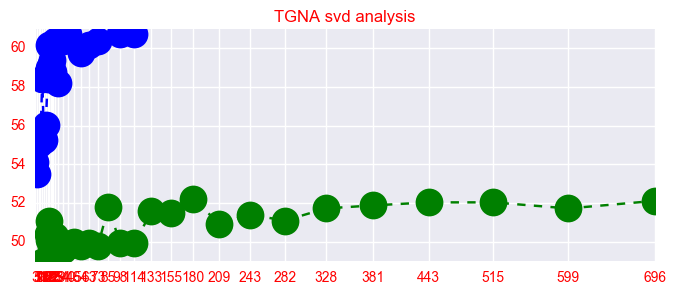

done 40%
NOV n_components 3 accuracy train 51.09 accuracy test 52.43
NOV n_components 5 accuracy train 51.27 accuracy test 51.78
NOV n_components 7 accuracy train 51.72 accuracy test 51.78
NOV n_components 9 accuracy train 51.64 accuracy test 50.73
NOV n_components 11 accuracy train 52.26 accuracy test 51.78
NOV n_components 13 accuracy train 51.98 accuracy test 51.29
NOV n_components 15 accuracy train 51.53 accuracy test 51.21
NOV n_components 17 accuracy train 52.29 accuracy test 50.73
NOV n_components 19 accuracy train 52.58 accuracy test 51.46
NOV n_components 21 accuracy train 52.63 accuracy test 50.89
NOV n_components 23 accuracy train 53.1 accuracy test 50.08
NOV n_components 18 accuracy train 52.24 accuracy test 51.54
NOV n_components 22 accuracy train 52.81 accuracy test 51.05
NOV n_components 25 accuracy train 53.16 accuracy test 49.68
NOV n_components 29 accuracy train 53.44 accuracy test 50.24
NOV n_components 34 accuracy train 53.39 accuracy test 50.57
NOV n_components 40 

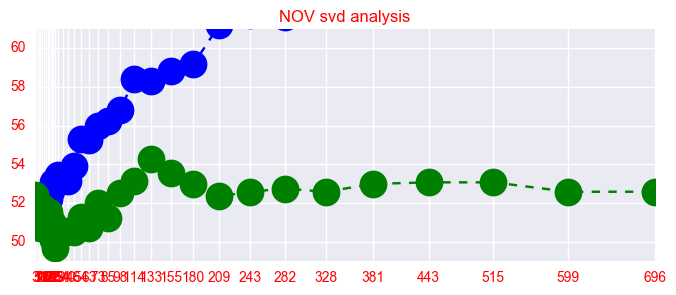

FIS n_components 3 accuracy train 51.31 accuracy test 46.1
FIS n_components 5 accuracy train 50.5 accuracy test 47.27
FIS n_components 7 accuracy train 50.07 accuracy test 49.45
FIS n_components 9 accuracy train 50.54 accuracy test 47.78
FIS n_components 11 accuracy train 50.46 accuracy test 48.07
FIS n_components 13 accuracy train 49.88 accuracy test 48.0
FIS n_components 15 accuracy train 49.8 accuracy test 47.56
FIS n_components 17 accuracy train 50.2 accuracy test 48.8
FIS n_components 19 accuracy train 50.73 accuracy test 48.51
FIS n_components 21 accuracy train 51.56 accuracy test 48.87
FIS n_components 23 accuracy train 50.95 accuracy test 50.04
FIS n_components 18 accuracy train 50.39 accuracy test 48.0
FIS n_components 22 accuracy train 51.39 accuracy test 48.94
FIS n_components 25 accuracy train 52.07 accuracy test 49.82
FIS n_components 29 accuracy train 52.01 accuracy test 48.43
FIS n_components 34 accuracy train 51.99 accuracy test 49.24
FIS n_components 40 accuracy train 

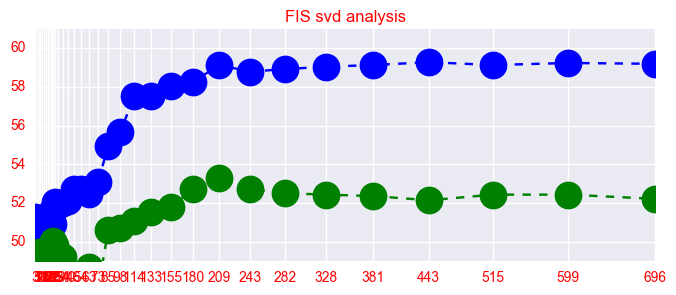

BLK n_components 3 accuracy train 49.4 accuracy test 48.16
BLK n_components 5 accuracy train 49.76 accuracy test 48.84
BLK n_components 7 accuracy train 50.31 accuracy test 46.36
BLK n_components 9 accuracy train 49.92 accuracy test 45.67
BLK n_components 11 accuracy train 50.62 accuracy test 47.73
BLK n_components 13 accuracy train 50.19 accuracy test 48.84
BLK n_components 15 accuracy train 50.85 accuracy test 49.61
BLK n_components 17 accuracy train 50.47 accuracy test 50.04
BLK n_components 19 accuracy train 50.47 accuracy test 49.53
BLK n_components 21 accuracy train 50.69 accuracy test 49.61
BLK n_components 23 accuracy train 50.76 accuracy test 50.04
BLK n_components 18 accuracy train 50.47 accuracy test 50.21
BLK n_components 22 accuracy train 50.81 accuracy test 50.04
BLK n_components 25 accuracy train 50.78 accuracy test 47.81
BLK n_components 29 accuracy train 51.94 accuracy test 49.1
BLK n_components 34 accuracy train 52.26 accuracy test 49.79
BLK n_components 40 accuracy t

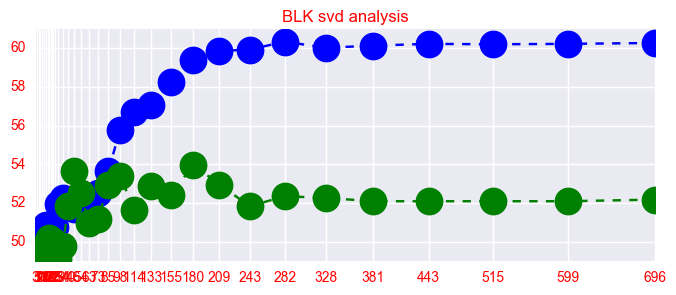

HBI n_components 3 accuracy train 51.7 accuracy test 51.83
HBI n_components 5 accuracy train 52.04 accuracy test 51.55
HBI n_components 7 accuracy train 52.13 accuracy test 51.28
HBI n_components 9 accuracy train 51.81 accuracy test 50.66
HBI n_components 11 accuracy train 51.53 accuracy test 51.07
HBI n_components 13 accuracy train 51.53 accuracy test 51.0
HBI n_components 15 accuracy train 52.15 accuracy test 52.73
HBI n_components 17 accuracy train 52.46 accuracy test 51.69
HBI n_components 19 accuracy train 52.36 accuracy test 51.9
HBI n_components 21 accuracy train 52.51 accuracy test 51.48
HBI n_components 23 accuracy train 52.7 accuracy test 51.9
HBI n_components 18 accuracy train 52.55 accuracy test 52.45
HBI n_components 22 accuracy train 52.63 accuracy test 51.69
HBI n_components 25 accuracy train 52.68 accuracy test 52.1
HBI n_components 29 accuracy train 53.25 accuracy test 51.69
HBI n_components 34 accuracy train 53.33 accuracy test 50.72
HBI n_components 40 accuracy train

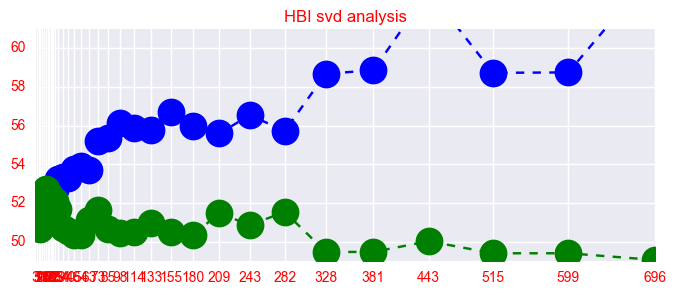

NVDA n_components 3 accuracy train 51.24 accuracy test 49.89
NVDA n_components 5 accuracy train 51.29 accuracy test 49.54
NVDA n_components 7 accuracy train 51.08 accuracy test 49.39
NVDA n_components 9 accuracy train 51.21 accuracy test 49.82
NVDA n_components 11 accuracy train 51.39 accuracy test 50.25
NVDA n_components 13 accuracy train 51.37 accuracy test 50.68
NVDA n_components 15 accuracy train 51.44 accuracy test 48.04
NVDA n_components 17 accuracy train 51.7 accuracy test 48.25
NVDA n_components 19 accuracy train 51.99 accuracy test 48.11
NVDA n_components 21 accuracy train 52.14 accuracy test 47.82
NVDA n_components 23 accuracy train 52.09 accuracy test 48.39
NVDA n_components 18 accuracy train 52.24 accuracy test 48.54
NVDA n_components 22 accuracy train 52.22 accuracy test 48.32
NVDA n_components 25 accuracy train 51.81 accuracy test 50.11
NVDA n_components 29 accuracy train 51.47 accuracy test 50.96
NVDA n_components 34 accuracy train 52.01 accuracy test 50.18
NVDA n_compon

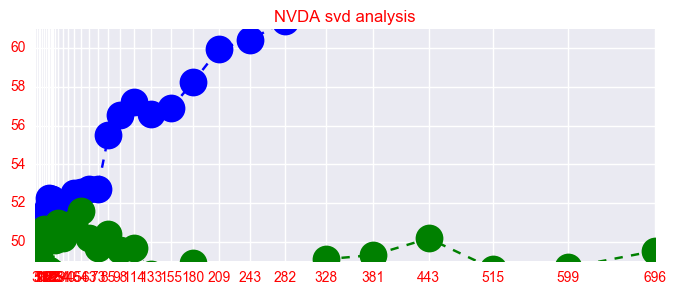

DLTR n_components 3 accuracy train 50.32 accuracy test 46.51
DLTR n_components 5 accuracy train 50.99 accuracy test 51.27
DLTR n_components 7 accuracy train 51.04 accuracy test 51.03
DLTR n_components 9 accuracy train 52.31 accuracy test 47.5
DLTR n_components 11 accuracy train 51.93 accuracy test 47.91
DLTR n_components 13 accuracy train 51.21 accuracy test 49.3
DLTR n_components 15 accuracy train 51.33 accuracy test 48.65
DLTR n_components 17 accuracy train 50.95 accuracy test 48.24
DLTR n_components 19 accuracy train 51.12 accuracy test 50.04
DLTR n_components 21 accuracy train 51.23 accuracy test 47.66
DLTR n_components 23 accuracy train 51.99 accuracy test 47.91
DLTR n_components 18 accuracy train 51.16 accuracy test 49.47
DLTR n_components 22 accuracy train 52.24 accuracy test 49.14
DLTR n_components 25 accuracy train 52.24 accuracy test 48.07
DLTR n_components 29 accuracy train 51.76 accuracy test 49.14
DLTR n_components 34 accuracy train 51.57 accuracy test 48.65
DLTR n_compone

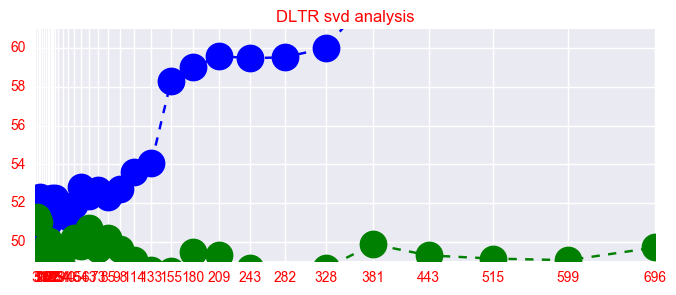

done 60%
MRO n_components 3 accuracy train 50.49 accuracy test 50.2
MRO n_components 5 accuracy train 51.39 accuracy test 50.71
MRO n_components 7 accuracy train 49.62 accuracy test 47.76
MRO n_components 9 accuracy train 50.62 accuracy test 50.91
MRO n_components 11 accuracy train 50.25 accuracy test 51.73
MRO n_components 13 accuracy train 50.52 accuracy test 51.93
MRO n_components 15 accuracy train 50.94 accuracy test 52.24
MRO n_components 17 accuracy train 50.86 accuracy test 52.03
MRO n_components 19 accuracy train 50.86 accuracy test 51.52
MRO n_components 21 accuracy train 51.52 accuracy test 50.1
MRO n_components 23 accuracy train 51.18 accuracy test 50.71
MRO n_components 18 accuracy train 51.18 accuracy test 52.03
MRO n_components 22 accuracy train 51.65 accuracy test 50.1
MRO n_components 25 accuracy train 51.28 accuracy test 50.81
MRO n_components 29 accuracy train 51.42 accuracy test 50.91
MRO n_components 34 accuracy train 52.82 accuracy test 51.22
MRO n_components 40 ac

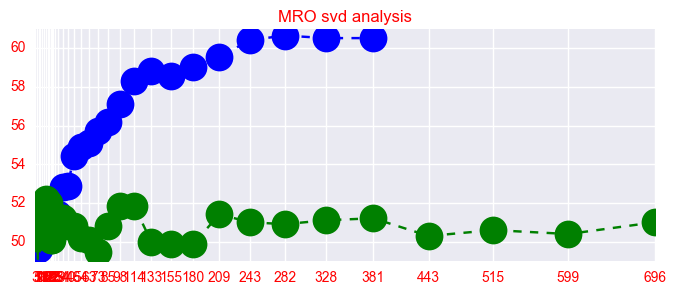

EMN n_components 3 accuracy train 51.03 accuracy test 50.41
EMN n_components 5 accuracy train 51.58 accuracy test 49.86
EMN n_components 7 accuracy train 51.22 accuracy test 50.23
EMN n_components 9 accuracy train 51.05 accuracy test 50.5
EMN n_components 11 accuracy train 51.1 accuracy test 49.77
EMN n_components 13 accuracy train 50.96 accuracy test 48.4
EMN n_components 15 accuracy train 51.22 accuracy test 48.21
EMN n_components 17 accuracy train 52.03 accuracy test 48.58
EMN n_components 19 accuracy train 52.06 accuracy test 48.12
EMN n_components 21 accuracy train 51.96 accuracy test 47.3
EMN n_components 23 accuracy train 51.7 accuracy test 47.85
EMN n_components 18 accuracy train 51.96 accuracy test 48.3
EMN n_components 22 accuracy train 51.6 accuracy test 47.39
EMN n_components 25 accuracy train 52.13 accuracy test 47.94
EMN n_components 29 accuracy train 51.65 accuracy test 49.04
EMN n_components 34 accuracy train 52.3 accuracy test 48.58
EMN n_components 40 accuracy train 5

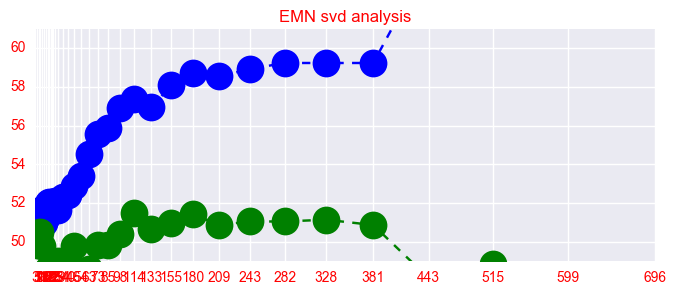

AMT n_components 3 accuracy train 51.68 accuracy test 52.04
AMT n_components 5 accuracy train 51.76 accuracy test 51.96
AMT n_components 7 accuracy train 51.66 accuracy test 52.12
AMT n_components 9 accuracy train 51.63 accuracy test 51.62
AMT n_components 11 accuracy train 51.95 accuracy test 51.12
AMT n_components 13 accuracy train 51.24 accuracy test 50.21
AMT n_components 15 accuracy train 51.46 accuracy test 50.37
AMT n_components 17 accuracy train 51.16 accuracy test 49.54
AMT n_components 19 accuracy train 52.1 accuracy test 50.62
AMT n_components 21 accuracy train 52.45 accuracy test 51.37
AMT n_components 23 accuracy train 51.38 accuracy test 50.79
AMT n_components 18 accuracy train 51.66 accuracy test 49.71
AMT n_components 22 accuracy train 51.41 accuracy test 50.62
AMT n_components 25 accuracy train 51.66 accuracy test 51.12
AMT n_components 29 accuracy train 51.98 accuracy test 50.71
AMT n_components 34 accuracy train 51.88 accuracy test 50.96
AMT n_components 40 accuracy 

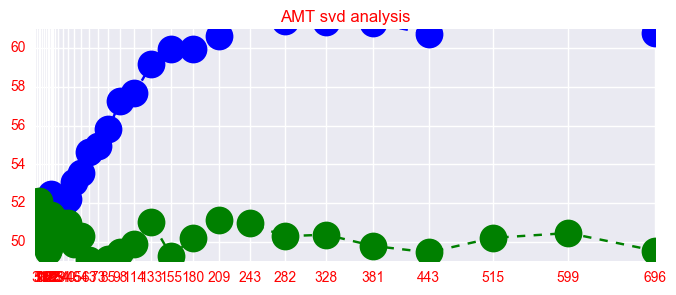

FLR n_components 3 accuracy train 50.97 accuracy test 49.23
FLR n_components 5 accuracy train 51.45 accuracy test 50.61
FLR n_components 7 accuracy train 52.02 accuracy test 49.92
FLR n_components 9 accuracy train 52.0 accuracy test 49.16
FLR n_components 11 accuracy train 51.69 accuracy test 49.54
FLR n_components 13 accuracy train 52.45 accuracy test 50.31
FLR n_components 15 accuracy train 51.9 accuracy test 50.61
FLR n_components 17 accuracy train 51.9 accuracy test 51.07
FLR n_components 19 accuracy train 52.19 accuracy test 50.54
FLR n_components 21 accuracy train 52.04 accuracy test 49.69
FLR n_components 23 accuracy train 52.54 accuracy test 49.31
FLR n_components 18 accuracy train 51.88 accuracy test 49.54
FLR n_components 22 accuracy train 52.5 accuracy test 49.31
FLR n_components 25 accuracy train 52.5 accuracy test 49.16
FLR n_components 29 accuracy train 52.69 accuracy test 50.38
FLR n_components 34 accuracy train 53.33 accuracy test 50.69
FLR n_components 40 accuracy trai

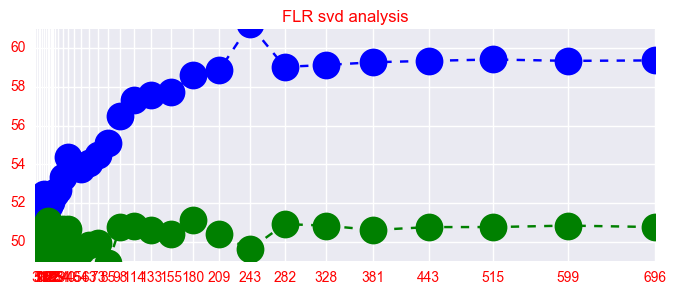

IBM n_components 3 accuracy train 51.2 accuracy test 48.96
IBM n_components 5 accuracy train 51.53 accuracy test 50.72
IBM n_components 7 accuracy train 51.78 accuracy test 50.8
IBM n_components 9 accuracy train 51.76 accuracy test 50.32
IBM n_components 11 accuracy train 52.14 accuracy test 49.84
IBM n_components 13 accuracy train 52.16 accuracy test 47.67
IBM n_components 15 accuracy train 51.91 accuracy test 47.75
IBM n_components 17 accuracy train 52.09 accuracy test 48.8
IBM n_components 19 accuracy train 51.71 accuracy test 48.64
IBM n_components 21 accuracy train 51.98 accuracy test 48.72
IBM n_components 23 accuracy train 52.11 accuracy test 49.52
IBM n_components 18 accuracy train 52.42 accuracy test 48.07
IBM n_components 22 accuracy train 52.69 accuracy test 49.84
IBM n_components 25 accuracy train 53.2 accuracy test 49.52
IBM n_components 29 accuracy train 52.89 accuracy test 48.23
IBM n_components 34 accuracy train 52.94 accuracy test 47.43
IBM n_components 40 accuracy tra

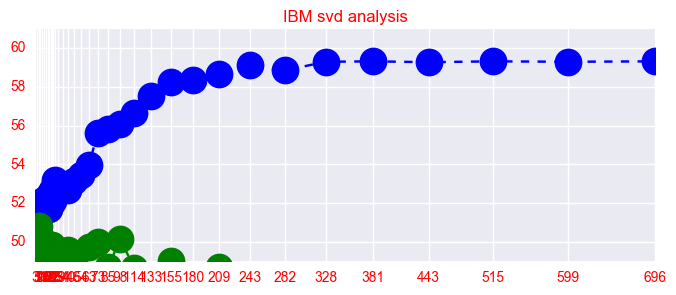

BK n_components 3 accuracy train 50.32 accuracy test 51.17
BK n_components 5 accuracy train 51.14 accuracy test 49.67
BK n_components 7 accuracy train 51.22 accuracy test 49.86
BK n_components 9 accuracy train 51.8 accuracy test 49.48
BK n_components 11 accuracy train 52.02 accuracy test 50.14
BK n_components 13 accuracy train 52.07 accuracy test 50.33
BK n_components 15 accuracy train 52.21 accuracy test 49.39
BK n_components 17 accuracy train 52.04 accuracy test 49.01
BK n_components 19 accuracy train 51.63 accuracy test 49.39
BK n_components 21 accuracy train 52.26 accuracy test 51.55
BK n_components 23 accuracy train 52.89 accuracy test 52.39
BK n_components 18 accuracy train 51.8 accuracy test 48.54
BK n_components 22 accuracy train 52.07 accuracy test 51.92
BK n_components 25 accuracy train 52.76 accuracy test 52.11
BK n_components 29 accuracy train 52.78 accuracy test 49.86
BK n_components 34 accuracy train 52.62 accuracy test 53.15
BK n_components 40 accuracy train 52.04 accura

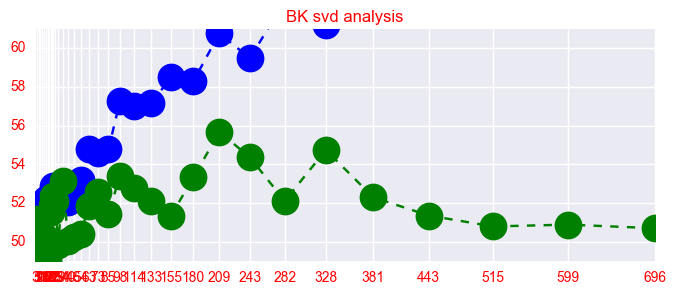

done 80%
NFX n_components 3 accuracy train 51.25 accuracy test 51.97
NFX n_components 5 accuracy train 51.22 accuracy test 51.97
NFX n_components 7 accuracy train 51.1 accuracy test 51.87
NFX n_components 9 accuracy train 51.1 accuracy test 51.58
NFX n_components 11 accuracy train 51.32 accuracy test 51.08
NFX n_components 13 accuracy train 51.13 accuracy test 50.79
NFX n_components 15 accuracy train 52.09 accuracy test 50.69
NFX n_components 17 accuracy train 52.09 accuracy test 51.38
NFX n_components 19 accuracy train 52.81 accuracy test 51.87
NFX n_components 21 accuracy train 52.78 accuracy test 51.97
NFX n_components 23 accuracy train 53.33 accuracy test 51.68
NFX n_components 18 accuracy train 52.21 accuracy test 51.38
NFX n_components 22 accuracy train 52.78 accuracy test 51.68
NFX n_components 25 accuracy train 53.08 accuracy test 51.38
NFX n_components 29 accuracy train 53.95 accuracy test 51.18
NFX n_components 34 accuracy train 54.39 accuracy test 51.38
NFX n_components 40 a

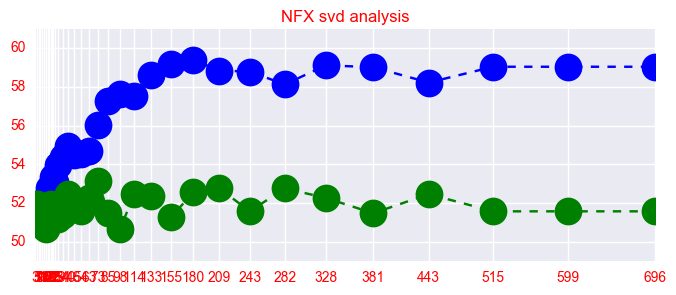

AGN n_components 3 accuracy train 53.15 accuracy test 50.89
AGN n_components 5 accuracy train 53.23 accuracy test 50.53
AGN n_components 7 accuracy train 53.25 accuracy test 50.46
AGN n_components 9 accuracy train 53.28 accuracy test 50.46
AGN n_components 11 accuracy train 53.25 accuracy test 50.75
AGN n_components 13 accuracy train 53.25 accuracy test 50.39
AGN n_components 15 accuracy train 53.13 accuracy test 50.61
AGN n_components 17 accuracy train 52.83 accuracy test 51.03
AGN n_components 19 accuracy train 53.51 accuracy test 51.89
AGN n_components 21 accuracy train 52.93 accuracy test 52.1
AGN n_components 23 accuracy train 52.85 accuracy test 51.18
AGN n_components 18 accuracy train 53.0 accuracy test 50.82
AGN n_components 22 accuracy train 52.7 accuracy test 51.18
AGN n_components 25 accuracy train 52.8 accuracy test 50.61
AGN n_components 29 accuracy train 52.73 accuracy test 50.61
AGN n_components 34 accuracy train 52.88 accuracy test 51.46
AGN n_components 40 accuracy tra

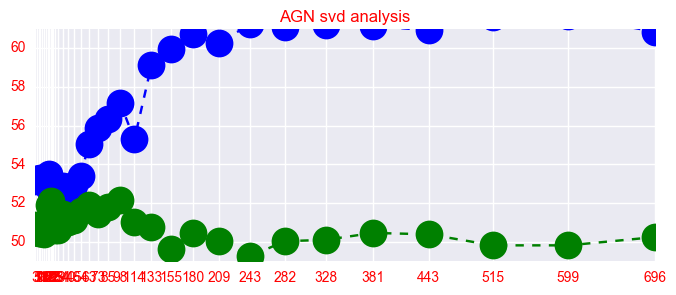

LRCX n_components 3 accuracy train 51.19 accuracy test 49.68
LRCX n_components 5 accuracy train 51.61 accuracy test 50.0
LRCX n_components 7 accuracy train 52.47 accuracy test 50.8
LRCX n_components 9 accuracy train 52.4 accuracy test 50.8
LRCX n_components 11 accuracy train 52.44 accuracy test 50.16
LRCX n_components 13 accuracy train 52.33 accuracy test 50.48
LRCX n_components 15 accuracy train 52.14 accuracy test 50.32
LRCX n_components 17 accuracy train 51.63 accuracy test 51.2
LRCX n_components 19 accuracy train 51.84 accuracy test 51.52
LRCX n_components 21 accuracy train 51.82 accuracy test 51.52
LRCX n_components 23 accuracy train 51.93 accuracy test 51.12
LRCX n_components 18 accuracy train 51.77 accuracy test 51.36
LRCX n_components 22 accuracy train 52.0 accuracy test 50.72
LRCX n_components 25 accuracy train 51.73 accuracy test 51.12
LRCX n_components 29 accuracy train 52.03 accuracy test 51.68
LRCX n_components 34 accuracy train 52.95 accuracy test 51.92
LRCX n_components 

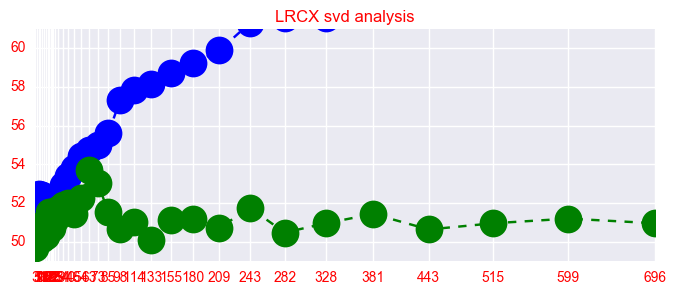

DIS n_components 3 accuracy train 50.85 accuracy test 51.45
DIS n_components 5 accuracy train 51.19 accuracy test 50.75
DIS n_components 7 accuracy train 52.15 accuracy test 51.54
DIS n_components 9 accuracy train 51.78 accuracy test 50.84
DIS n_components 11 accuracy train 51.05 accuracy test 51.1
DIS n_components 13 accuracy train 51.87 accuracy test 50.04
DIS n_components 15 accuracy train 51.85 accuracy test 50.57
DIS n_components 17 accuracy train 51.35 accuracy test 49.87
DIS n_components 19 accuracy train 51.42 accuracy test 50.57
DIS n_components 21 accuracy train 51.62 accuracy test 49.6
DIS n_components 23 accuracy train 52.17 accuracy test 48.9
DIS n_components 18 accuracy train 51.48 accuracy test 49.87
DIS n_components 22 accuracy train 51.83 accuracy test 48.99
DIS n_components 25 accuracy train 52.06 accuracy test 48.55
DIS n_components 29 accuracy train 52.31 accuracy test 50.22
DIS n_components 34 accuracy train 52.9 accuracy test 49.16
DIS n_components 40 accuracy tra

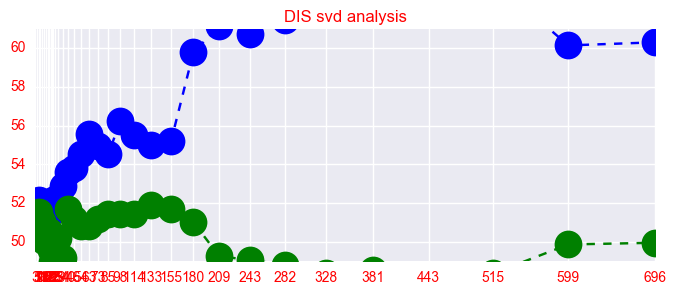

LH n_components 3 accuracy train 50.63 accuracy test 51.76
LH n_components 5 accuracy train 50.99 accuracy test 52.33
LH n_components 7 accuracy train 51.4 accuracy test 52.9
LH n_components 9 accuracy train 51.63 accuracy test 52.58
LH n_components 11 accuracy train 51.83 accuracy test 52.41
LH n_components 13 accuracy train 51.34 accuracy test 52.25
LH n_components 15 accuracy train 51.55 accuracy test 54.37
LH n_components 17 accuracy train 51.65 accuracy test 54.62
LH n_components 19 accuracy train 51.38 accuracy test 53.56
LH n_components 21 accuracy train 51.28 accuracy test 52.25
LH n_components 23 accuracy train 51.59 accuracy test 51.68
LH n_components 18 accuracy train 51.45 accuracy test 54.37
LH n_components 22 accuracy train 51.51 accuracy test 52.41
LH n_components 25 accuracy train 51.67 accuracy test 51.59
LH n_components 29 accuracy train 52.02 accuracy test 52.66
LH n_components 34 accuracy train 51.75 accuracy test 50.04
LH n_components 40 accuracy train 52.16 accura

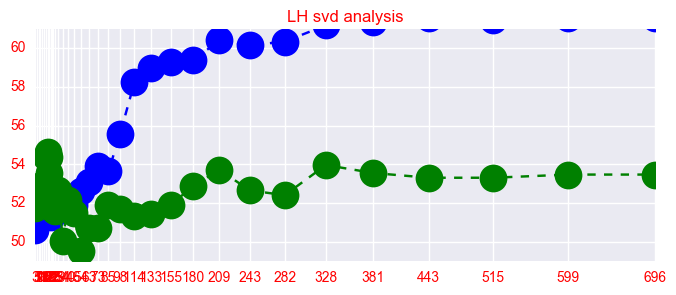

C n_components 3 accuracy train 51.28 accuracy test 53.0
C n_components 5 accuracy train 51.23 accuracy test 52.65
C n_components 7 accuracy train 51.56 accuracy test 52.29
C n_components 9 accuracy train 50.77 accuracy test 53.88
C n_components 11 accuracy train 51.68 accuracy test 51.15
C n_components 13 accuracy train 51.23 accuracy test 51.23
C n_components 15 accuracy train 51.03 accuracy test 52.47
C n_components 17 accuracy train 51.44 accuracy test 50.97
C n_components 19 accuracy train 51.65 accuracy test 51.85
C n_components 21 accuracy train 51.33 accuracy test 53.09
C n_components 23 accuracy train 52.26 accuracy test 52.56
C n_components 18 accuracy train 51.44 accuracy test 51.15
C n_components 22 accuracy train 52.61 accuracy test 53.17
C n_components 25 accuracy train 52.52 accuracy test 51.5
C n_components 29 accuracy train 52.31 accuracy test 54.14
C n_components 34 accuracy train 52.56 accuracy test 53.53
C n_components 40 accuracy train 53.42 accuracy test 53.79
C n

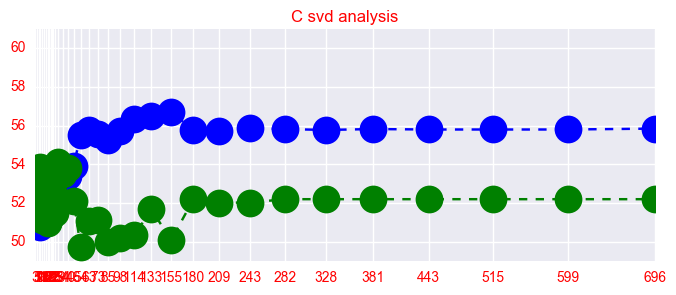

done 100%
MNK n_components 3 accuracy train 50.51 accuracy test 53.68
MNK n_components 5 accuracy train 51.79 accuracy test 51.96
MNK n_components 7 accuracy train 50.92 accuracy test 50.43
MNK n_components 9 accuracy train 50.13 accuracy test 51.49
MNK n_components 11 accuracy train 51.74 accuracy test 49.83
MNK n_components 13 accuracy train 51.5 accuracy test 49.7
MNK n_components 15 accuracy train 52.03 accuracy test 50.83
MNK n_components 17 accuracy train 52.06 accuracy test 51.09
MNK n_components 19 accuracy train 52.17 accuracy test 50.63
MNK n_components 21 accuracy train 52.23 accuracy test 50.7
MNK n_components 23 accuracy train 52.76 accuracy test 50.63
MNK n_components 18 accuracy train 52.09 accuracy test 50.96
MNK n_components 22 accuracy train 52.44 accuracy test 51.49
MNK n_components 25 accuracy train 52.61 accuracy test 51.43
MNK n_components 29 accuracy train 52.99 accuracy test 49.17
MNK n_components 34 accuracy train 52.52 accuracy test 51.23
MNK n_components 40 a

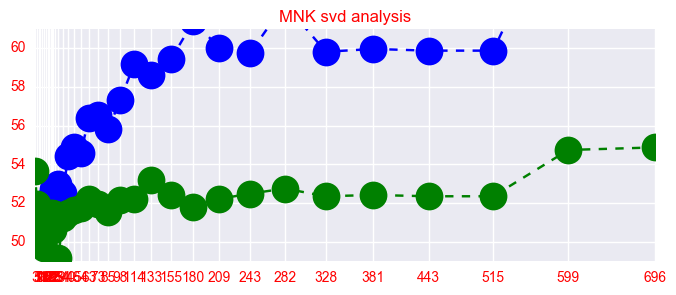

In [55]:
clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_svd4, acc_test_svd4 = clf_portfolio_dic.getModelSVD(clf, features_1p4_extra_second_order, n_components_vec_1p4_extra_second_order)

In [56]:
experiment12 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with SVD - 1.4extra_second_order",
    stocks=stocks, originalFeatures=features_1p4_extra_second_order)

In [57]:
experiment12.setTrainResults(acc_train_svd4)
experiment12.setTestResults(acc_test_svd4)
print("The test accuracy (mean - std) is:")
print(experiment12.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
[ 48.117656    48.54850072  48.39380598  48.23943321  48.60129601
  48.58704678  48.36702364  48.58793924  48.82692678  48.6869968
  48.82065365  48.53807207  48.63182022  48.6587679   48.77036701
  48.65709733  48.96540866  49.28655393  49.0257895   49.04843025
  48.90467189  49.24640799  49.4163578   49.53428648  49.42428073
  49.47152434  49.6603046   49.38861647  49.36221539  49.2682858
  49.26488418  49.40411742  49.08535521  49.08023044  49.09944294
  49.15701986]


#### Save to Pickle

In [58]:
with open("pickles/acc_with_svd.p",'wb') as f:
    pickle.dump( [experiment9, experiment10, experiment11, experiment12], f, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
import pickle
try:
    with open("pickles/acc_with_svd.p",'rb') as f:
        experiment9, experiment10, experiment11, experiment12 = pickle.load(f)
except EOFError:
    print("")
try:
    with open("pickles/acc_with_pca.p",'rb') as f:
        experiment5, experiment6, experiment7, experiment8 = pickle.load(f)
except EOFError:
    print("")
try:
    with open("pickles/acc_without_pca.p",'rb') as f:
        experiment1, experiment2, experiment3, experiment4 = pickle.load(f)
except EOFError:
    print("")

In [12]:
print("   mean \t**   mean-std")
print("======== without filter ========")
print(experiment1.getTestAccuracy(),"\t** ",experiment1.getTestAccuracyMinusSigma())
print(experiment2.getTestAccuracy(),"\t** ",experiment2.getTestAccuracyMinusSigma())
print(experiment3.getTestAccuracy(),"\t** ",experiment3.getTestAccuracyMinusSigma())
print(experiment4.getTestAccuracy(),"\t** ",experiment4.getTestAccuracyMinusSigma())

print("=========== with PCA ===========")
print(experiment5.getTestAccuracy(max=True),"\t** ",experiment5.getTestAccuracyMinusSigma(max=True))
print(experiment6.getTestAccuracy(max=True),"\t** ",experiment6.getTestAccuracyMinusSigma(max=True))
print(experiment7.getTestAccuracy(max=True),"\t** ",experiment7.getTestAccuracyMinusSigma(max=True))
print(experiment8.getTestAccuracy(max=True),"\t** ",experiment8.getTestAccuracyMinusSigma(max=True))

print("=========== with SVD ===========")
print(experiment9.getTestAccuracy(max=True),"\t** ",experiment9.getTestAccuracyMinusSigma(max=True))
print(experiment10.getTestAccuracy(max=True),"\t** ",experiment10.getTestAccuracyMinusSigma(max=True))
print(experiment11.getTestAccuracy(max=True),"\t** ",experiment11.getTestAccuracyMinusSigma(max=True))
print(experiment12.getTestAccuracy(max=True),"\t** ",experiment12.getTestAccuracyMinusSigma(max=True))


   mean 	**   mean-std
======== without filter ========
51.9486374551 	**  49.7480893744
51.9486374551 	**  49.7480893744
51.7176323861 	**  49.8987252822
50.9361038116 	**  49.0866498843
=========== with PCA ===========
53.0516027966 	**  51.1807470076
53.0516027966 	**  51.1807470076
53.1098755881 	**  51.6694362323
52.723259907 	**  51.2981206182
=========== with SVD ===========
52.9917186486 	**  51.0773956333
52.9917186486 	**  51.0773956333
53.1047204198 	**  51.6677227475
52.7764900964 	**  51.267525441


## Conclusions so far:
* 1.2_extra is the same that with *second_order* with thresold 0.80 for the correlation
* 1.4_extra is always the best performer
* PCA does *slightly* better than SVD
* **WARNING**: The results for PCA and SVD select the best number of component for each stock (possible overfitting)

# Using MLP instead of Logistic Regression?

Use TensorFlow.
Difficult to limit overfitting (early stopping?)

In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
import keras.callbacks


Using TensorFlow backend.


In [7]:
clf_portfolio_dic = methodsMLinterns.ClassificationPortfolio(stocks=stocks, minutes_forward=30)
clf_portfolio_dic.loadData()
clf_portfolio_dic.cleanUpData(features_1p4_extra)
clf_portfolio_dic.getTrainTestSetDate(date_test_set)

In [8]:
log_name = datetime.datetime.today().strftime('%Y-%m-%d_%H:%M')
tbCallBack = keras.callbacks.TensorBoard(log_dir='/Users/clement/cqc/log/%s'%log_name
                                         , histogram_freq=0, write_graph=True, write_images=True)

In [10]:
X_train,y_train,X_test,y_test=np.array([], dtype=np.float64).reshape(0,239),np.array([], dtype=np.float64).reshape(0,1),np.array([], dtype=np.float64).reshape(0,239),np.array([], dtype=np.float64).reshape(0,1)

for k, stock in enumerate(clf_portfolio_dic.stocks):
    name = stock + str(clf_portfolio_dic.minutes_forward)
    if k==0:
        X_train, y_train = clf_portfolio_dic.X_train_dic[name][features_1p4_extra].as_matrix(),clf_portfolio_dic.y_train_dic[name]
        X_test, y_test = clf_portfolio_dic.X_test_dic[name][features_1p4_extra].as_matrix(), clf_portfolio_dic.y_test_dic[name]
        # convert to binary classes
        y_train = (y_train+1)/2
    else:
        X_train = np.concatenate((X_train,clf_portfolio_dic.X_train_dic[name][features_1p4_extra].as_matrix()),axis=0)
        y_train = np.concatenate((y_train,(clf_portfolio_dic.y_train_dic[name]+1)/2),axis=0)
        X_test = np.concatenate((X_test,clf_portfolio_dic.X_test_dic[name][features_1p4_extra].as_matrix()),axis=0)
        y_test = np.concatenate((y_test,(clf_portfolio_dic.y_test_dic[name]+1)/2),axis=0)
   
print(X_train.shape)
# create model
input_features = Input(shape=(239,))
output = Dense(64, init='normal', activation='relu')(input_features)
output = Dropout(0.5)(output)
#output = Dense(64, init='normal', activation='relu')(output)
#output = Dropout(0.5)(output)
output = Dense(1, init='normal', activation='sigmoid')(output)
model = Model(input=input_features, output=output)

#adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
adam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
# Compile model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
model.fit(X_train, y_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, y_test),
                callbacks=[tbCallBack])

(122607, 239)
Train on 122607 samples, validate on 37386 samples
Epoch 1/100
122607/122607 [==============================] - 3s - loss: 0.6891 - acc: 0.5375 - val_loss: 0.6931 - val_acc: 0.5165
Epoch 2/100
122607/122607 [==============================] - 3s - loss: 0.6867 - acc: 0.5435 - val_loss: 0.6921 - val_acc: 0.5121
Epoch 3/100
122607/122607 [==============================] - 3s - loss: 0.6858 - acc: 0.5444 - val_loss: 0.6915 - val_acc: 0.5126
Epoch 4/100
122607/122607 [==============================] - 3s - loss: 0.6852 - acc: 0.5478 - val_loss: 0.6959 - val_acc: 0.5156
Epoch 5/100
122607/122607 [==============================] - 4s - loss: 0.6847 - acc: 0.5479 - val_loss: 0.6950 - val_acc: 0.5154
Epoch 6/100
122607/122607 [==============================] - 3s - loss: 0.6839 - acc: 0.5501 - val_loss: 0.6926 - val_acc: 0.5095
Epoch 7/100
122607/122607 [==============================] - 3s - loss: 0.6839 - acc: 0.5510 - val_loss: 0.6954 - val_acc: 0.5126
Epoch 8/100
122607/122607

## Autoencoder

In [13]:
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model, Sequential
import keras.callbacks
import datetime

In [14]:
log_name = datetime.datetime.today().strftime('%Y-%m-%d_%H:%M')
tbCallBack = keras.callbacks.TensorBoard(log_dir='/Users/clement/cqc/log/%s'%log_name
                                      , histogram_freq=0, write_graph=True, write_images=True)


In [15]:
def buildAutoencoder():
    # size of encoded representations
    encoding_dim = 32

    input_img = Input(shape=(239,))
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dropout(0.1)(decoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dropout(0.1)(decoded)
    decoded = Dense(239, activation='relu')(decoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input=input_img, output=decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input=input_img, output=encoded)

    # placeholder for encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    #decoder_layer = autoencoder.layers[-3]
    #decoder_layer1 = autoencoder.layers[-2]
    #decoder_layer2 = autoencoder.layers[-1]

    # create the decoder model
    #decoder = Model(input=encoded_input, output=decoder_layer2(decoder_layer1(decoder_layer(encoded_input))))


    ## Now let's train our autoencoder to reconstruct MNIST digits.
    ## First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
    autoencoder.compile(optimizer='adadelta', loss='cosine_proximity')
    
    return encoder,autoencoder

In [16]:
acc_train_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
for k, stock in enumerate(clf_portfolio_dic.stocks):
    name = "%s30"%stock
    print(k,name)
    
    encoder,autoencoder = buildAutoencoder()
    
    x_train = np.array(clf_portfolio_dic.X_train_dic[name][features_1p4_extra])
    x_test = np.array(clf_portfolio_dic.X_test_dic[name][features_1p4_extra])
    y_train = clf_portfolio_dic.y_train_dic[name]
    y_test = clf_portfolio_dic.y_test_dic[name]
    autoencoder.fit(x_train, x_train,
               nb_epoch=200,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test),
               verbose=0)
    encoded_features_train = encoder.predict(x_train)
    encoded_features_test = encoder.predict(x_test)
    
    clf = LogisticRegressionCV(Cs=Cs, penalty='l2', cv=cv, random_state=random_state, refit=True)
    clf.fit(encoded_features_train, y_train)
    y_pred_train = clf.predict(encoded_features_train)
    y_pred_test = clf.predict(encoded_features_test)
    acc_train = 100 * (y_pred_train == y_train).mean()
    acc_test = 100 * (y_pred_test == y_test).mean()
    print(acc_train,acc_test)
    acc_train_autoencoder[k] = acc_train
    acc_test_autoencoder[k] = acc_test

0 DNB30
52.8947810035 53.4028812717
1 NRG30
55.0727987058 52.4829600779
2 CL30
54.7794117647 50.6329113924
3 ANTM30
53.4258456201 48.1452249408
4 NEE30
55.4777927322 49.9049429658
5 PAYX30
50.5003490808 51.3731825525
6 VAR30
54.9989295654 49.5702005731
7 NI30
54.0729635182 48.9754098361
8 MNST30
52.2731632457 49.0022172949
9 JNJ30
53.7369705034 51.1700468019
10 TGNA30
54.296875 48.1161695447
11 NOV30
53.5480492275 50.0
12 FIS30
53.4325185972 50.4005826657
13 BLK30
54.7991831178 51.1568123393
14 HBI30
54.4954516607 53.6231884058
15 NVDA30
52.7849406911 53.3190578158
16 DLTR30
54.8899237934 46.6776045939
17 MRO30
53.7973008732 50.3048780488
18 EMN30
52.6555023923 50.4124656279
19 AMT30
52.8189910979 51.0407993339
20 FLR30
51.997146933 51.0719754977
21 IBM30
54.8487544484 51.4446227929
22 BK30
54.3209876543 48.2629107981
23 NFX30
53.6977491961 51.5779092702
24 AGN30
55.2148781101 51.3898788311
25 LRCX30
53.5325457494 48.6378205128
26 DIS30
51.3933302878 51.4537444934
27 LH30
55.2040617067

In [17]:
experiment13 = methodsMLinterns.ExperimentPerformance(
    methodName="Logistic Regression with Autoencoder (first try - 6 layers) - 1.4extra",
    stocks=stocks, originalFeatures=features_1p4_extra)

In [18]:
experiment13.setTrainResults(acc_train_autoencoder)
experiment13.setTestResults(acc_test_autoencoder)
print("The test accuracy (mean - std) is:")
print(experiment13.getTestAccuracyMinusSigma())

The test accuracy (mean - std) is:
48.8035611463


In [19]:
with open("acc_autoencoder_32.p",'wb') as f:
    pickle.dump( experiment13, f, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
print("   mean \t**   mean-std")
print("======== without filter ========")
print(experiment1.getTestAccuracy(),"\t** ",experiment1.getTestAccuracyMinusSigma())
print(experiment2.getTestAccuracy(),"\t** ",experiment2.getTestAccuracyMinusSigma())
print(experiment3.getTestAccuracy(),"\t** ",experiment3.getTestAccuracyMinusSigma())
print(experiment4.getTestAccuracy(),"\t** ",experiment4.getTestAccuracyMinusSigma())

print("=========== with PCA ===========")
print(experiment5.getTestAccuracy(max=True),"\t** ",experiment5.getTestAccuracyMinusSigma(max=True))
print(experiment6.getTestAccuracy(max=True),"\t** ",experiment6.getTestAccuracyMinusSigma(max=True))
print(experiment7.getTestAccuracy(max=True),"\t** ",experiment7.getTestAccuracyMinusSigma(max=True))
print(experiment8.getTestAccuracy(max=True),"\t** ",experiment8.getTestAccuracyMinusSigma(max=True))

print("=========== with SVD ===========")
print(experiment9.getTestAccuracy(max=True),"\t** ",experiment9.getTestAccuracyMinusSigma(max=True))
print(experiment10.getTestAccuracy(max=True),"\t** ",experiment10.getTestAccuracyMinusSigma(max=True))
print(experiment11.getTestAccuracy(max=True),"\t** ",experiment11.getTestAccuracyMinusSigma(max=True))
print(experiment12.getTestAccuracy(max=True),"\t** ",experiment12.getTestAccuracyMinusSigma(max=True))

print("===== with Autoencoder 32 ======")
print(experiment13.getTestAccuracy(),"\t** ",experiment13.getTestAccuracyMinusSigma())




   mean 	**   mean-std
======== without filter ========
51.9486374551 	**  49.7480893744
51.9486374551 	**  49.7480893744
51.7176323861 	**  49.8987252822
50.9361038116 	**  49.0866498843
=========== with PCA ===========
53.0516027966 	**  51.1807470076
53.0516027966 	**  51.1807470076
53.1098755881 	**  51.6694362323
52.723259907 	**  51.2981206182
=========== with SVD ===========
52.9917186486 	**  51.0773956333
52.9917186486 	**  51.0773956333
53.1047204198 	**  51.6677227475
52.7764900964 	**  51.267525441
===== with Autoencoder 32 ======
50.5560683138 	**  48.8035611463
